<a href="https://colab.research.google.com/github/MBrandao07/People_Analytics/blob/main/Projeto_People_Analytics_RH_Modelo_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Entendimento dos dados

**Temos as seguintes bases disponíveis e seus respectivos conceitos:**

* tb_funcionarios.csv – Base de público contendo informações dos funcionários;

* tb_pesquisa_funcionarios.csv – Base contendo informações de uma pesquisa realizada com os funcionários;

* tb_pesquisa_gestores.csv – Base contendo informações de uma pesquisa realizada com os gestores acerca do desempenho dos funcionários. <br><br>

**Temos também o dicionário de dados explicando cada coluna:** <br><br>

| Variáveis                       | Descrição                                                                 | Domínios                                                      |
|--------------------------------|---------------------------------------------------------------------------|---------------------------------------------------------------|
| Idade                          | Idade do funcionário                                                      |                                                               |
| Rotatividade                   | Se o funcionário deixou a empresa no ano anterior ou não                  | 0 = Permaneceu, 1 = Saiu                                      |
| ViagensDeNegocio               | Frequência de viagens a trabalho no último ano                            |                                                               |
| Departamento                   | Departamento na empresa                                                   |                                                               |
| DistanciaDeCasa                | Distância de casa até o trabalho (em km)                                  |                                                               |
| Educacao                       | Nível de Educação                                                         | 1 = Abaixo do Superior, 2 = Sup. Incompleto, 3 = Bacharel, 4 = Mestre, 5 = Doutor |
| CampoDeEducacao                | Área de formação acadêmica                                                |                                                               |
| ContagemDeEmpregados           | Número total de funcionários (constante)                                  |                                                               |
| IDDoEmpregado                  | Número/ID único do funcionário                                            |                                                               |
| SatisfacaoComAmbiente          | Satisfação com o ambiente de trabalho                                     | 1 = Baixo, 2 = Médio, 3 = Alto, 4 = Muito Alto                |
| Genero                         | Gênero do funcionário                                                     |                                                               |
| EnvolvimentoNoTrabalho         | Nível de envolvimento no trabalho                                         | 1 = Baixo, 2 = Médio, 3 = Alto, 4 = Muito Alto                |
| NivelDoCargo                   | Nível do cargo ocupado na empresa                                         | 1 a 5                                                         |
| NomeDaFuncao                   | Nome da função desempenhada                                               |                                                               |
| SatisfacaoNoTrabalho           | Nível de satisfação no trabalho                                           | 1 = Baixo, 2 = Médio, 3 = Alto, 4 = Muito Alto                |
| EstadoCivil                    | Estado civil do funcionário                                               |                                                               |
| RendaMensal                    | Renda mensal (em rúpias)                                                  |                                                               |
| NumeroDeEmpresas               | Número total de empresas pelas quais o funcionário passou                 |                                                               |
| MaiorDe18                      | Indica se o funcionário é maior de 18 anos                                | 1 = Sim                                                       |
| AumentoPercentualSalario       | Percentual de aumento salarial no último ano                              |                                                               |
| AvaliacaoDeDesempenho          | Avaliação de desempenho no último ano                                     | 1 = Baixo, 2 = Bom, 3 = Excelente, 4 = Excepcional            |
| HorasPadrao                    | Carga horária padrão                                                      | Geralmente constante                                          |
| NivelDeOpcaoDeCompraDeAcoes    | Nível de opções de compra de ações recebidas                              |                                                               |
| TotalDeAnosTrabalhados         | Total de anos trabalhados ao longo da carreira                            |                                                               |
| TreinamentosNoUltimoAno        | Número de treinamentos realizados no último ano                           |                                                               |
| EquilibrioTrabalhoVida         | Nível de equilíbrio entre trabalho e vida pessoal                         | 1 = Ruim, 2 = Bom, 3 = Melhor, 4 = Ótimo                      |
| AnosNaEmpresa                  | Número total de anos na empresa atual                                     |                                                               |
| AnosDesdeUltimaPromocao        | Anos desde a última promoção                                              |                                                               |
| AnosComAtualGestor             | Anos trabalhando com o gestor atual                                       |                                                               |


In [57]:
# Instalando Bibliotecas
!pip install category_encoders
!pip install catboost

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
import datetime

from sklearn.metrics import roc_auc_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, ShuffleSplit
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, \
HistGradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, make_scorer, accuracy_score, precision_score, recall_score, auc
import pickle
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import VarianceThreshold
import random
import gc
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Definindo a semente
random.seed(123)

In [59]:
# conectando ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Funções

In [60]:
def generate_metadata(dataframe, variavel):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by= variavel, ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata


def calculate_metrics(nm_modelo, model, X_train, y_train, X_test, y_test):
    # Fazendo predições
    y_train_prob = (model.predict_proba(X_train))[:,1]
    y_test_prob = (model.predict_proba(X_test))[:,1]

    y_train_pred = (model.predict(X_train))
    y_test_pred = (model.predict(X_test))

    # Calculando as métricas para o conjunto de treino
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    auc_roc_train = roc_auc_score(y_train, np.array(y_train_prob))

    # Calculando o Índice Gini e Estatística KS para o conjunto de treino
    probabilities_train = np.array(y_train_prob)
    df_train = pd.DataFrame({'true_labels': y_train, 'predicted_probs': probabilities_train})
    df_train = df_train.sort_values(by='predicted_probs', ascending=False)
    df_train['cumulative_true'] = df_train['true_labels'].cumsum() / df_train['true_labels'].sum()
    df_train['cumulative_false'] = (1 - df_train['true_labels']).cumsum() / (1 - df_train['true_labels']).sum()
    ks_statistic_train = max(abs(df_train['cumulative_true'] - df_train['cumulative_false']))
    gini_index_train = 2 * auc_roc_train - 1

    # Calculando as métricas para o conjunto de teste
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    auc_roc_test = roc_auc_score(y_test, np.array(y_test_prob))

    # Calculando o Índice Gini e Estatística KS para o conjunto de teste
    probabilities_test = np.array(y_test_prob)
    df_test = pd.DataFrame({'true_labels': y_test, 'predicted_probs': probabilities_test})
    df_test = df_test.sort_values(by='predicted_probs', ascending=False)
    df_test['cumulative_true'] = df_test['true_labels'].cumsum() / df_test['true_labels'].sum()
    df_test['cumulative_false'] = (1 - df_test['true_labels']).cumsum() / (1 - df_test['true_labels']).sum()
    ks_statistic_test = max(abs(df_test['cumulative_true'] - df_test['cumulative_false']))
    gini_index_test = 2 * auc_roc_test - 1

    # Criando o DataFrame com as métricas calculadas
    metrics_df = pd.DataFrame({
        'Algoritmo': [nm_modelo, nm_modelo],
        'Conjunto': ['Treino', 'Teste'],
        'Acuracia': [accuracy_train, accuracy_test],
        'Precisao': [precision_train, precision_test],
        'Recall': [recall_train, recall_test],
        'AUC_ROC': [auc_roc_train, auc_roc_test],
        'GINI': [gini_index_train, gini_index_test],
        'KS': [ks_statistic_train, ks_statistic_test]
    })
    return metrics_df


# função de linearidade com log odds
def plot_variable_vs_logodds(df, variables, target):
    for variable in variables:
        # Verificando o número de valores únicos
        unique_vals = df[variable].nunique()
        if unique_vals == 1:
            print(f"{variable} tem apenas um valor único. Ignorando...")
            continue

        n_bins = min(10, unique_vals)

        # Criando bins para a variável
        df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')

        # Calculando a proporção de eventos positivos para cada bin
        mean_target = df.groupby('bin')[target].mean()

        # Calculando o log(odds) e tratando valores infinitos
        log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

        # Calculando R^2
        X = df.groupby('bin')[variable].mean()[log_odds.index].values.reshape(-1, 1)
        y = log_odds.values
        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        # Plotando
        plt.figure(figsize=(8, 6))
        plt.plot(X, y, marker='o')
        plt.xlabel(variable)
        plt.ylabel('Log(Odds)')
        plt.title(f'{variable} vs Log(Odds) of {target}\nR^2 = {r2:.2f}')
        plt.grid(True)
        plt.show()

        # Removendo a coluna bin
        df.drop('bin', axis=1, inplace=True)


# função de verificar transformação do log odds
def calculate_r2_for_logodds(df, variables, target, threshold):
    results = []

    for variable in variables:
        # Verificando o número de valores únicos
        unique_vals = df[variable].nunique()
        if unique_vals == 1:
            print(f"{variable} tem apenas um valor único. Ignorando...")
            continue

        n_bins = min(10, unique_vals)

        # Criando bins para a variável
        df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')

        # Calculando a proporção de eventos positivos para cada bin
        mean_target = df.groupby('bin')[target].mean()

        # Calculando o log(odds) e tratando valores infinitos
        log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

        # Calculando R^2
        X = df.groupby('bin')[variable].mean()[log_odds.index].values.reshape(-1, 1)
        y = log_odds.values
        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        # Decidindo sobre a engenharia de recursos com base no valor de R^2 e no threshold fornecido
        feat_eng = "Usar como contínua" if r2 > threshold else "Categorizar"

        results.append({
            'Variable': variable,
            'R^2': r2,
            'Feat Eng': feat_eng
        })

        # Removendo a coluna bin
        df.drop('bin', axis=1, inplace=True)

    return pd.DataFrame(results)


# função de calcular o R2 nas transformações
def calculate_r2_for_logodds_and_transformations(df, variables, target, threshold):
    results = []

    transformations = {
        'AbsLog': lambda x: np.log(np.abs(x) + 1),  # Adicionamos 1 para evitar log(0)
        'Quadratic': lambda x: x**2
    }

    for variable in variables:
        best_transform_r2 = -np.inf
        best_transform_name = 'None'
        best_transform_function = None

        for transform_name, transform_function in transformations.items():
            transformed_var = transform_function(df[variable])

            # Verificando o número de valores únicos
            unique_vals = transformed_var.nunique()
            if unique_vals == 1:
                continue

            n_bins = min(10, unique_vals)

            # Criando bins para a variável transformada
            df['bin'] = pd.cut(transformed_var, bins=n_bins, labels=False, duplicates='drop')

            # Calculando a proporção de eventos positivos para cada bin
            mean_target = df.groupby('bin')[target].mean()

            # Calculando o log(odds) e tratando valores infinitos
            log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

            # Calculando R^2
            X = df.groupby('bin')[transformed_var.name].mean()[log_odds.index].values.reshape(-1, 1)
            y = log_odds.values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)

            # Se essa transformação for a melhor até agora, atualize as melhores variáveis
            if r2 > best_transform_r2:
                best_transform_r2 = r2
                best_transform_name = transform_name
                best_transform_function = transform_function

            # Removendo a coluna bin
            df.drop('bin', axis=1, inplace=True)

        feat_eng = "Usar como contínua" if best_transform_r2 > threshold else "Categorizar"

        results.append({
            'Variable': variable,
            'Best Transformation': best_transform_name,
            'R^2 of Transformation': best_transform_r2,
            'Feat Eng': feat_eng,
            'Transformation Equation': f'{best_transform_name}({variable})'
        })

    return pd.DataFrame(results)


# função para aplicar as melhores transformações
def apply_best_transformations(results_df, original_df, drop_original=False):
    transformed_df = original_df.copy()

    transformations = {
        'LogAbs': lambda x: np.log(np.abs(x) + 1),
        'Quadratic': lambda x: x**2
    }

    variables_transformed = []

    for index, row in results_df.iterrows():
        variable = row['Variable']
        best_transform_name = row['Best Transformation']
        feat_eng = row['Feat Eng']

        if feat_eng == 'Usar como contínua' and best_transform_name in transformations:
            transform_function = transformations[best_transform_name]
            transformed_var = transform_function(original_df[variable])
            transformed_df[f'TFE_{variable}'] = transformed_var
            variables_transformed.append(variable)

    # Descarta as variáveis originais se drop_original for True
    if drop_original:
        transformed_df.drop(variables_transformed, axis=1, inplace=True)

    return transformed_df


def analyze_variable(dataframe, variable, target):

    # Se a variável for numérica, arredonda para 4 casas decimais
    if pd.api.types.is_numeric_dtype(dataframe[variable]):
        dataframe[variable] = dataframe[variable].round(4)
        dataframe[variable] = dataframe[variable].astype(str)

    # Calcula a taxa de evento e o volume para cada categoria da variável
    result = dataframe.groupby(variable).agg({target: 'mean', variable: 'count'}).rename(columns={variable: 'Volume'}).reset_index()
    result.columns = [variable, 'Taxa_de_Evento', 'Volume']

    # Ordena o resultado pela Taxa de Evento em ordem decrescente
    result = result.sort_values(by='Taxa_de_Evento', ascending=False)

    # Plota o gráfico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eixo Y esquerdo: Volume
    bars = ax1.bar(result[variable], result['Volume'], color='lightblue', label='Volume (Barras)')
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Volume', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Eixo Y direito: Taxa de Evento
    ax2 = ax1.twinx()
    lines = ax2.plot(result[variable], result['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color='hotpink', label='Taxa de Evento (Linha)')
    ax2.set_ylabel('Taxa de Evento (%)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Combina as legendas de ambos os eixos, filtrando rótulos que começam com '_'
    plots = [item for item in bars + tuple(lines) if not item.get_label().startswith('_')]
    labels = [plot.get_label() for plot in plots]
    plt.legend(plots, labels, loc='upper left')

    plt.title(f'Volume e Taxa de Evento por {variable}')
    plt.xticks(rotation=45)  # Adicionado para melhor visualização dos labels no eixo X
    plt.tight_layout()
    plt.show()

    return result



def categorize_with_decision_tree(dataframe, n_categories, target, numeric_var):
    import numpy as np
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier

    # Preparar os dados
    X = dataframe[[numeric_var]]
    y = dataframe[target]

    # Verificar se n_categories é 1 para tratar o caso especial
    if n_categories == 1:
        return pd.DataFrame({
            'Leaf': [1],
            'Taxa_de_Evento': [y.mean()],
            'Volume': [len(y)],
            'Lower_Bound': [-np.inf],
            'Upper_Bound': [np.inf]
        })

    # Treinar uma árvore de decisão com profundidade máxima igual ao número de categorias desejadas
    tree = DecisionTreeClassifier(max_leaf_nodes=n_categories)
    tree.fit(X, y)

    # Predizer a categoria (folha) para cada entrada no DataFrame
    leaf_ids = tree.apply(X)

    # Criar um DataFrame temporário com as categorias (folhas), a variável numérica e o target
    temp_df = pd.DataFrame({numeric_var: dataframe[numeric_var], 'Leaf': leaf_ids, target: y})

    result = temp_df.groupby('Leaf').agg({target: 'mean', numeric_var: ['count', 'min', 'max']}).reset_index()
    result.columns = ['Leaf', 'Taxa_de_Evento', 'Volume', 'Lower_Bound', 'Upper_Bound']

    # Ajuste para garantir que os limites superior e inferior de bins adjacentes não se sobreponham
    result = result.sort_values(by='Lower_Bound')
    for i in range(1, len(result)):
        result.iloc[i, 3] = max(result.iloc[i, 3], result.iloc[i-1, 4])

    # Definir o limite inferior do primeiro bin como -inf e o limite superior do último bin como inf
    result.iloc[0, 3] = -np.inf
    result.iloc[-1, 4] = np.inf

    return result

def apply_tree_bins(data, transformation_df, numeric_var):
    import numpy as np
    import pandas as pd

    df_copy = data.copy()

    # Verificar se há apenas uma categoria
    if len(transformation_df) == 1:
        # Atribuir a mesma categoria para todas as observações
        df_copy[f"TFT_{numeric_var}"] = 1
    else:
        transformation_df.Upper_Bound = transformation_df.Upper_Bound.astype('float')
        transformation_df.Lower_Bound = transformation_df.Lower_Bound.astype('float')

        # Obter os limites superiores e ordene-os
        upper_bounds = transformation_df['Upper_Bound'].sort_values().values

        # Use numpy.digitize para determinar a qual bin cada valor pertence
        df_copy[f"TFT_{numeric_var}"] = np.digitize(df_copy[numeric_var].astype(float), upper_bounds)

    df_copy.drop(axis=1, columns=[numeric_var], inplace=True)

    return df_copy


def logistic_regression_with_scorecard(data, target_var, features):

    data = data[features+[target_var]].copy()

    # Adicionando uma constante ao dataset (intercepto)
    data = sm.add_constant(data)

    # Ajustando o modelo de regressão logística
    model = sm.Logit(data[target_var], data[features + ['const']]).fit()
    # model = sm.Logit(data[target_var], data[features]).fit()

    # Coletando p-valores e estatísticas de Wald
    summary = model.summary2().tables[1]
    summary['Wald'] = summary['z']**2
    scorecard = summary[['Coef.', 'P>|z|', 'Wald']]
    scorecard.columns = ['Beta Coefficient', 'P-Value', 'Wald Statistic']
    scorecard = scorecard.sort_values(by='Wald Statistic', ascending=False)

    return model, scorecard


def calculate_metrics(train_df, test_df, score_column, target_column,bins=10):
    def compute_metrics(df, score_column, target_column):
        df_sorted = df.sort_values(by=score_column, ascending=False)

        # Calcular KS
        df_sorted['cum_good'] = (1 - df_sorted[target_column]).cumsum() / (1 - df_sorted[target_column]).sum()
        df_sorted['cum_bad'] = df_sorted[target_column].cumsum() / df_sorted[target_column].sum()
        df_sorted['ks'] = np.abs(df_sorted['cum_good'] - df_sorted['cum_bad'])
        ks_statistic = df_sorted['ks'].max()

        # Calcular AUC
        auc_value = roc_auc_score(df_sorted[target_column], df_sorted[score_column])

        # Calcular Gini
        gini = 2 * auc_value - 1

        # Dividir o score em 10 faixas
        df_sorted['decile'] = pd.qcut(df_sorted[score_column], bins, labels=False)

        # Criar tabela detalhada
        table = df_sorted.groupby('decile').agg(
            min_score=pd.NamedAgg(column=score_column, aggfunc='min'),
            max_score=pd.NamedAgg(column=score_column, aggfunc='max'),
            event_rate=pd.NamedAgg(column=target_column, aggfunc='mean'),
            volume=pd.NamedAgg(column=target_column, aggfunc='size')
        ).reset_index()

        return ks_statistic, auc_value, gini, table

    ks_train, auc_train, gini_train, table_train = compute_metrics(train_df, score_column, target_column)
    ks_test, auc_test, gini_test, table_test = compute_metrics(test_df, score_column, target_column)

    # Plotando o gráfico de barras para Event Rate por Decil
    barWidth = 0.3
    r1 = np.arange(len(table_train))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, table_train['event_rate'], color='lightblue', width=barWidth, label='Train')
    plt.bar(r2, table_test['event_rate'], color='royalblue', width=barWidth, label='Test')

    plt.xlabel('Decile')
    plt.ylabel('Event Rate')
    plt.title('Event Rate by Decile')
    plt.xticks([r + barWidth for r in range(len(table_train))], table_train['decile'])
    plt.legend()
    plt.show()

    # Criando DataFrame para as métricas
    metrics_df = pd.DataFrame({
        'Metric': ['KS', 'AUC', 'Gini'],
        'Train Value': [ks_train, auc_train, gini_train],
        'Test Value': [ks_test, auc_test, gini_test]
    })

    return metrics_df, table_train, table_test

### Importando as bases de dados

In [61]:
df_funcionarios = pd.read_csv("/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_funcionarios.csv")
df_pesquisa_funcionarios = pd.read_csv("/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_pesquisa_funcionarios.csv")
df_pesquisa_gestores = pd.read_csv("/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_pesquisa_gestores.csv")

### Juntando as bases

In [62]:
df_aux1 = pd.merge(df_funcionarios, df_pesquisa_funcionarios, on='IDDoEmpregado', how='left')
df_publico = pd.merge(df_aux1, df_pesquisa_gestores, on='IDDoEmpregado', how='left')
df_publico.head()

Idade Rotatividade    ViagensDeNegocio                Departamento  \
0     51          Nao       Viagens_Raras                      Vendas   
1     31          Sim  Viagens_Frequentes  Pesquisa_e_Desenvolvimento   
2     32          Nao  Viagens_Frequentes  Pesquisa_e_Desenvolvimento   
3     38          Nao           Nao_Viaja  Pesquisa_e_Desenvolvimento   
4     32          Nao       Viagens_Raras  Pesquisa_e_Desenvolvimento   

   DistanciaDeCasa  Educacao   CampoDeEducacao  ContagemDeEmpregados  \
0                6         2  Ciências da Vida                     1   
1               10         1  Ciências da Vida                     1   
2               17         4             Outro                     1   
3                2         5  Ciências da Vida                     1   
4               10         1            Médica                     1   

   IDDoEmpregado     Genero  ...  TotalDeAnosTrabalhados  \
0              1   Feminino  ...                     1.0   
1              2   Feminino  ...                     6.0   
2              3  Masculino  ...                     5.0   
3              4  Masculino  ...                    13.0   
4              5  Masculino  ...                     9.0   

  TreinamentosNoUltimoAno AnosNaEmpresa  AnosDesdeUltimaPromocao  \
0                       6             1                        0   
1                       3             5                        1   
2                       2             5                        0   
3                       5             8                        7   
4                       2             6                        0   

   AnosComAtualGestor SatisfacaoComAmbiente  SatisfacaoNoTrabalho  \
0                   0                   3.0                   4.0   
1                   4                   3.0                   2.0   
2                   3                   2.0                   2.0   
3                   5                   4.0                   4.0   
4                   4                   4.0                   1.0   

   EquilibrioTrabalhoVida  EnvolvimentoNoTrabalho  AvaliacaoDeDesempenho  
0                     2.0                       3                      3  
1                     4.0                       2                      4  
2                     1.0                       3                      3  
3                     3.0                       2                      3  
4                     3.0                       3                      3  

[5 rows x 29 columns]

In [63]:
df_publico['TARGET'] = (df_publico['Rotatividade'] == 'Sim').astype(int)
df_publico.head()

Idade Rotatividade    ViagensDeNegocio                Departamento  \
0     51          Nao       Viagens_Raras                      Vendas   
1     31          Sim  Viagens_Frequentes  Pesquisa_e_Desenvolvimento   
2     32          Nao  Viagens_Frequentes  Pesquisa_e_Desenvolvimento   
3     38          Nao           Nao_Viaja  Pesquisa_e_Desenvolvimento   
4     32          Nao       Viagens_Raras  Pesquisa_e_Desenvolvimento   

   DistanciaDeCasa  Educacao   CampoDeEducacao  ContagemDeEmpregados  \
0                6         2  Ciências da Vida                     1   
1               10         1  Ciências da Vida                     1   
2               17         4             Outro                     1   
3                2         5  Ciências da Vida                     1   
4               10         1            Médica                     1   

   IDDoEmpregado     Genero  ...  TreinamentosNoUltimoAno AnosNaEmpresa  \
0              1   Feminino  ...                        6             1   
1              2   Feminino  ...                        3             5   
2              3  Masculino  ...                        2             5   
3              4  Masculino  ...                        5             8   
4              5  Masculino  ...                        2             6   

  AnosDesdeUltimaPromocao  AnosComAtualGestor  SatisfacaoComAmbiente  \
0                       0                   0                    3.0   
1                       1                   4                    3.0   
2                       0                   3                    2.0   
3                       7                   5                    4.0   
4                       0                   4                    4.0   

  SatisfacaoNoTrabalho  EquilibrioTrabalhoVida  EnvolvimentoNoTrabalho  \
0                  4.0                     2.0                       3   
1                  2.0                     4.0                       2   
2                  2.0                     1.0                       3   
3                  4.0                     3.0                       2   
4                  1.0                     3.0                       3   

   AvaliacaoDeDesempenho  TARGET  
0                      3       0  
1                      4       1  
2                      3       0  
3                      3       0  
4                      3       0  

[5 rows x 30 columns]

## Analisando as variáveis em relação a taxa de rotatividade

In [64]:
df_metadata = generate_metadata(df_publico, 'tipo')
df_metadata

nome_variavel     tipo  qt_nulos  percent_nulos  \
0                     MaiorDe18   object         0           0.00   
1                        Funcao   object         0           0.00   
2              ViagensDeNegocio   object         0           0.00   
3                  Departamento   object         0           0.00   
4                  Rotatividade   object         0           0.00   
5               CampoDeEducacao   object         0           0.00   
6                   EstadoCivil   object         0           0.00   
7                        Genero   object         0           0.00   
8              NumeroDeEmpresas  float64        19           0.43   
9                   RendaMensal  float64         0           0.00   
10        SatisfacaoComAmbiente  float64        25           0.57   
11         SatisfacaoNoTrabalho  float64        20           0.45   
12       EquilibrioTrabalhoVida  float64        38           0.86   
13       TotalDeAnosTrabalhados  float64         9           0.20   
14      TreinamentosNoUltimoAno    int64         0           0.00   
15       EnvolvimentoNoTrabalho    int64         0           0.00   
16        AvaliacaoDeDesempenho    int64         0           0.00   
17           AnosComAtualGestor    int64         0           0.00   
18      AnosDesdeUltimaPromocao    int64         0           0.00   
19                AnosNaEmpresa    int64         0           0.00   
20                        Idade    int64         0           0.00   
21  NivelDeOpcaoDeCompraDeAcoes    int64         0           0.00   
22                  HorasPadrao    int64         0           0.00   
23     AumentoPercentualSalario    int64         0           0.00   
24                 NivelDoCargo    int64         0           0.00   
25                IDDoEmpregado    int64         0           0.00   
26         ContagemDeEmpregados    int64         0           0.00   
27                     Educacao    int64         0           0.00   
28              DistanciaDeCasa    int64         0           0.00   
29                       TARGET    int64         0           0.00   

    cardinalidade  
0               1  
1               9  
2               3  
3               3  
4               2  
5               6  
6               3  
7               2  
8              10  
9            1349  
10              4  
11              4  
12              4  
13             40  
14              7  
15              4  
16              2  
17             18  
18             16  
19             37  
20             43  
21              4  
22              1  
23             15  
24              5  
25           4410  
26              1  
27              5  
28             29  
29              2

In [65]:
X = df_publico.drop(columns='IDDoEmpregado')

cat_attributes = X.select_dtypes(include='object')
num_attributes = X.select_dtypes(exclude='object')

vars1 = list(cat_attributes.columns).copy()
vars1.remove('MaiorDe18')
vars1.remove('Rotatividade')

vars2 = ['SatisfacaoComAmbiente','SatisfacaoNoTrabalho','EquilibrioTrabalhoVida','EnvolvimentoNoTrabalho','AvaliacaoDeDesempenho','Educacao']

vars_categoricas = vars1 + vars2

vars_numericas = list(set(df_publico.columns) - set(vars_categoricas) - set(['ContagemDeEmpregados','Rotatividade','MaiorDe18','TARGET','Cluster','IDDoEmpregado','HorasPadrao']))

### Variáveis Categóricas

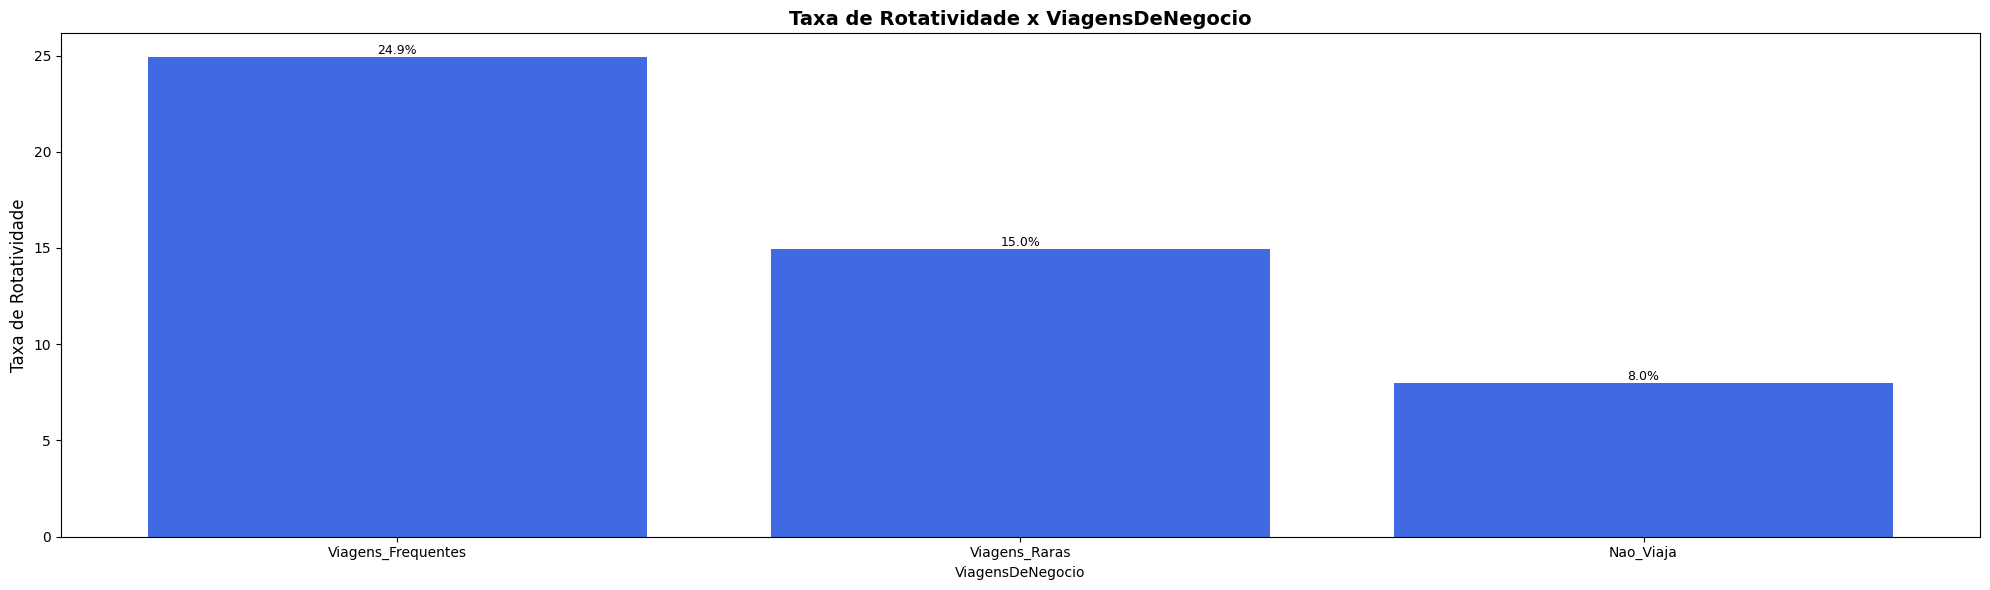

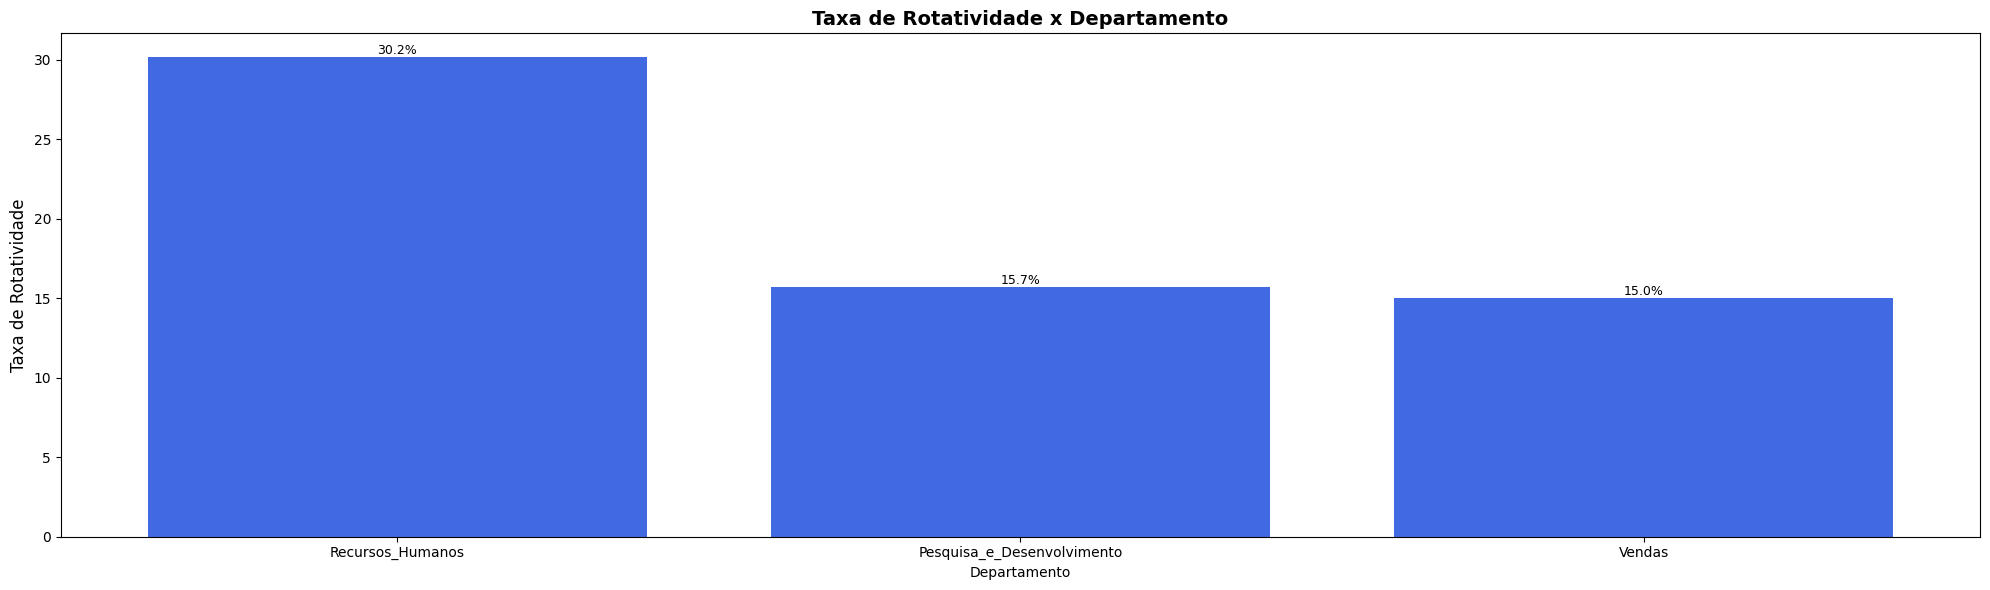

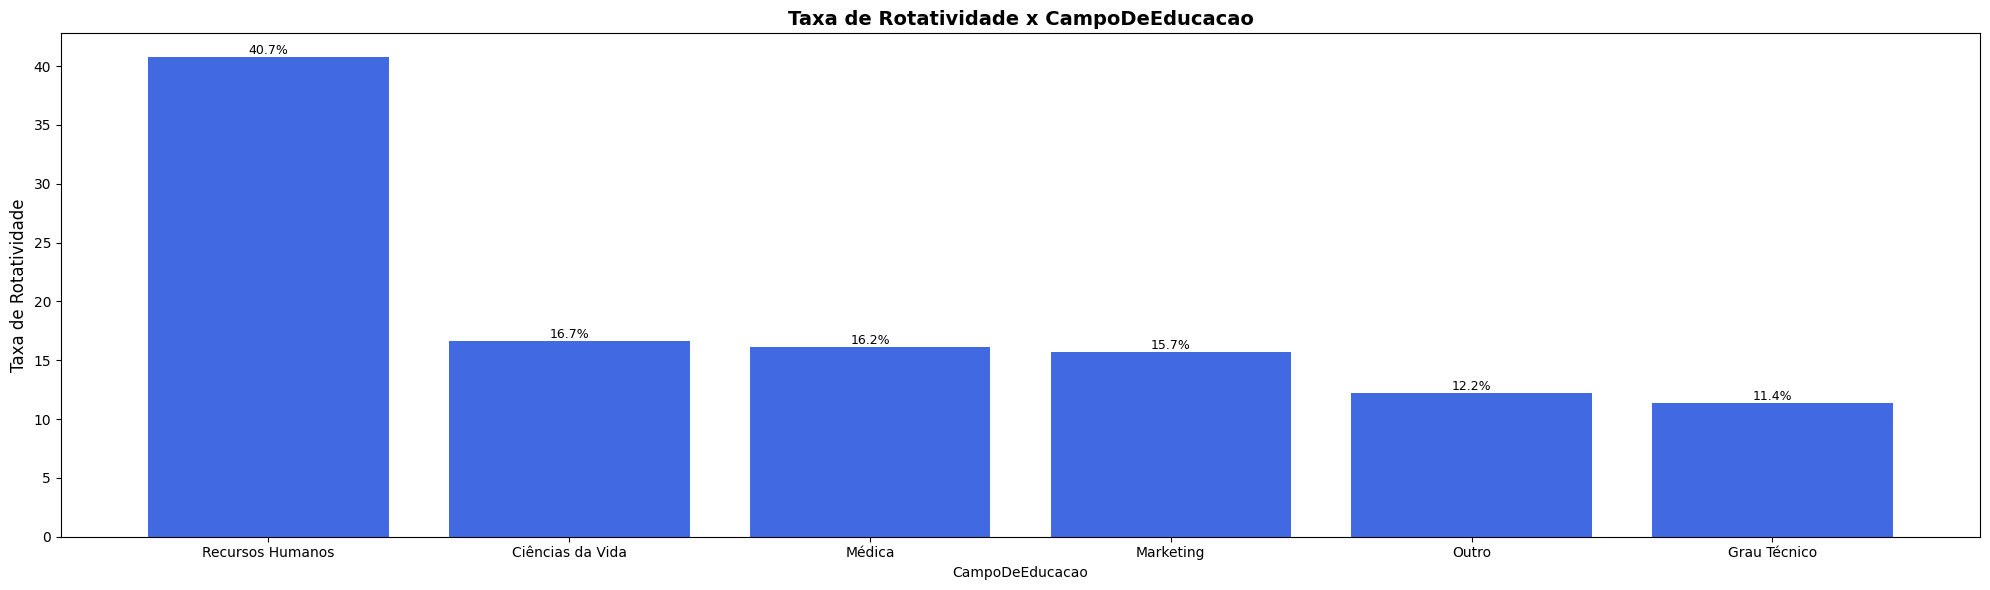

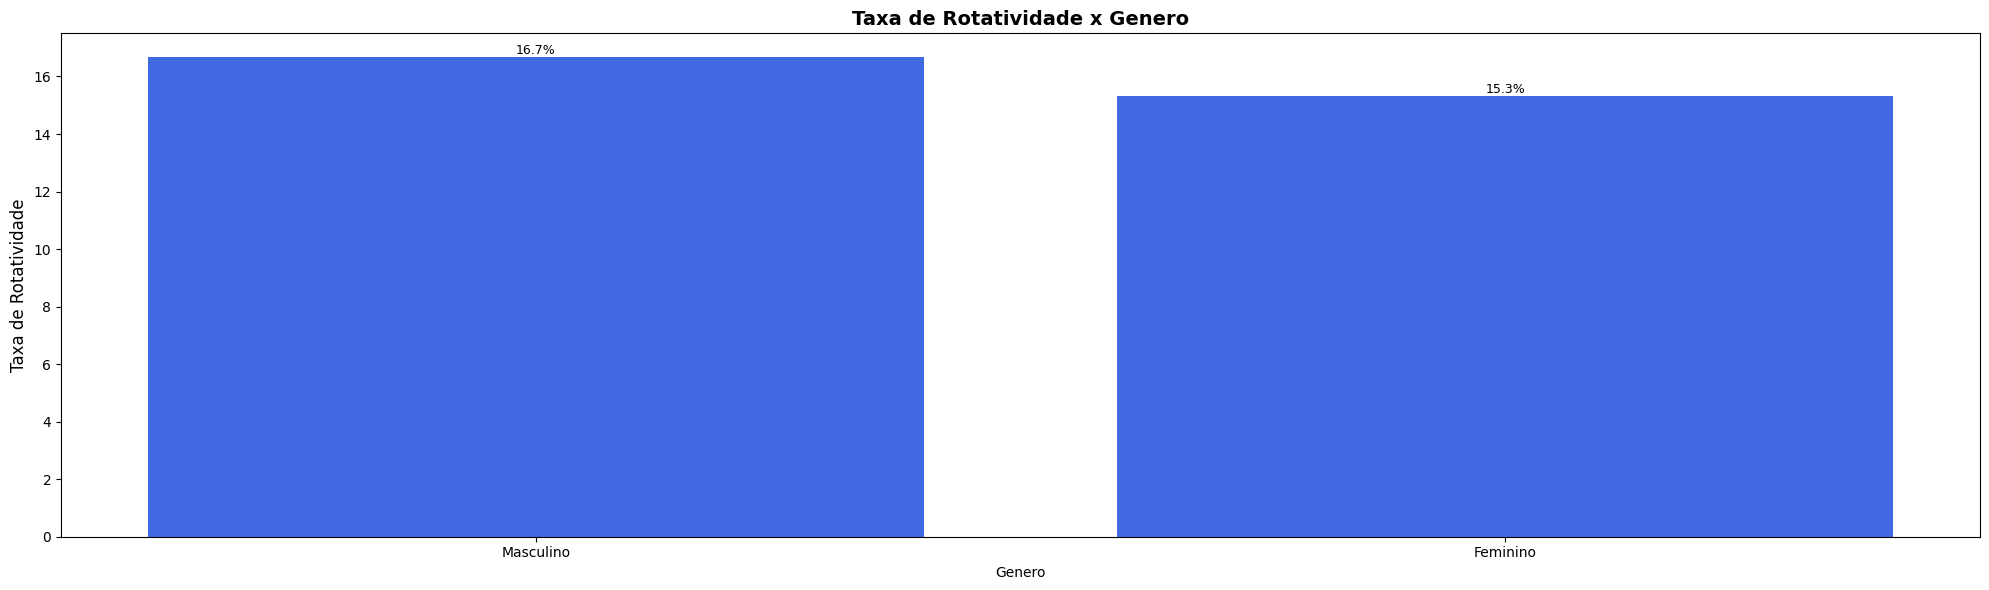

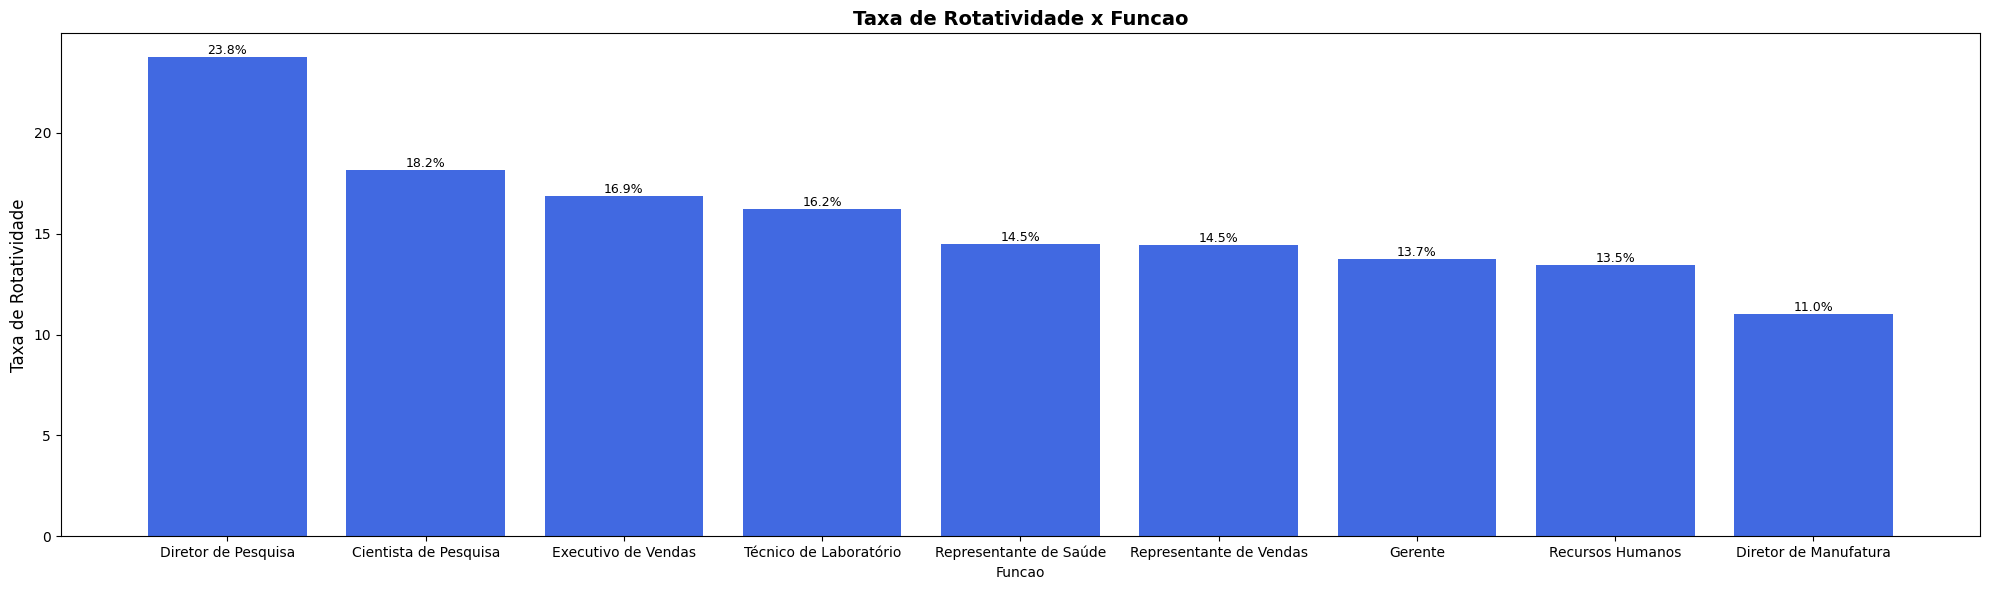

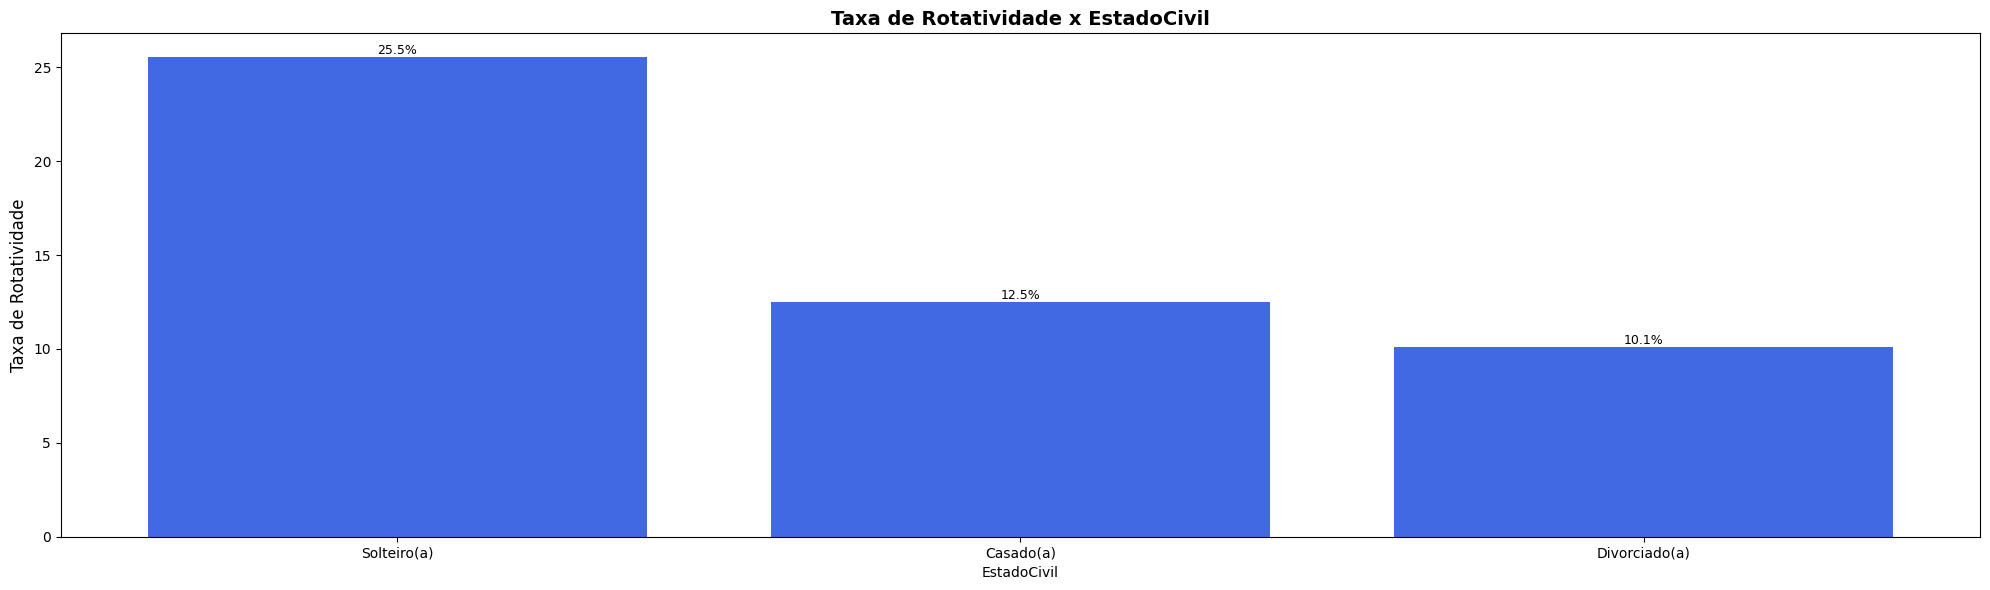

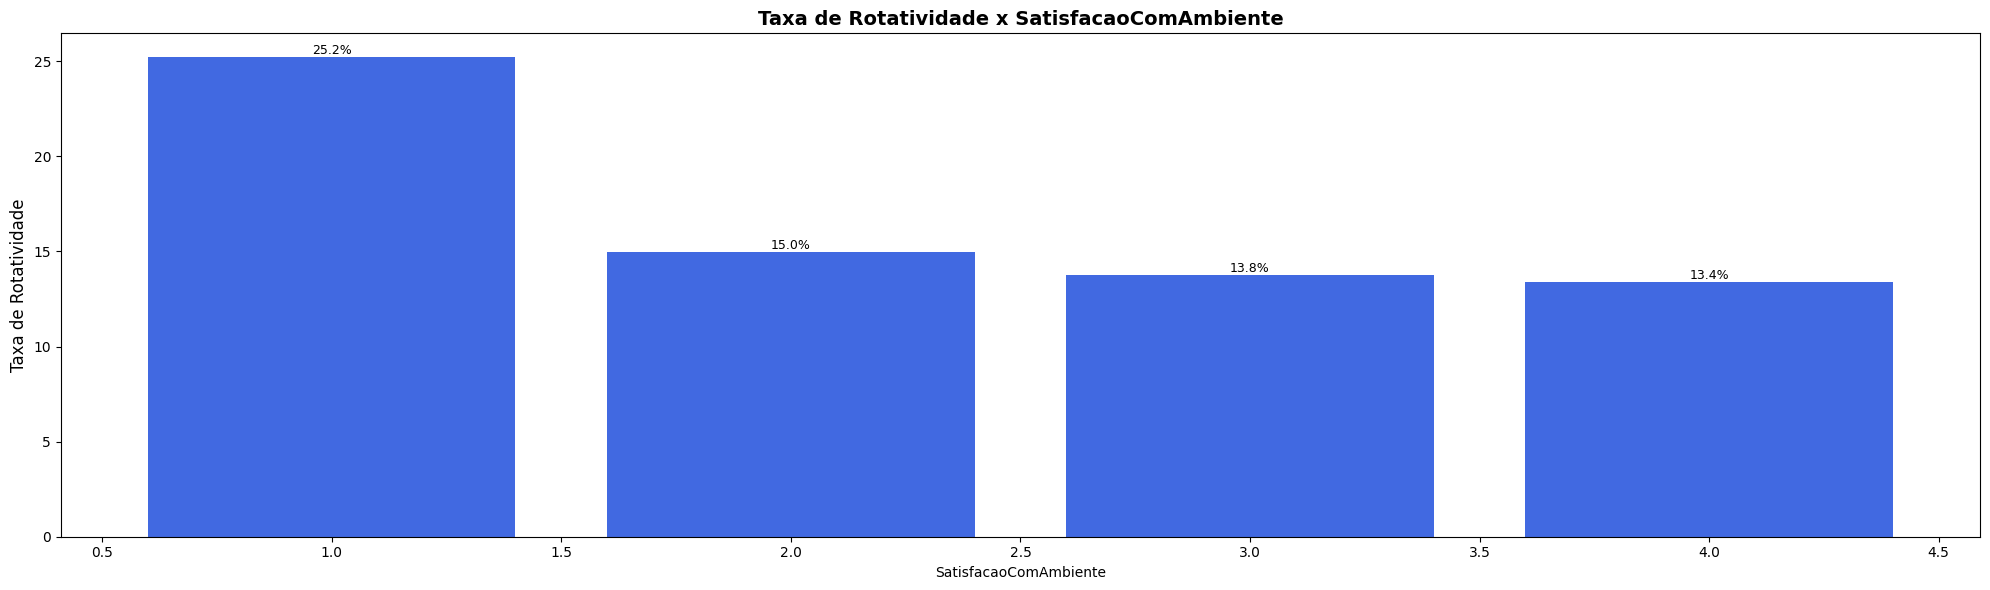

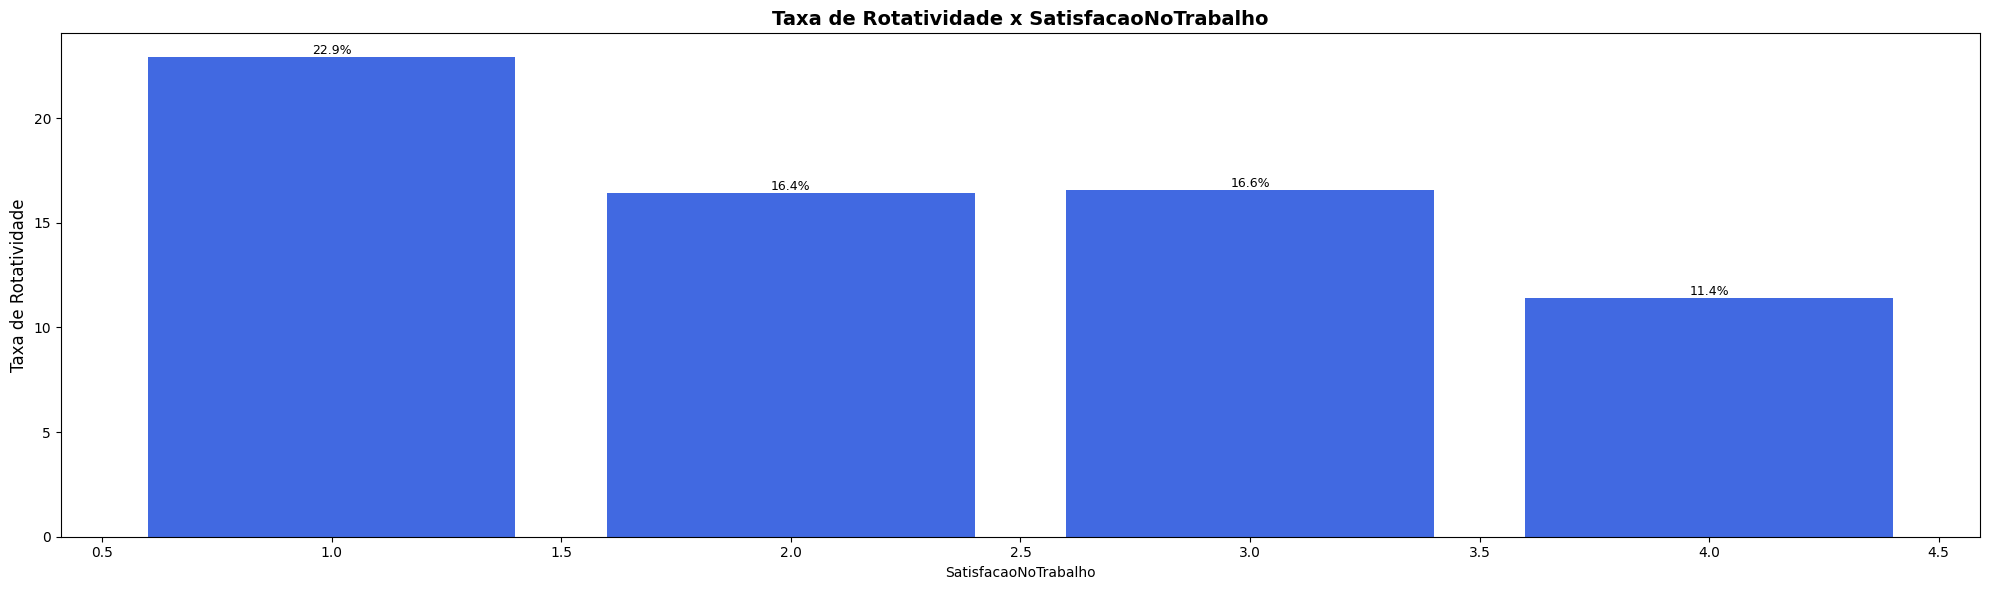

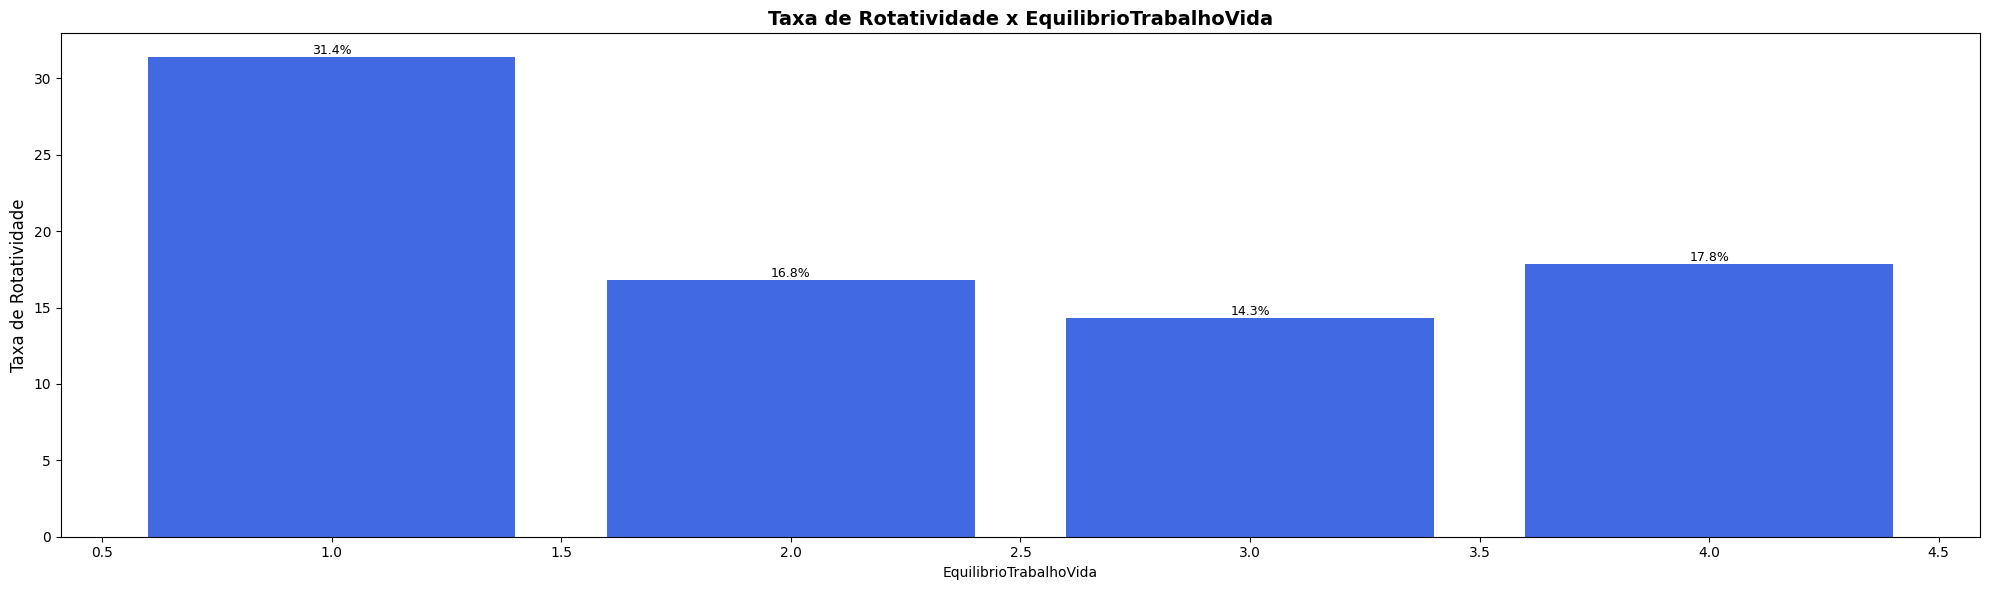

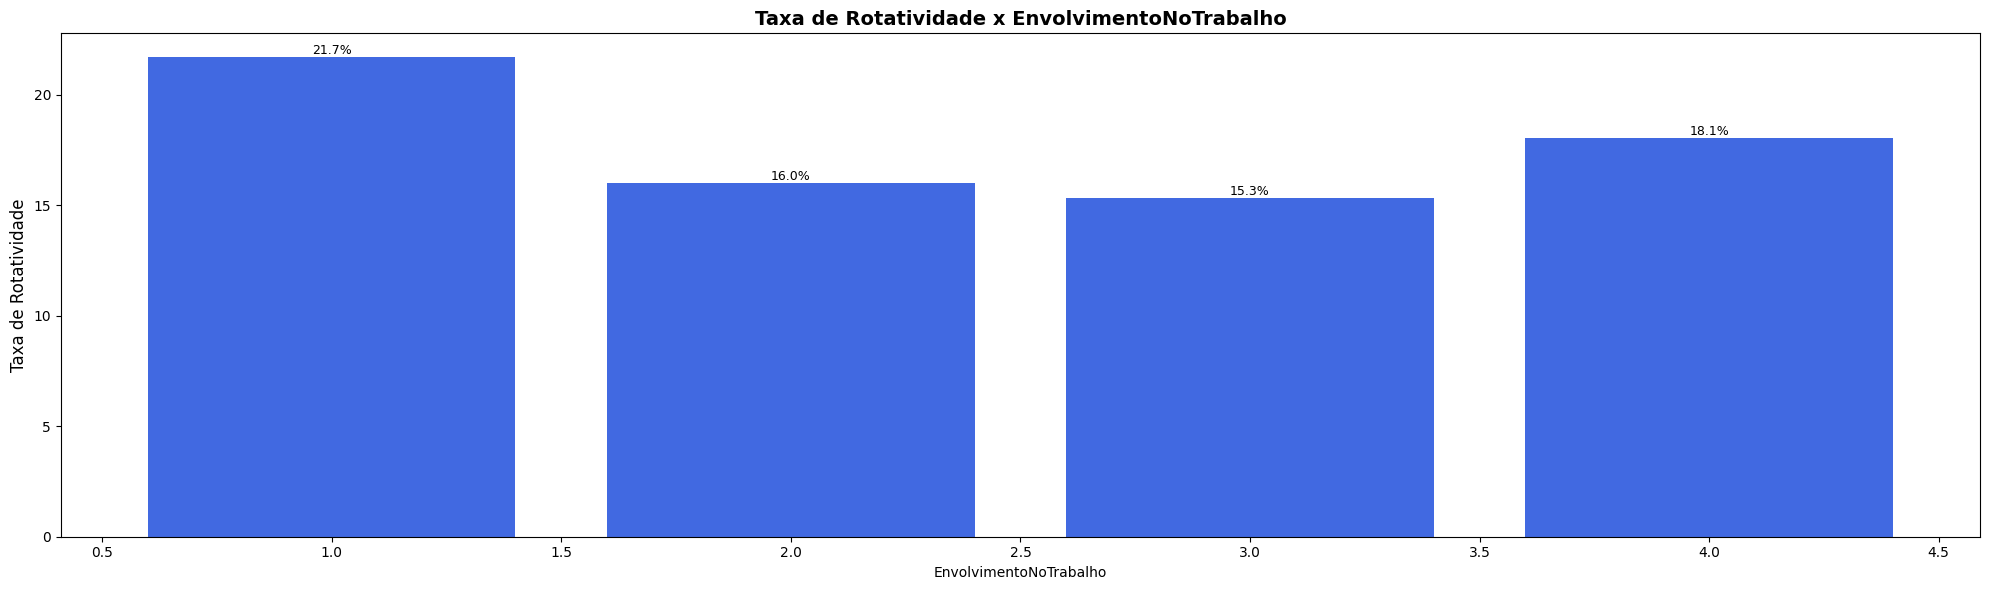

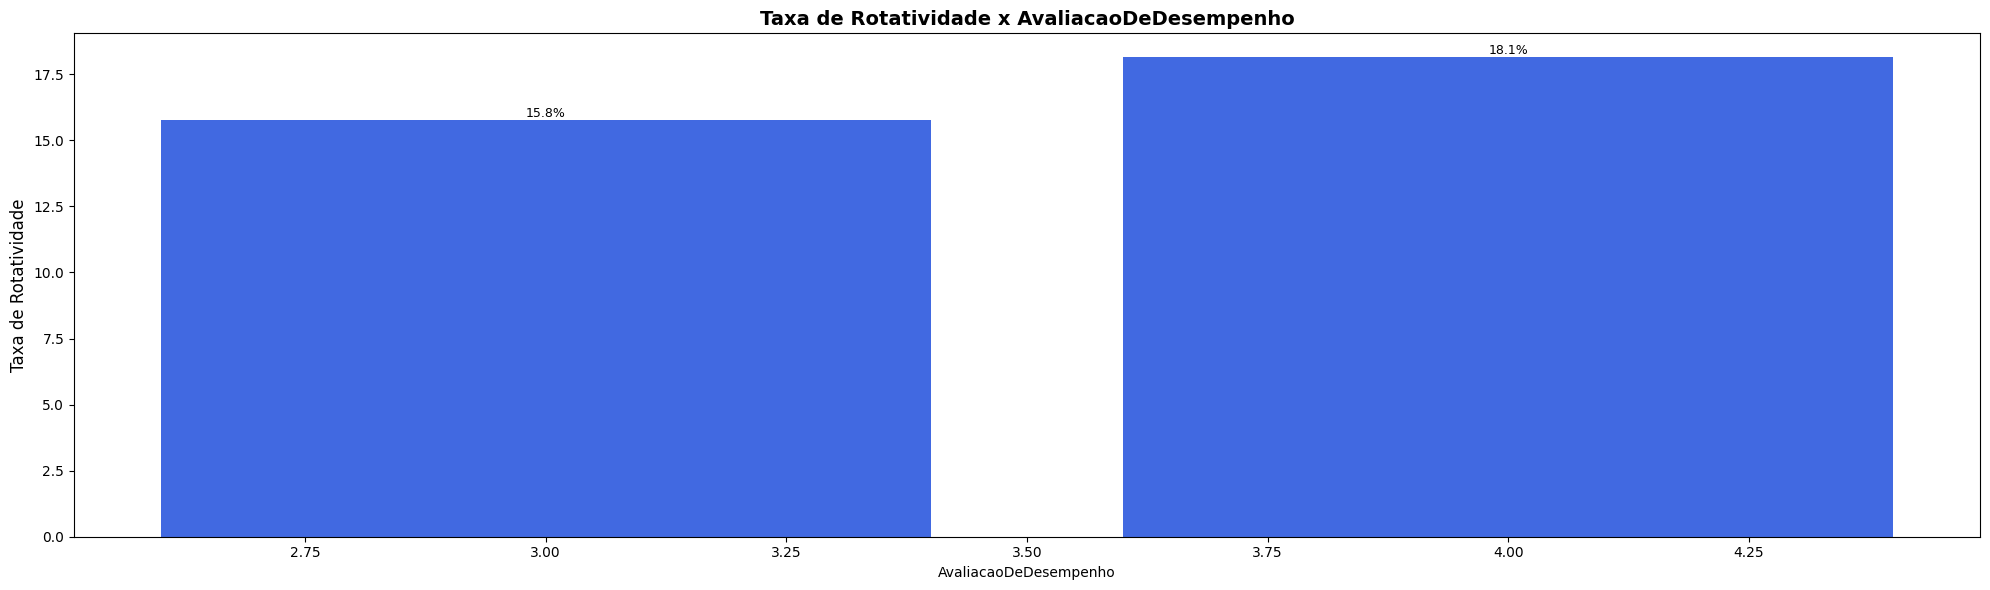

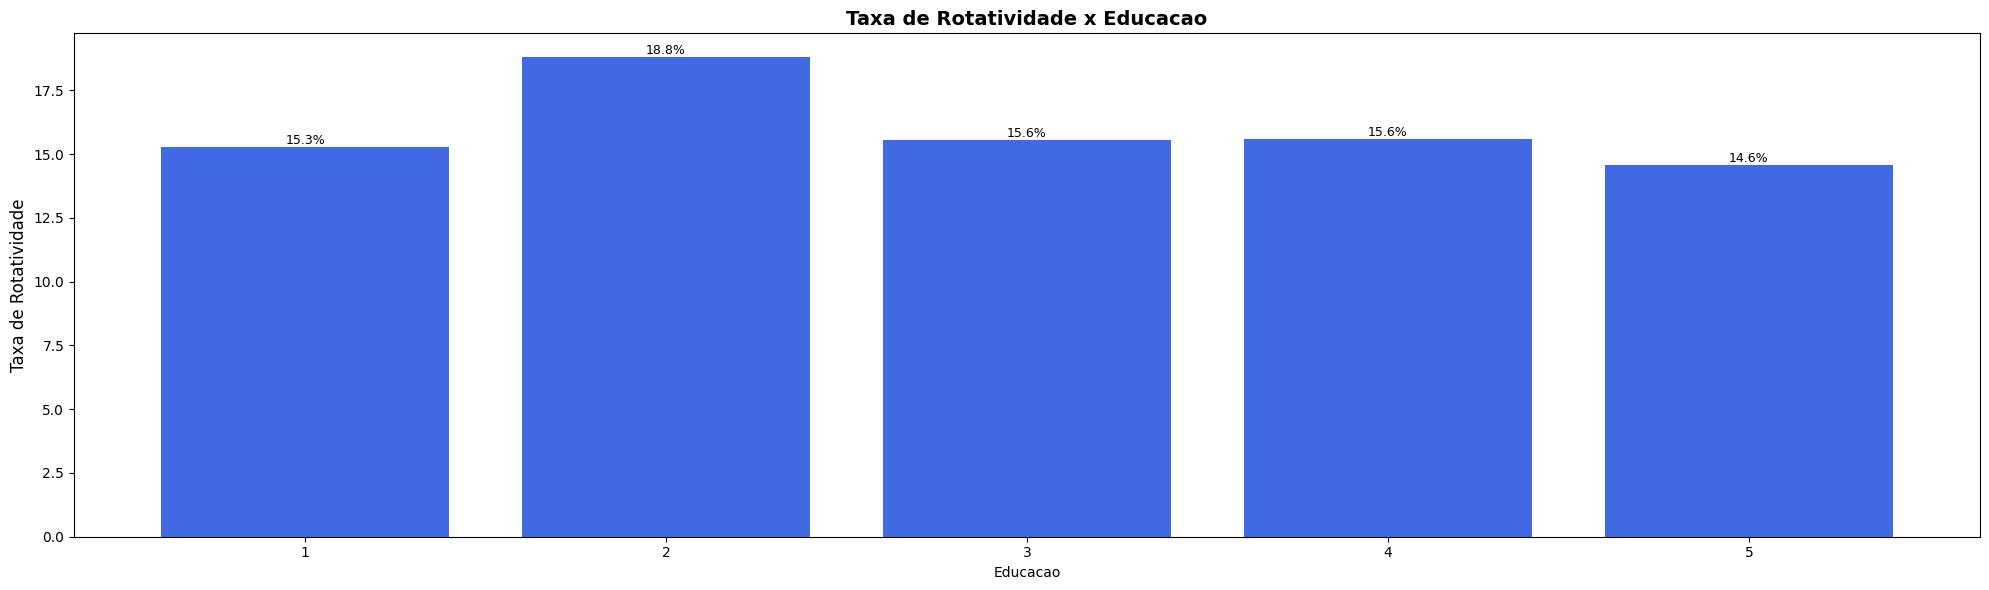

In [66]:
# Variáveis a serem analisadas:
for var in vars_categoricas:

  percentual_por_categoria = df_publico.groupby(var)['TARGET'].mean() * 100

  percentual_por_categoria = percentual_por_categoria.sort_values(ascending=False)

  plt.figure(figsize=(20, 6))
  bars = plt.bar(percentual_por_categoria.index, percentual_por_categoria.values, color='royalblue')

  for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

  plt.title(f'Taxa de Rotatividade x {var}', fontsize=14, fontweight='bold')
  plt.xlabel(f'{var}')
  plt.ylabel('Taxa de Rotatividade', fontsize=12)
  plt.tight_layout()
  plt.show()

**Insights gerados:**

- A taxa de rotatividade é significativamente maior em pessoas que viagem frequentemente (24,9%) contra apenas 8% de pessoas que não viajam;

- No departamento Recursos Humanos a taxa de rotatividade é praticamente o dobro dos outros departamentos (com 30,2%);

- Pessoas com o Campo de Educação em Recursos Humanos tem uma taxa de rotatividade de 40,7%, sendo mais que o dobro do segundo colocado, que é Ciências da Vida com 16,7%;

- Em relação aos gêneros, a rotatividade é maior nos homens, com 16,7% contra 15,3% das mulheres;

- As 3 funções com maior taxa de rotatividade são: Diretor de Pesquisa (23,8%), Cientista de Pesquisa (18,2%) e Executivo de Vendas (16,9%);

- Pensando em Estado Civil, solteiros possuem o dobro de taxa de rotatividade do segundo colocado com 25,5%, seguido de casados com 12,5%;

- Em Satisfação com o Ambiente é possível observar uma monotonicidade, onde funcionários menos satisfeitos tem um índice de rotatividade maior do que funcionários mais satisfeitos;

- Funcionários que não estão satisfeitos no trabalho tem o dobro de taxa de rotatividade (22,9%) do que funcionários que estão muito satisfeitos (11,4%);

- Pessoas que avaliaram como nota 1 na pesquisa de Equilibrio Trabalho Vida tem 31,4% de taxa de rotatividade, porém ao contrário do esperado pessoas que votaram 4 tem uma taxa maior do que pessoas que votaram 2 e 3;

- Envolvimento no Trabalho segue o mesmo padrão de Equilibrio Trabalho Vida, onde as maiores taxas de rotatividade estão nas pessoas que votaram 1 e 4;

- Funcionários que foram avaliados com nota 4 na Avaliação de Desempenho tem uma taxa de rotatividade maior com 18,1%, contra 15,8% das pessoas que tiveram nota 3;

- Em relação ao Nível de Educação, pessoas com ensino superior incompleto tem a maior taxa de rotatividade com 18,8% e pessoas com Douturado tem apenas 14,6%.

### Variáveis numéricas

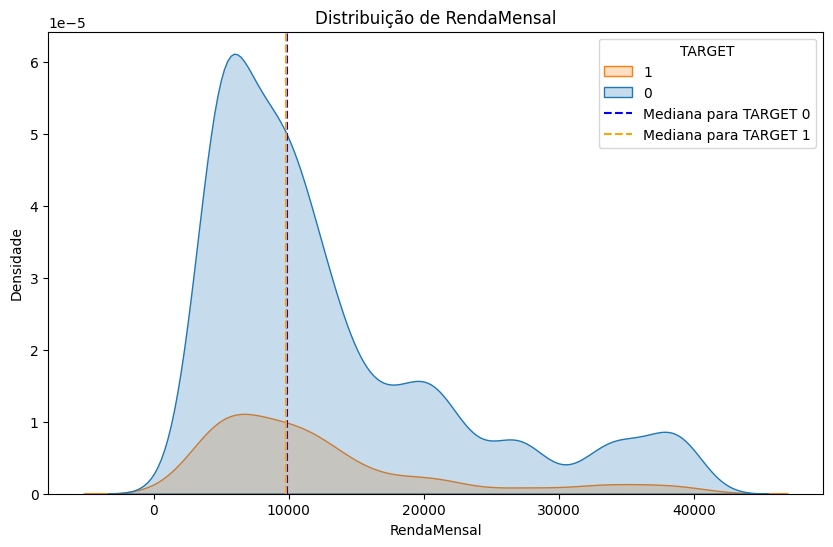

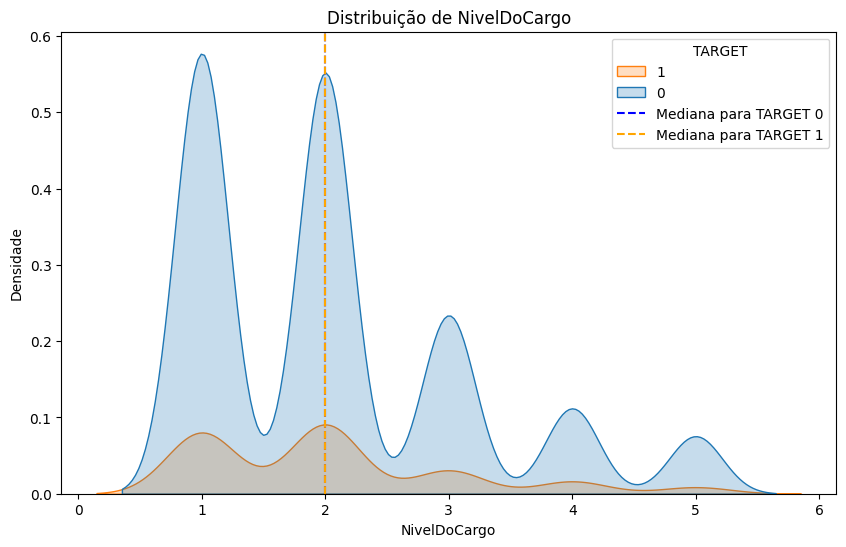

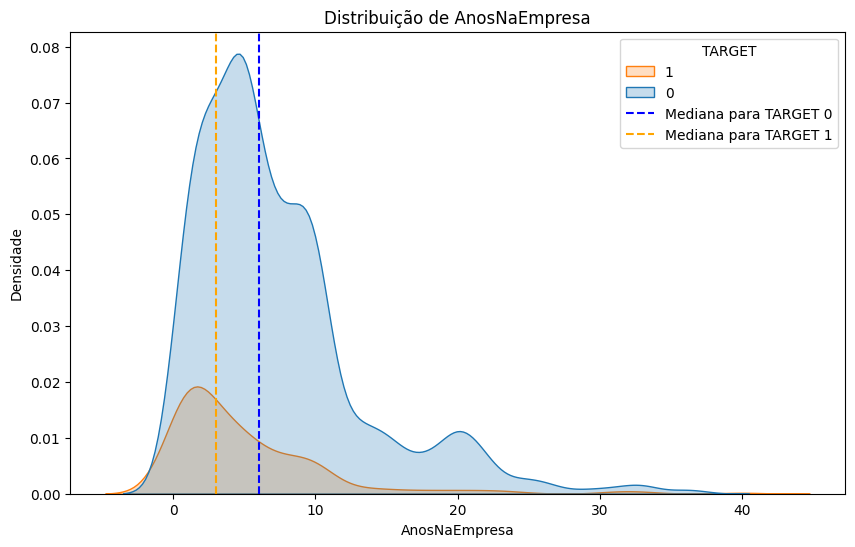

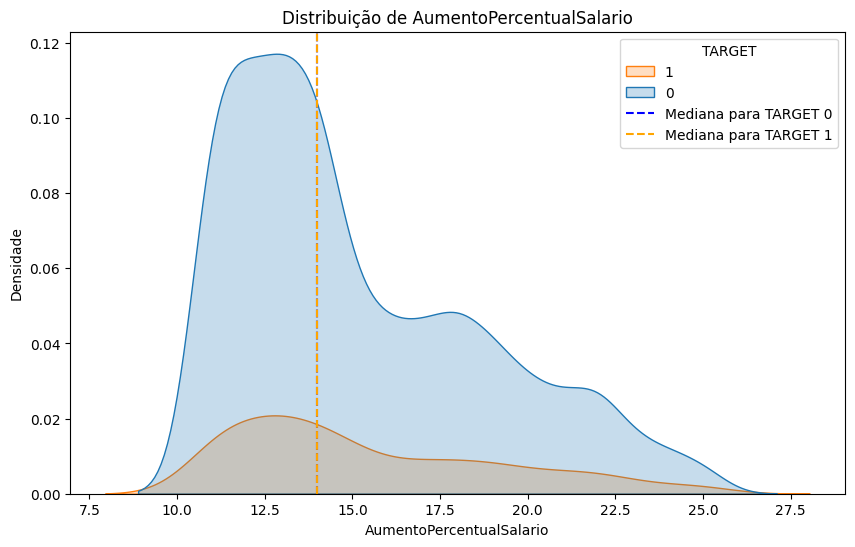

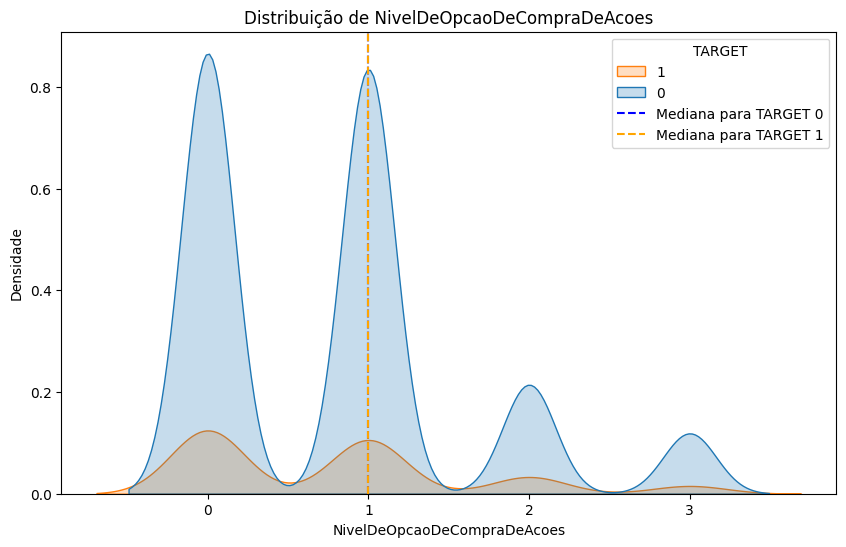

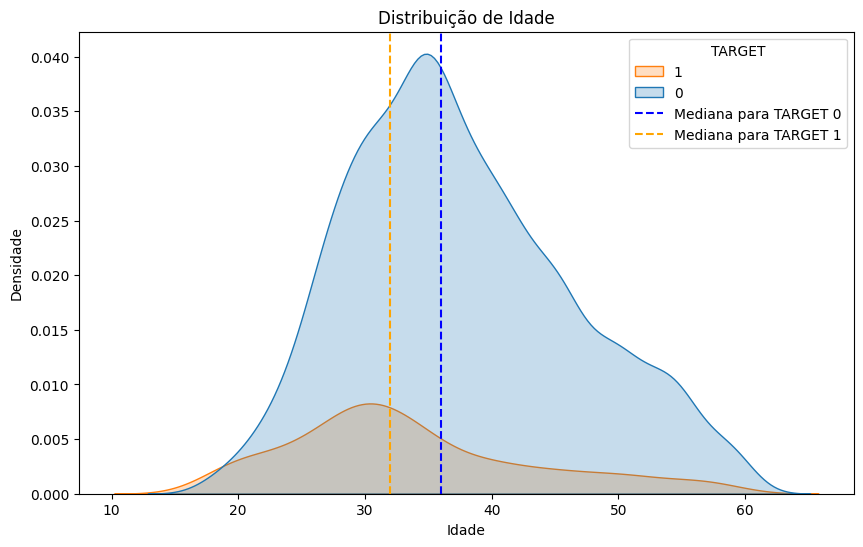

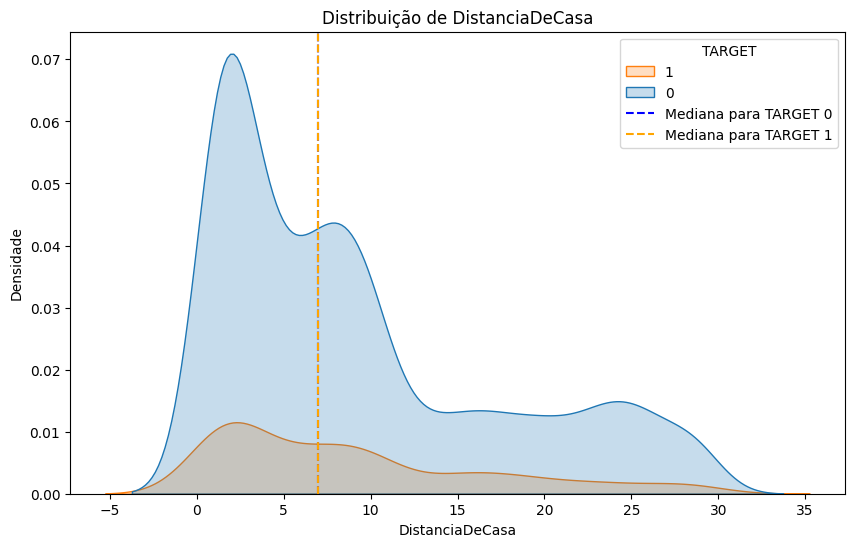

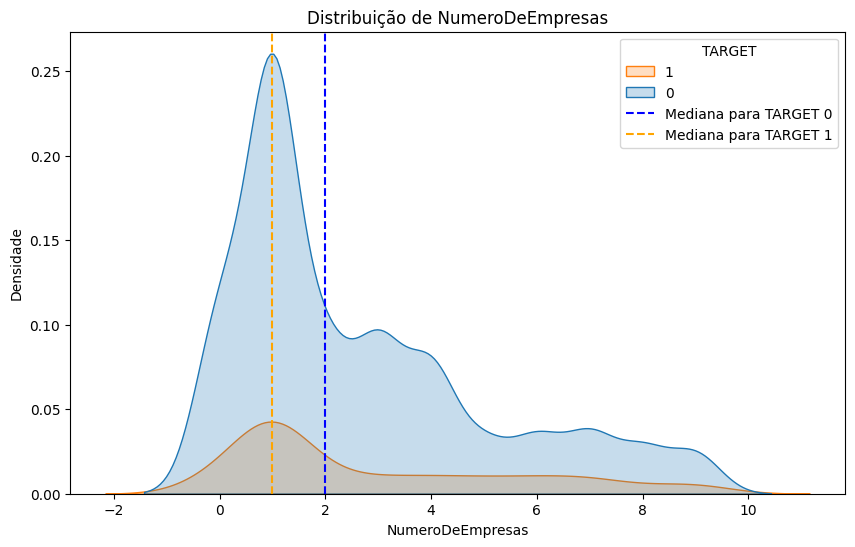

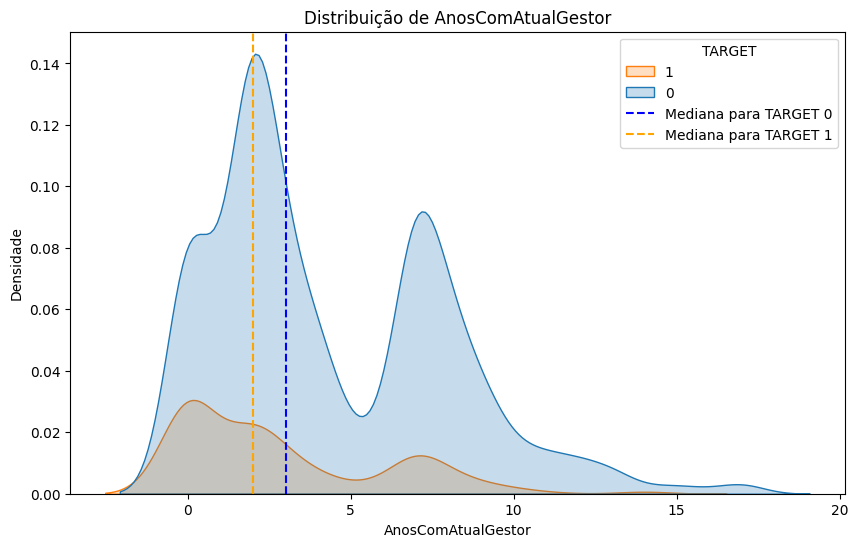

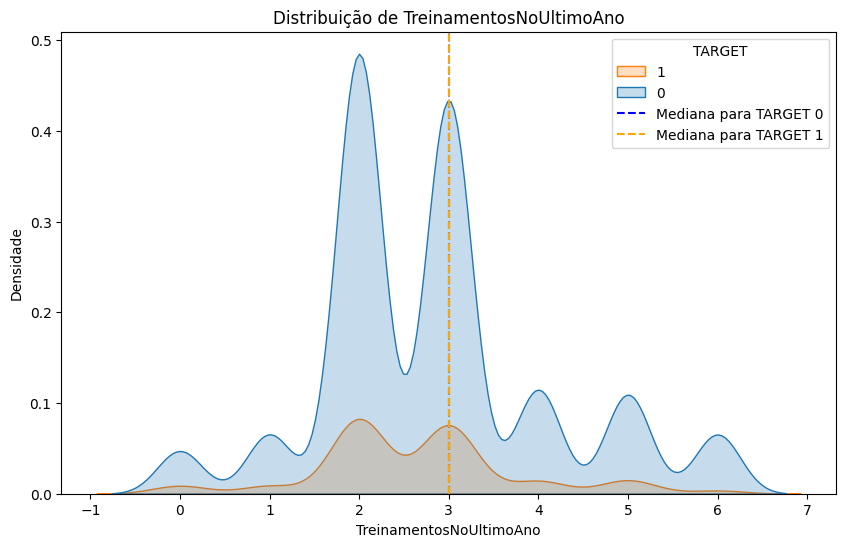

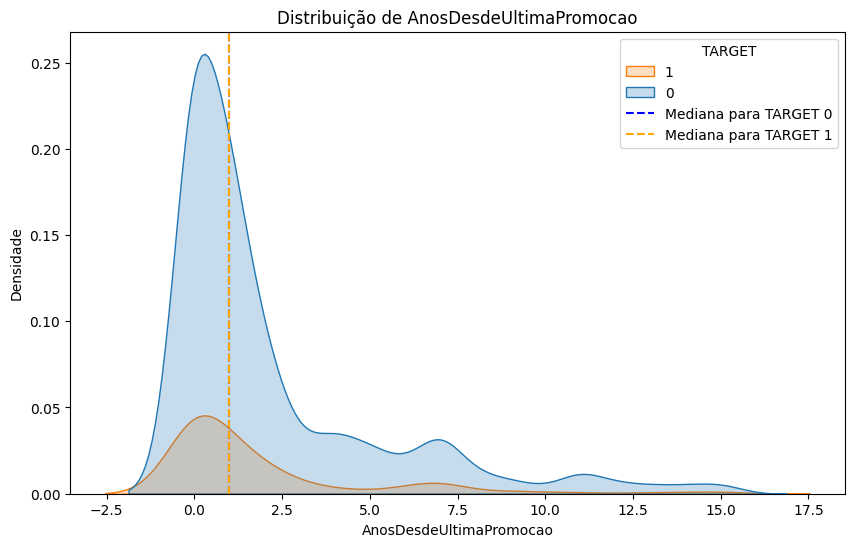

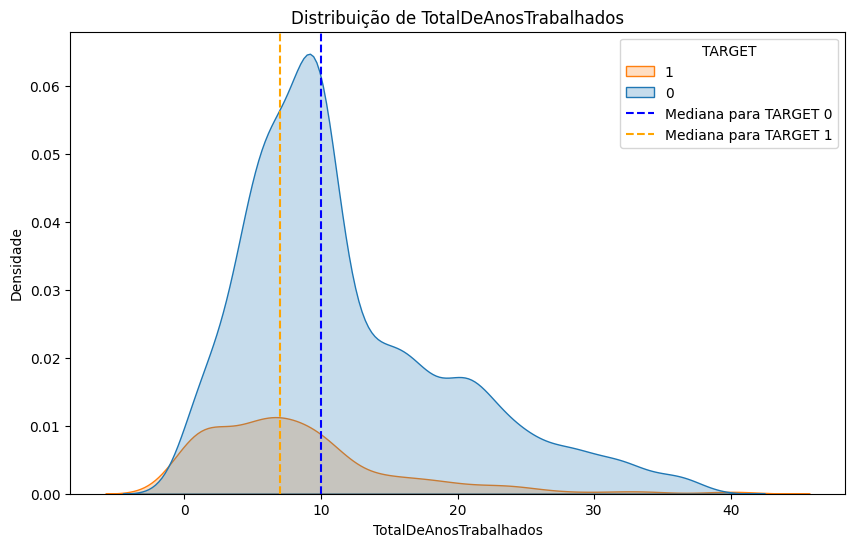

In [67]:
for var in vars_numericas:

  # Calcular as medianas para cada grupo
  medianas = df_publico.groupby('TARGET')[var].median()

  colors = ['blue','orange']
  i = 0

  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df_publico, x=var, hue='TARGET', fill=True, warn_singular=False)

  # Adicionar linhas verticais representando as medianas
  for target, mediana in medianas.items():
      plt.axvline(x=mediana, linestyle='--', color=colors[i], label=f'Mediana para TARGET {target}')
      i += 1

  plt.title(f'Distribuição de {var}')
  plt.ylabel('Densidade')
  plt.xlabel(f'{var}')
  plt.legend(title='TARGET', loc='upper right', labels=['1', '0', 'Mediana para TARGET 0', 'Mediana para TARGET 1'])
  plt.show()

**Insights gerados:**

- Pessoas que tem menos anos trabalhos tem uma tendência maior a rotacionar do que pessoas com mais anos de experiência;

- Essa mesma lógica também é aplicada para Anos na Empresa, onde pessoas mais velhas tendem a rotacionar menos;

- A quantidade de treinamentos no último ano parece não interferir significamente na taxa de rotatividade;

- Renda mensal também parece não significar muito na decisão de pedir pra sair da empresa;

- Funcionários que tem mais tempo com o atual gestor tendem a ficar na empresa, ao contrário dos que tem pouco tempo e pedem pra sair;

- Distância de casa não parece ser um quesito importante na decisão de sair da empresa ou não, já que as medianas estão muito parecidas;

- Uma quantidade significativa de funcionários, tanto as pessoas que pediram pra sair quanto as que ficaram na empresa, receberam promoções nos últimos 3 anos, então essa variável não parece ser significativa para a decisão;

- Aumento Percentual de Salário não parece ser uma variável significativa para as pessoas ficarem, já que as medianas estão bem parecidas nos dois grupos;

- Em relação ao Nível do Cargo, pessoas de nível 2 tendem a sair mais que as outras, porém parece não ser muito significativo pra decisão de sair ou não;

- Nível de Opção de OCmpra de Ações parece não fazer muita diferença na decisão de sair ou ficar na empresa;

- Parece haver um tendência em que funcionários que passaram por apenas uma empresa tem uma taxa de rotatividade maior;

- Pessoas mais jovens tendem a ter uma taxa de rotatividade maior do que pessoas com mais idade.

# 2- Preparação dos Dados

## Dividindo os dados em treino e teste

In [68]:
abt = df_publico.drop(columns=['Rotatividade','TARGET','IDDoEmpregado'])
target = df_publico.TARGET

X_train, X_test, y_train, y_test = train_test_split(abt,target,test_size=0.3,random_state=0)

## Preparando os dados e selecionando as variáveis

In [69]:
from sklearn.impute import SimpleImputer

# criando os dfs de treino e teste
abt_treino = pd.concat((X_train,y_train),axis=1)
abt_test = pd.concat((X_test,y_test),axis=1)

# selecionando a média para variáveis numéricas e a moda para variáveis categóricas no inputer
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# dividindo em colunas numéricas e categóricas na base treino
num_features_train = X_train[vars_numericas]
cat_features_train = X_train[vars_categoricas]

# dividindo em colunas numéricas e categóricas na base teste
num_features_test = X_test[vars_numericas]
cat_features_test = X_test[vars_categoricas]

# calculando as médias das colunas numéricas da base treino e aplicando nas bases treino e teste
df1 = pd.DataFrame(imputer_num.fit_transform(num_features_train),columns=vars_numericas)
df2 = pd.DataFrame(imputer_num.transform(num_features_test),columns=vars_numericas)
df1.index = num_features_train.index
df2.index = num_features_test.index
num_features_train = df1.copy()
num_features_test = df2.copy()

# calculando as modas das colunas categóricas da base treino e aplicando nas bases treino e teste
df1 = pd.DataFrame(imputer_cat.fit_transform(cat_features_train),columns=vars_categoricas)
df2 = pd.DataFrame(imputer_cat.transform(cat_features_test),columns=vars_categoricas)
df1.index = cat_features_train.index
df2.index = cat_features_test.index
cat_features_train = df1.copy()
cat_features_test = df2.copy()

ce = TargetEncoder()

# calculando o TargetEncoder baseado na base treino e aplicando nas bases de treino e teste
cat_features_train = ce.fit_transform(cat_features_train,y_train)
cat_features_test = ce.transform(cat_features_test,y_test)

# montando os dataframes finais de treino e teste
new_abt_treino = pd.concat((num_features_train,cat_features_train),axis=1)
new_abt_teste = pd.concat((num_features_test,cat_features_test),axis=1)

# removendo as variáveis com zero variância
selector = VarianceThreshold(threshold=0)
selector.fit_transform(new_abt_treino)

# colunas selecionadas
selected_features = new_abt_treino.columns[selector.get_support()]

# mantendo apenas features selecionadas
new_abt_treino = new_abt_treino[selected_features]
new_abt_teste = new_abt_teste[selected_features]

# removendo as variáveis altamente correlacionadas
threshold = 0.8

# calculando a matrix de correlação
corr_matrix = new_abt_treino.corr().abs()

# selecionando o triângulo superior da matriz de correlação
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# identificando as colunas que serão cortadas baseado no valor de corte (threshold)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# removendo as colunas
new_abt_treino = new_abt_treino.drop(columns=to_drop)
new_abt_teste = new_abt_teste.drop(columns=to_drop)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# selecionando o modelo para seleção de variáveis
xgb_model = xgb.XGBClassifier(random_state=0)

# ajustando o modelo com a base treino
xgb_model.fit(new_abt_treino, y_train)

# Obter a importância das features
feature_importance = xgb_model.feature_importances_

df = pd.DataFrame({'Feature':new_abt_treino.columns,'Importance':feature_importance})

features_rl = df.sort_values(by='Importance',ascending=False)[:20].Feature.to_list()

X_train_03 = new_abt_treino[features_rl]
X_test_03 = new_abt_teste[features_rl]

new_abt_treino = pd.concat((X_train_03,y_train),axis=1)
new_abt_teste = pd.concat((X_test_03,y_test),axis=1)

## Verificando a Linearidade com o Log Odds

Para utilizar a Regressão Logística do StatsModels, uma das premissas é verificar a Linearidade com o Log Odds

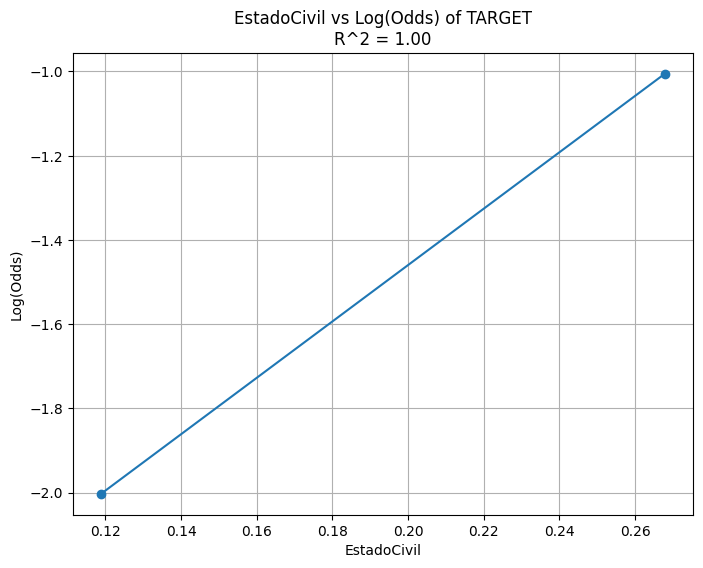

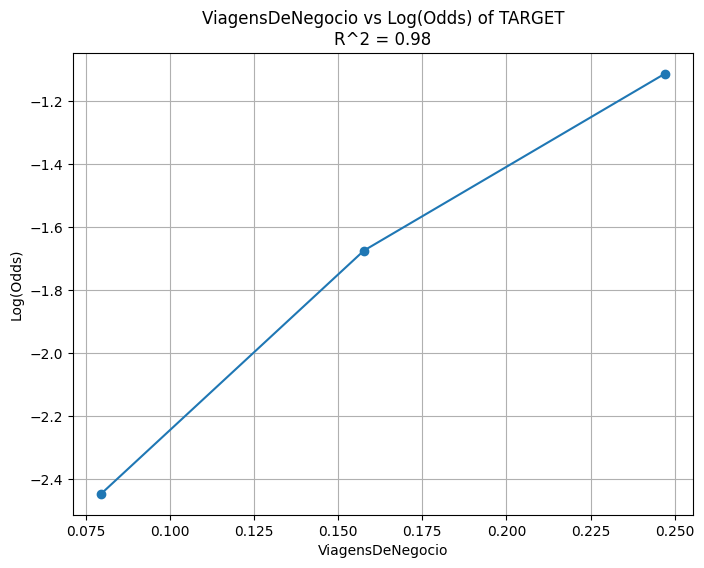

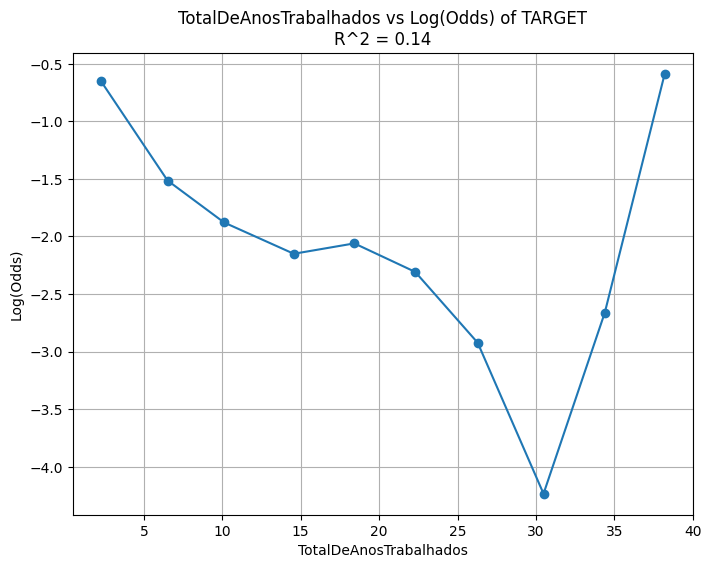

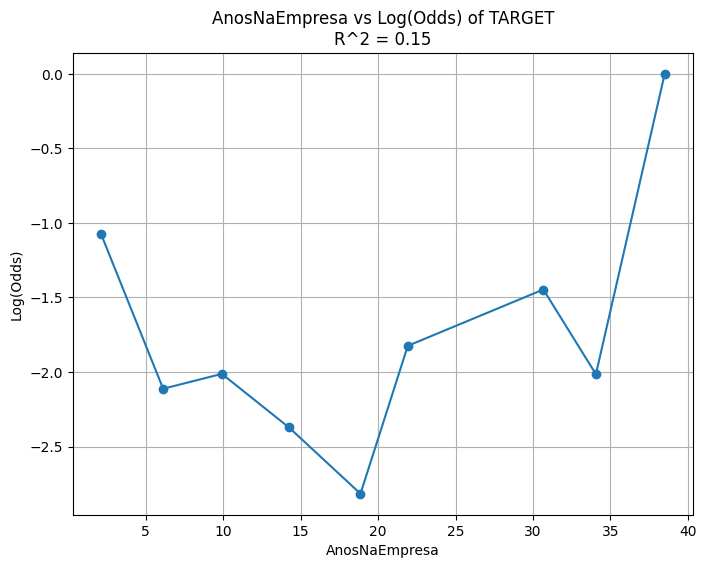

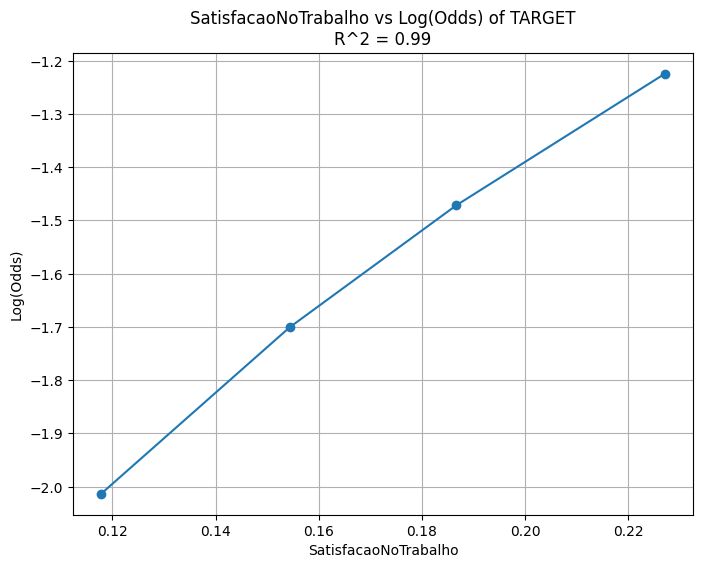

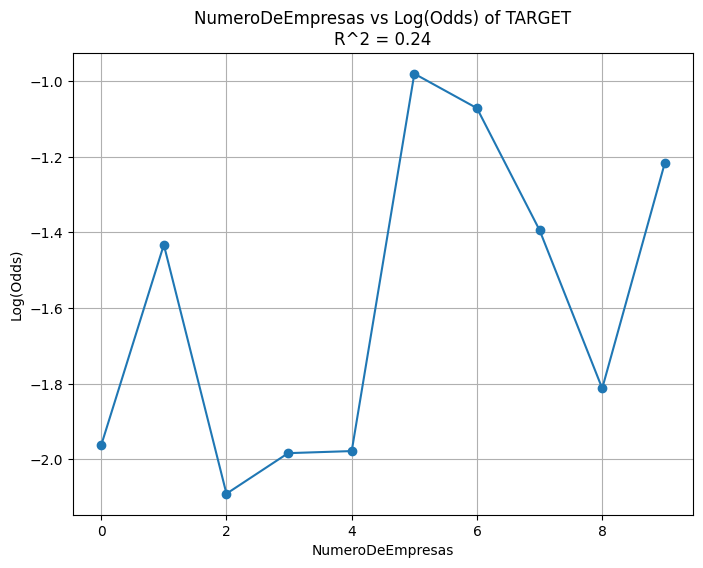

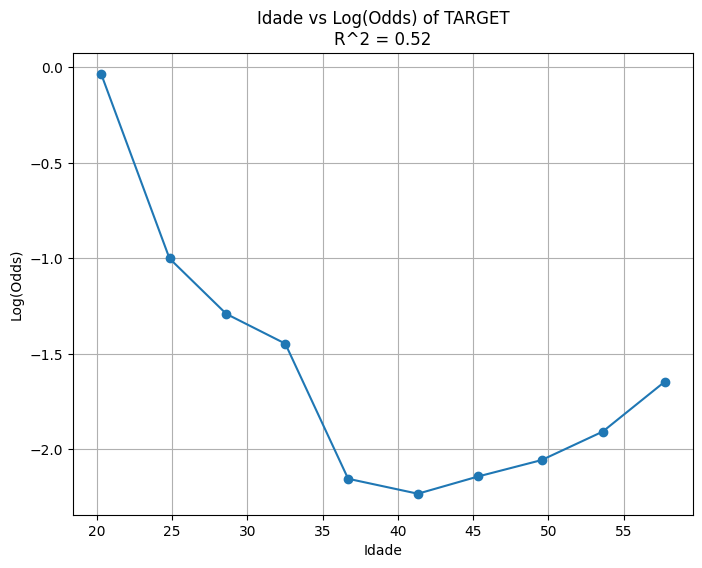

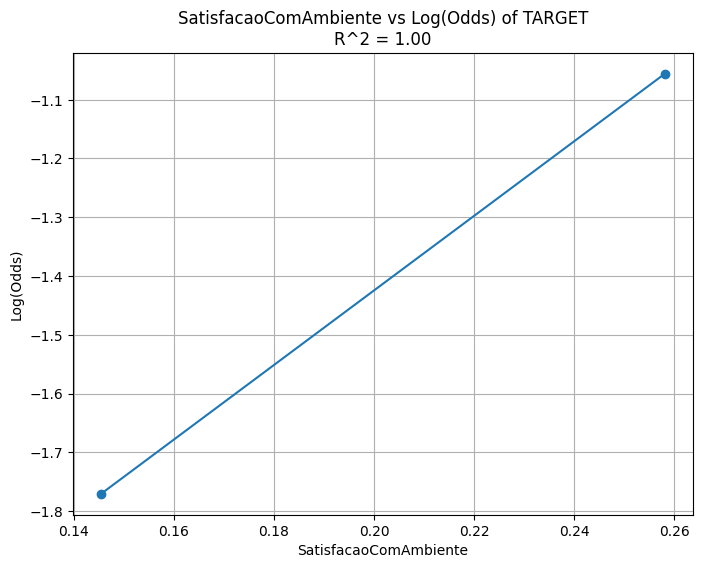

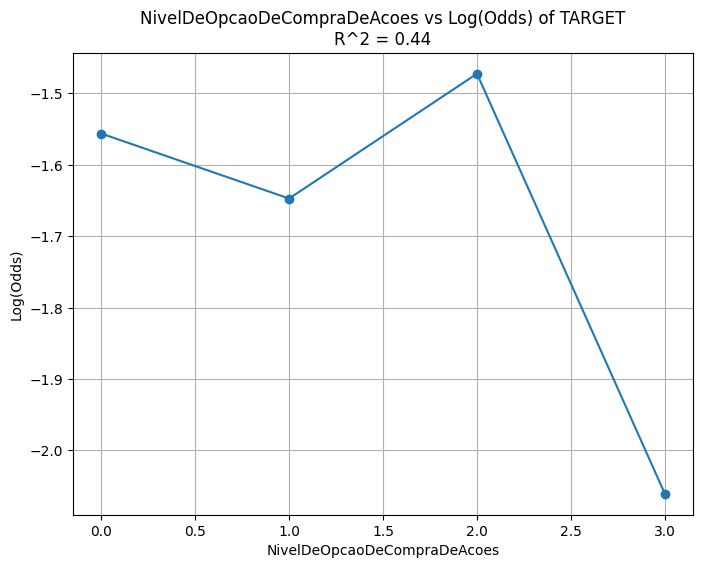

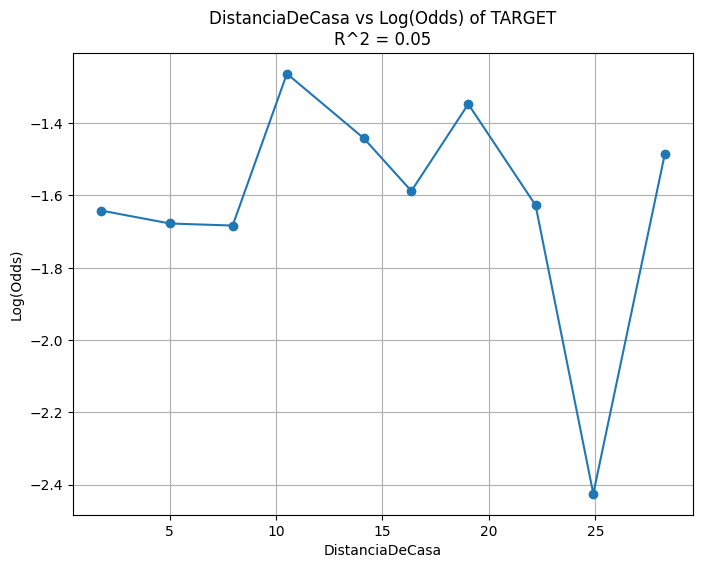

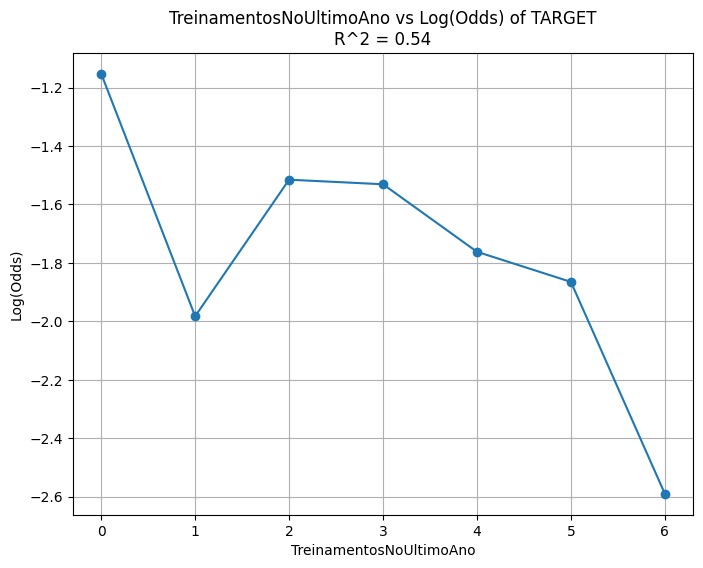

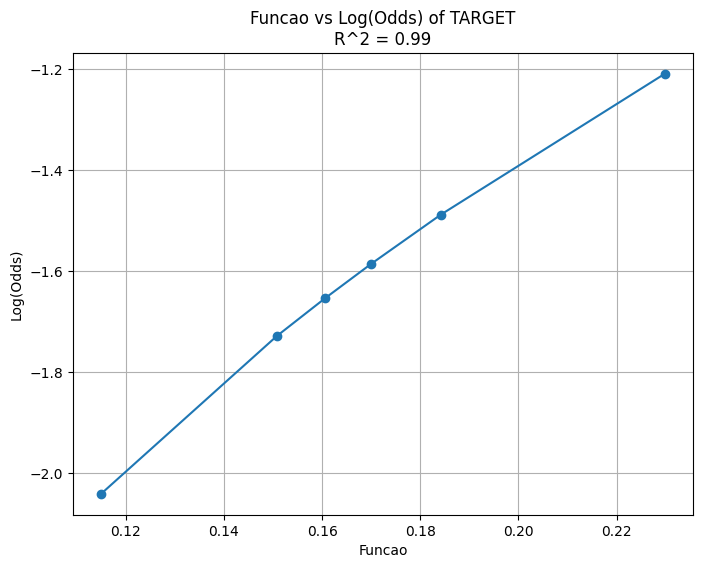

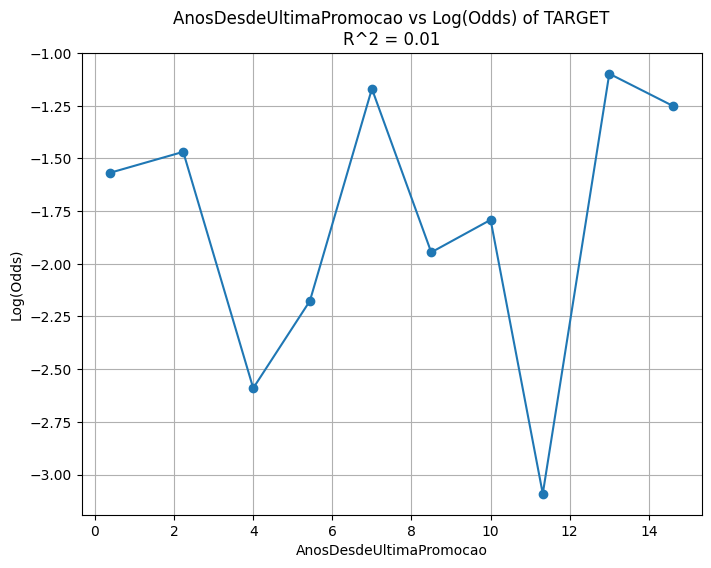

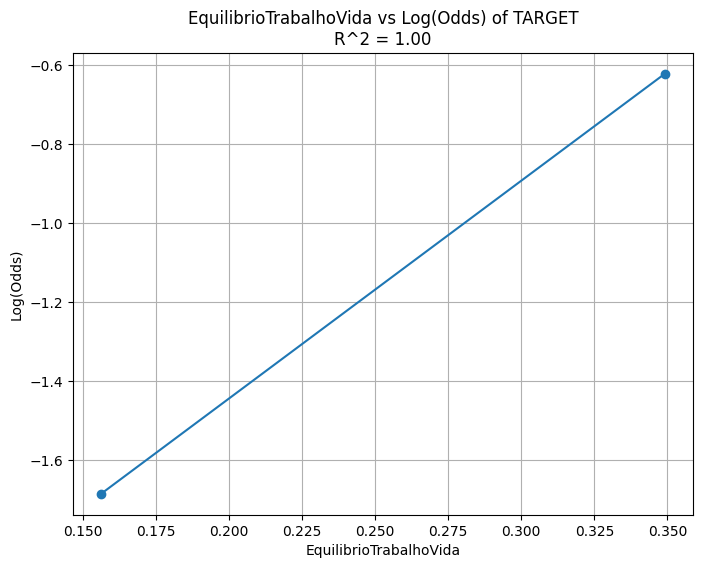

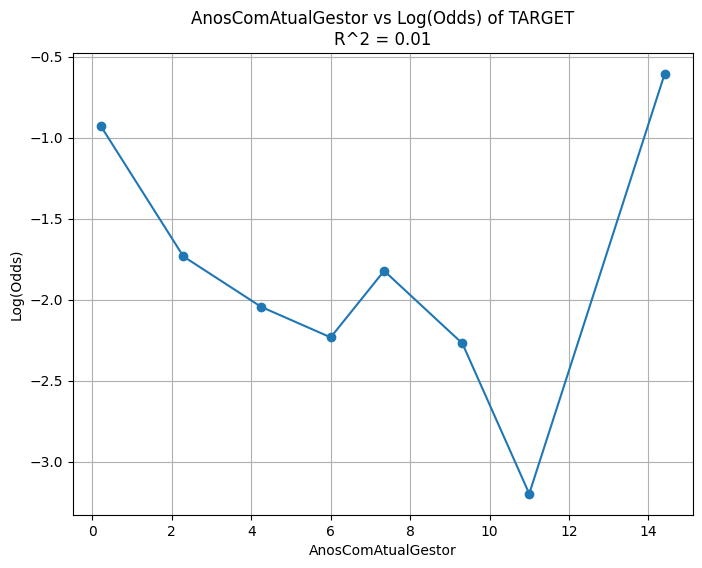

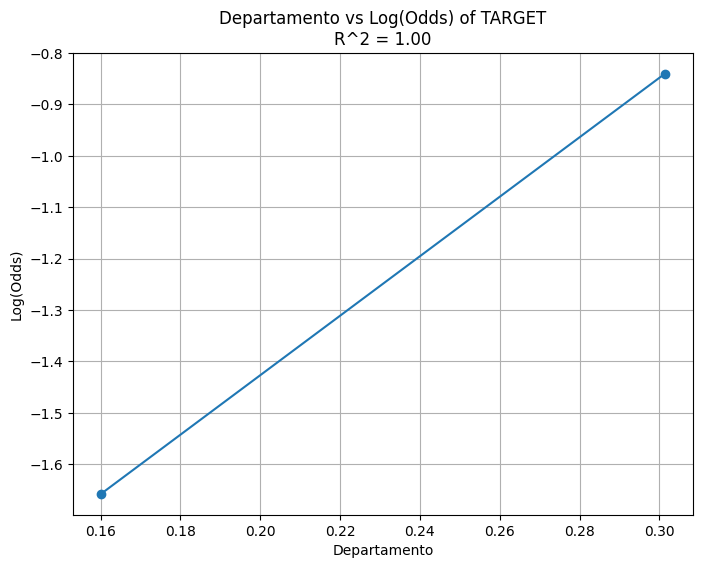

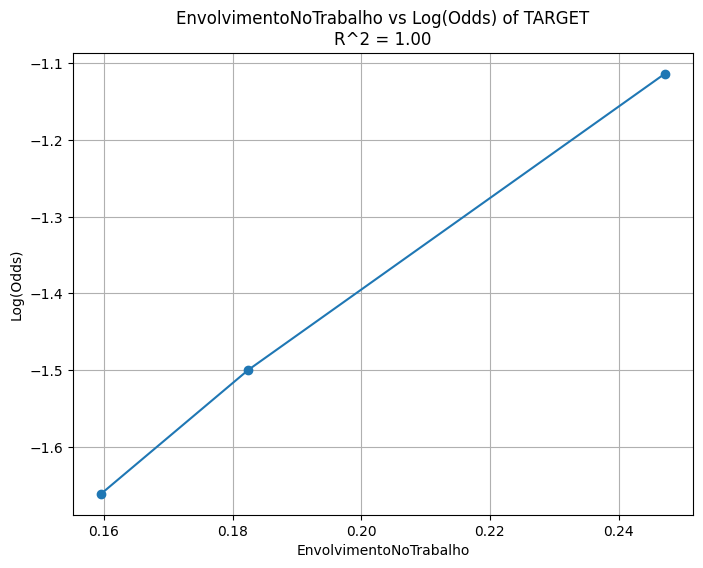

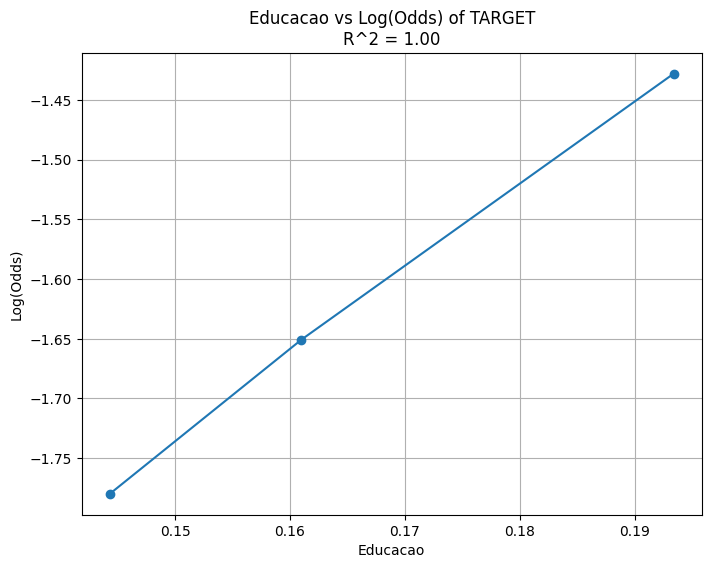

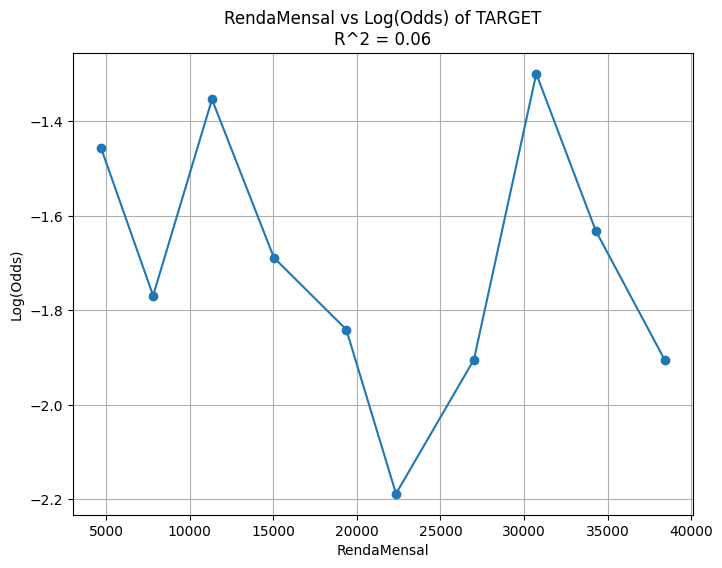

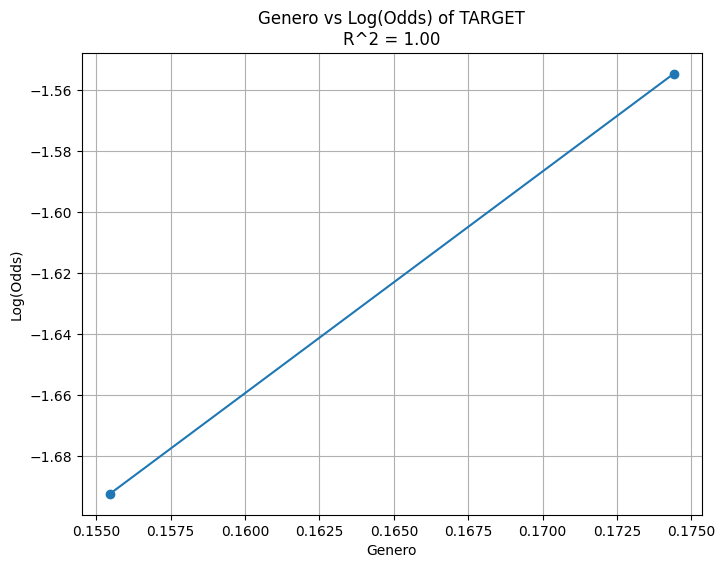

In [71]:
plot_variable_vs_logodds(new_abt_treino, list(new_abt_treino.drop(columns='TARGET').columns),'TARGET')

### Verificando o que fazer com cada variável a partir do resultado do log odds ou do tipo de variável

In [72]:
vars_categoricas

['ViagensDeNegocio',
 'Departamento',
 'CampoDeEducacao',
 'Genero',
 'Funcao',
 'EstadoCivil',
 'SatisfacaoComAmbiente',
 'SatisfacaoNoTrabalho',
 'EquilibrioTrabalhoVida',
 'EnvolvimentoNoTrabalho',
 'AvaliacaoDeDesempenho',
 'Educacao']

In [73]:
r2_df = calculate_r2_for_logodds(new_abt_treino, list(new_abt_treino.drop(columns='TARGET').columns), 'TARGET',threshold=0.85)
r2_df.loc[r2_df['Variable'].isin(vars_categoricas), 'Feat Eng'] = 'Categorizar'
r2_df

Variable       R^2     Feat Eng
0                   EstadoCivil  1.000000  Categorizar
1              ViagensDeNegocio  0.983193  Categorizar
2        TotalDeAnosTrabalhados  0.142278  Categorizar
3                 AnosNaEmpresa  0.146760  Categorizar
4          SatisfacaoNoTrabalho  0.993527  Categorizar
5              NumeroDeEmpresas  0.243114  Categorizar
6                         Idade  0.515183  Categorizar
7         SatisfacaoComAmbiente  1.000000  Categorizar
8   NivelDeOpcaoDeCompraDeAcoes  0.438500  Categorizar
9               DistanciaDeCasa  0.049026  Categorizar
10      TreinamentosNoUltimoAno  0.542843  Categorizar
11                       Funcao  0.989515  Categorizar
12      AnosDesdeUltimaPromocao  0.008717  Categorizar
13       EquilibrioTrabalhoVida  1.000000  Categorizar
14           AnosComAtualGestor  0.012837  Categorizar
15                 Departamento  1.000000  Categorizar
16       EnvolvimentoNoTrabalho  0.998657  Categorizar
17                     Educacao  0.999073  Categorizar
18                  RendaMensal  0.057886  Categorizar
19                       Genero  1.000000  Categorizar

In [74]:
# separando as variáveis continuas e as que vão categorizar
variaveis_continuas = r2_df[r2_df['Feat Eng'] == 'Usar como contínua']['Variable'].tolist()
categorize_vars = r2_df[r2_df['Feat Eng'] == 'Categorizar']['Variable'].tolist()

In [75]:
print(f'Variáveis para usar como contínuas: {variaveis_continuas}')
print(f' Variáveis para categorizar: {categorize_vars}')

Variáveis para usar como contínuas: []
 Variáveis para categorizar: ['EstadoCivil', 'ViagensDeNegocio', 'TotalDeAnosTrabalhados', 'AnosNaEmpresa', 'SatisfacaoNoTrabalho', 'NumeroDeEmpresas', 'Idade', 'SatisfacaoComAmbiente', 'NivelDeOpcaoDeCompraDeAcoes', 'DistanciaDeCasa', 'TreinamentosNoUltimoAno', 'Funcao', 'AnosDesdeUltimaPromocao', 'EquilibrioTrabalhoVida', 'AnosComAtualGestor', 'Departamento', 'EnvolvimentoNoTrabalho', 'Educacao', 'RendaMensal', 'Genero']


### Verificando o R2 com algumas transformações

In [76]:
results_df = calculate_r2_for_logodds_and_transformations(new_abt_treino, categorize_vars, 'TARGET',threshold=0.85)
results_df.loc[results_df['Variable'].isin(vars_categoricas), 'Feat Eng'] = 'Categorizar'
results_df

Variable Best Transformation  R^2 of Transformation  \
0                   EstadoCivil              AbsLog               1.000000   
1              ViagensDeNegocio              AbsLog               0.983193   
2        TotalDeAnosTrabalhados              AbsLog               0.770839   
3                 AnosNaEmpresa              AbsLog               0.208564   
4          SatisfacaoNoTrabalho              AbsLog               0.993527   
5              NumeroDeEmpresas              AbsLog               0.333862   
6                         Idade              AbsLog               0.601478   
7         SatisfacaoComAmbiente              AbsLog               1.000000   
8   NivelDeOpcaoDeCompraDeAcoes              AbsLog               0.719657   
9               DistanciaDeCasa           Quadratic               0.204812   
10      TreinamentosNoUltimoAno           Quadratic               0.764332   
11                       Funcao           Quadratic               0.990494   
12      AnosDesdeUltimaPromocao           Quadratic               0.029949   
13       EquilibrioTrabalhoVida              AbsLog               1.000000   
14           AnosComAtualGestor              AbsLog               0.565264   
15                 Departamento              AbsLog               1.000000   
16       EnvolvimentoNoTrabalho           Quadratic               1.000000   
17                     Educacao              AbsLog               0.999073   
18                  RendaMensal              AbsLog               0.171476   
19                       Genero              AbsLog               1.000000   

       Feat Eng              Transformation Equation  
0   Categorizar                  AbsLog(EstadoCivil)  
1   Categorizar             AbsLog(ViagensDeNegocio)  
2   Categorizar       AbsLog(TotalDeAnosTrabalhados)  
3   Categorizar                AbsLog(AnosNaEmpresa)  
4   Categorizar         AbsLog(SatisfacaoNoTrabalho)  
5   Categorizar             AbsLog(NumeroDeEmpresas)  
6   Categorizar                        AbsLog(Idade)  
7   Categorizar        AbsLog(SatisfacaoComAmbiente)  
8   Categorizar  AbsLog(NivelDeOpcaoDeCompraDeAcoes)  
9   Categorizar           Quadratic(DistanciaDeCasa)  
10  Categorizar   Quadratic(TreinamentosNoUltimoAno)  
11  Categorizar                    Quadratic(Funcao)  
12  Categorizar   Quadratic(AnosDesdeUltimaPromocao)  
13  Categorizar       AbsLog(EquilibrioTrabalhoVida)  
14  Categorizar           AbsLog(AnosComAtualGestor)  
15  Categorizar                 AbsLog(Departamento)  
16  Categorizar    Quadratic(EnvolvimentoNoTrabalho)  
17  Categorizar                     AbsLog(Educacao)  
18  Categorizar                  AbsLog(RendaMensal)  
19  Categorizar                       AbsLog(Genero)

### Aplicando as melhores transformações

In [77]:
new_abt_treino_transform = apply_best_transformations(results_df, new_abt_treino,drop_original=True)
new_abt_teste_transform = apply_best_transformations(results_df, new_abt_teste,drop_original=True)

In [78]:
var = list(results_df[results_df['Feat Eng'] == 'Usar como contínua'].Variable)
var = ["TFE_" + variavel for variavel in var]
variaveis_continuas += var
variaveis_continuas

[]

### Categorizando as variáveis que precisam categorizar

In [79]:
# calculando o R² considerando o dataset atualizado
r2_df = calculate_r2_for_logodds(new_abt_treino_transform, new_abt_treino_transform.drop(columns=['TARGET']), 'TARGET',threshold=0.85)
r2_df.loc[r2_df['Variable'].isin(vars_categoricas), 'Feat Eng'] = 'Categorizar'

# separando as variáveis que ainda não se tornaram linear com o log da odds mesmo após as transformações
variaveis_categorizar = r2_df[r2_df['Feat Eng'] == 'Categorizar'].Variable.to_list()

# verificando a cardinalidade dessas variáveis
df_metadata = generate_metadata(new_abt_treino_transform[variaveis_categorizar], 'cardinalidade')
df_metadata

nome_variavel     tipo  qt_nulos  percent_nulos  \
0                   RendaMensal  float64         0            0.0   
1                         Idade  float64         0            0.0   
2        TotalDeAnosTrabalhados  float64         0            0.0   
3                 AnosNaEmpresa  float64         0            0.0   
4               DistanciaDeCasa  float64         0            0.0   
5            AnosComAtualGestor  float64         0            0.0   
6       AnosDesdeUltimaPromocao  float64         0            0.0   
7              NumeroDeEmpresas  float64         0            0.0   
8                        Funcao  float64         0            0.0   
9       TreinamentosNoUltimoAno  float64         0            0.0   
10                     Educacao  float64         0            0.0   
11  NivelDeOpcaoDeCompraDeAcoes  float64         0            0.0   
12       EnvolvimentoNoTrabalho  float64         0            0.0   
13       EquilibrioTrabalhoVida  float64         0            0.0   
14         SatisfacaoNoTrabalho  float64         0            0.0   
15        SatisfacaoComAmbiente  float64         0            0.0   
16                  EstadoCivil  float64         0            0.0   
17             ViagensDeNegocio  float64         0            0.0   
18                 Departamento  float64         0            0.0   
19                       Genero  float64         0            0.0   

    cardinalidade  
0            1313  
1              43  
2              41  
3              37  
4              29  
5              18  
6              16  
7              11  
8               9  
9               7  
10              5  
11              4  
12              4  
13              4  
14              4  
15              4  
16              3  
17              3  
18              3  
19              2

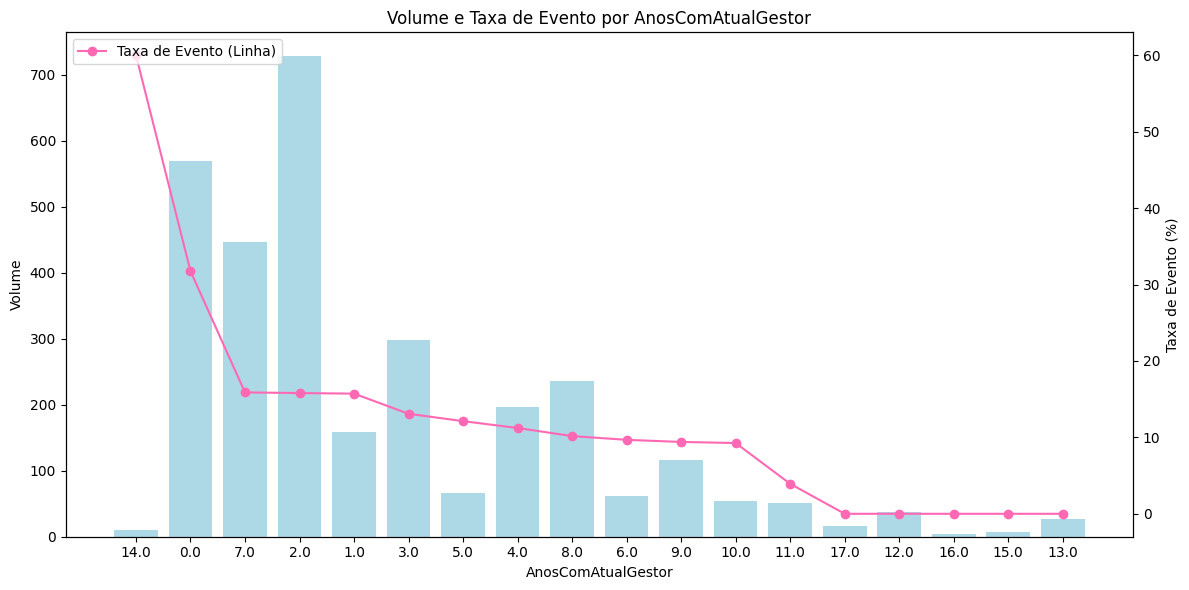

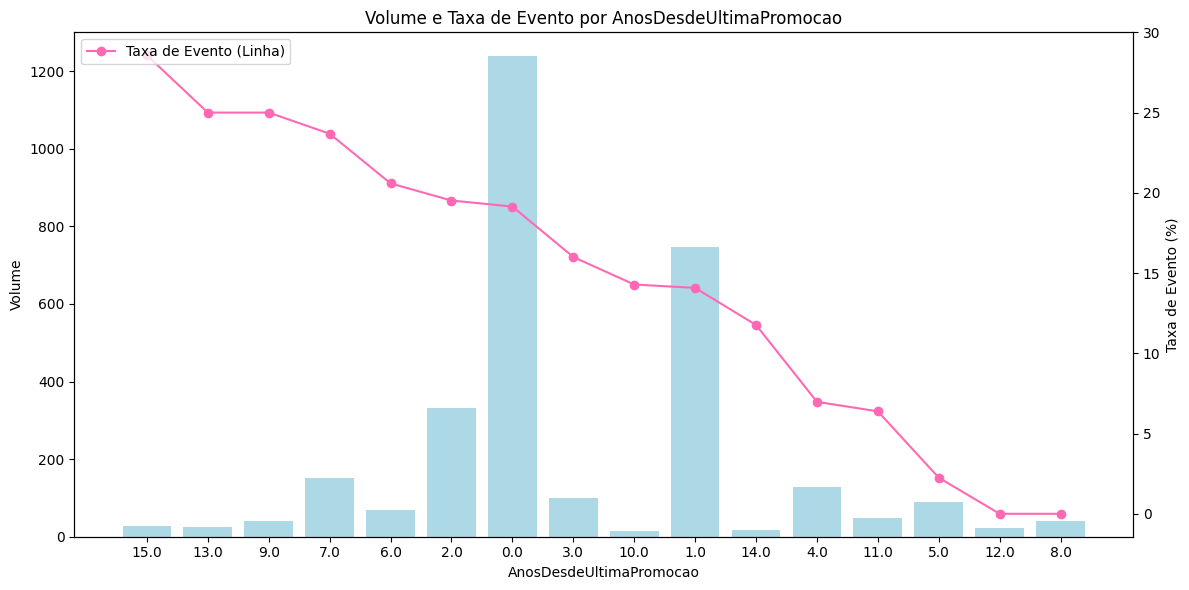

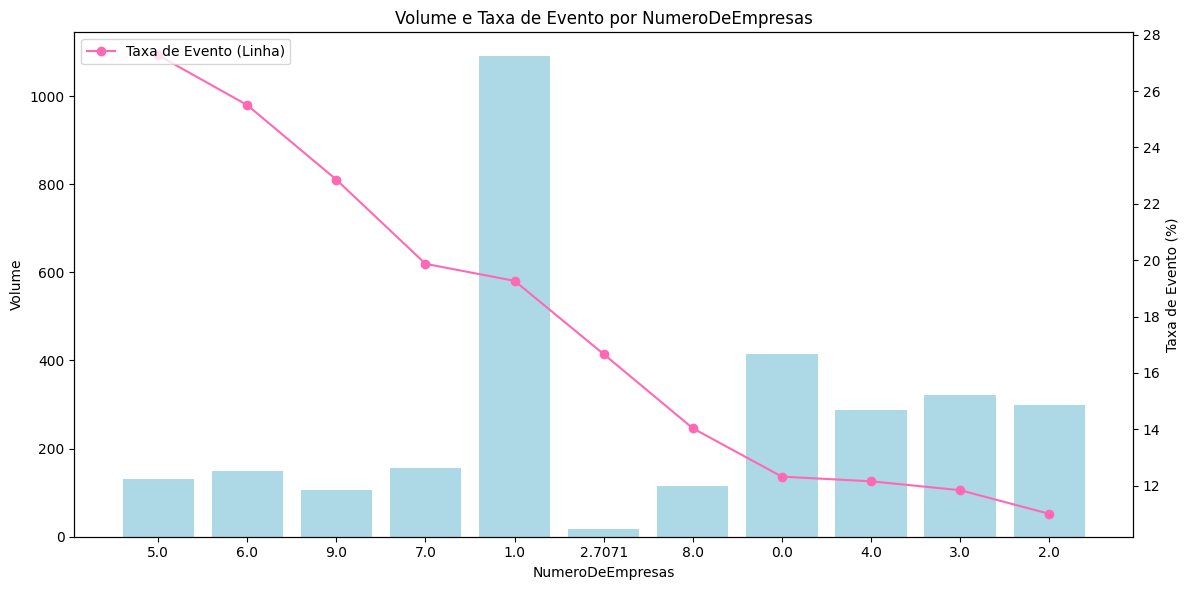

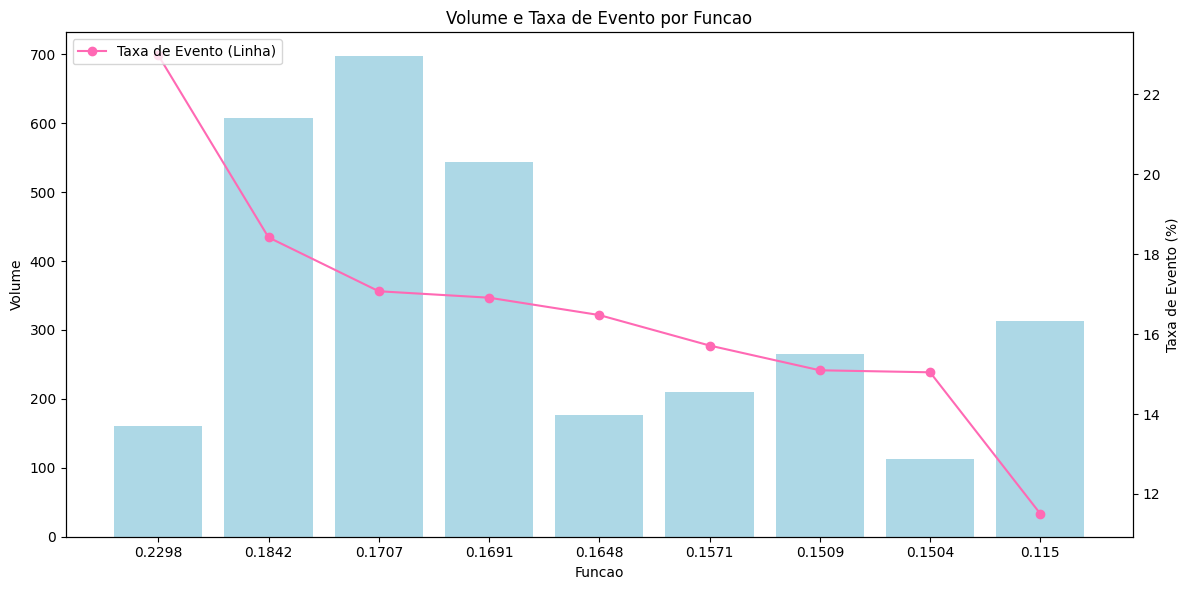

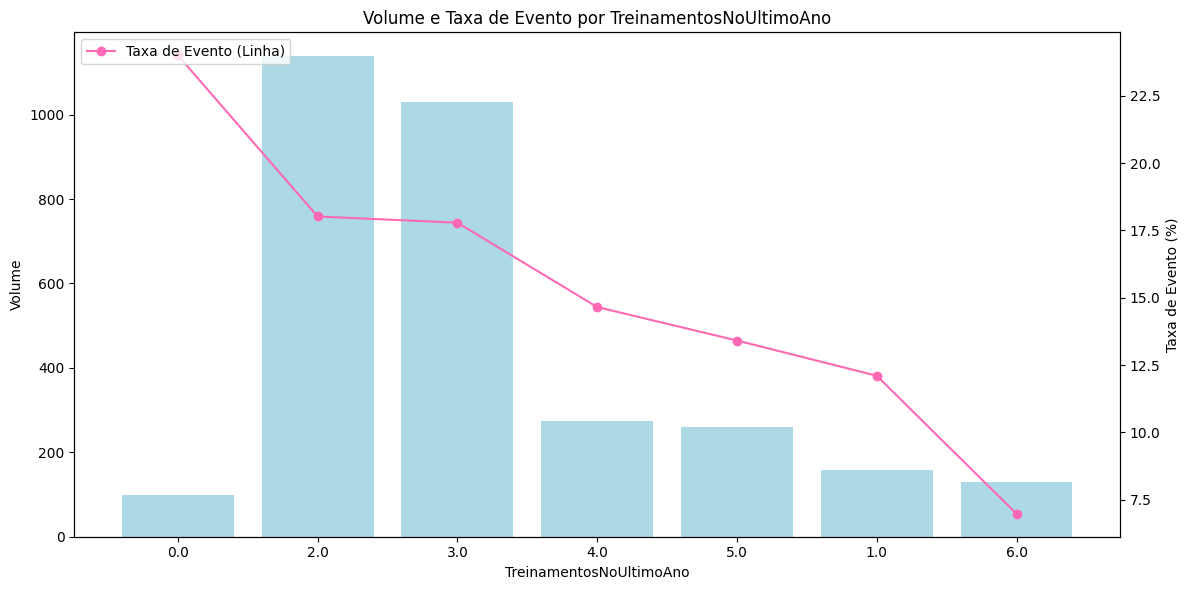

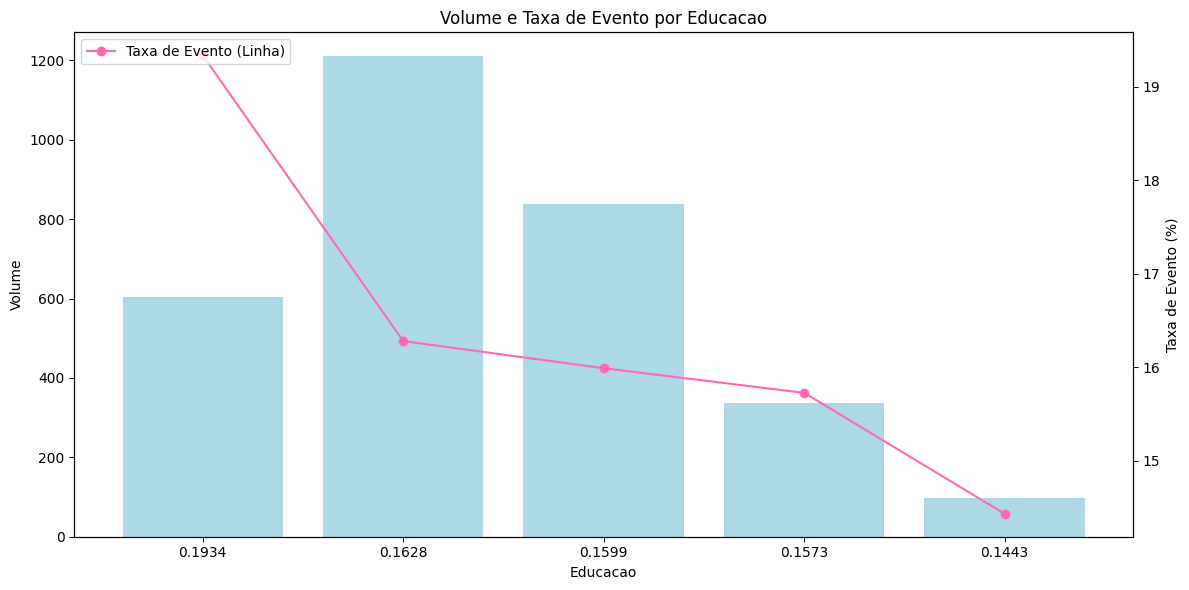

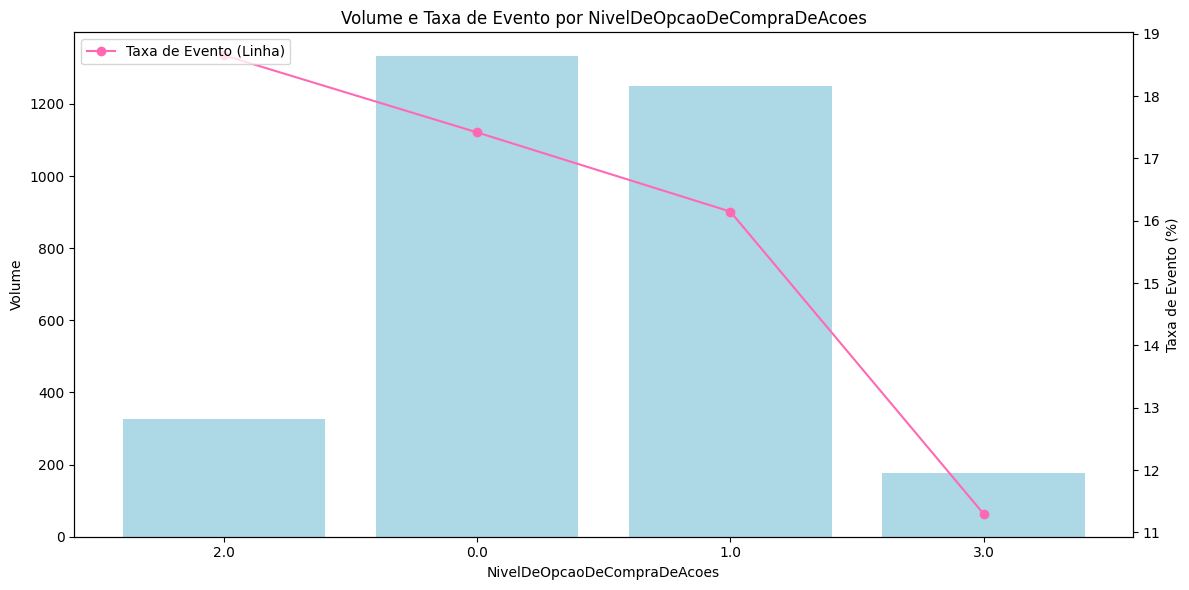

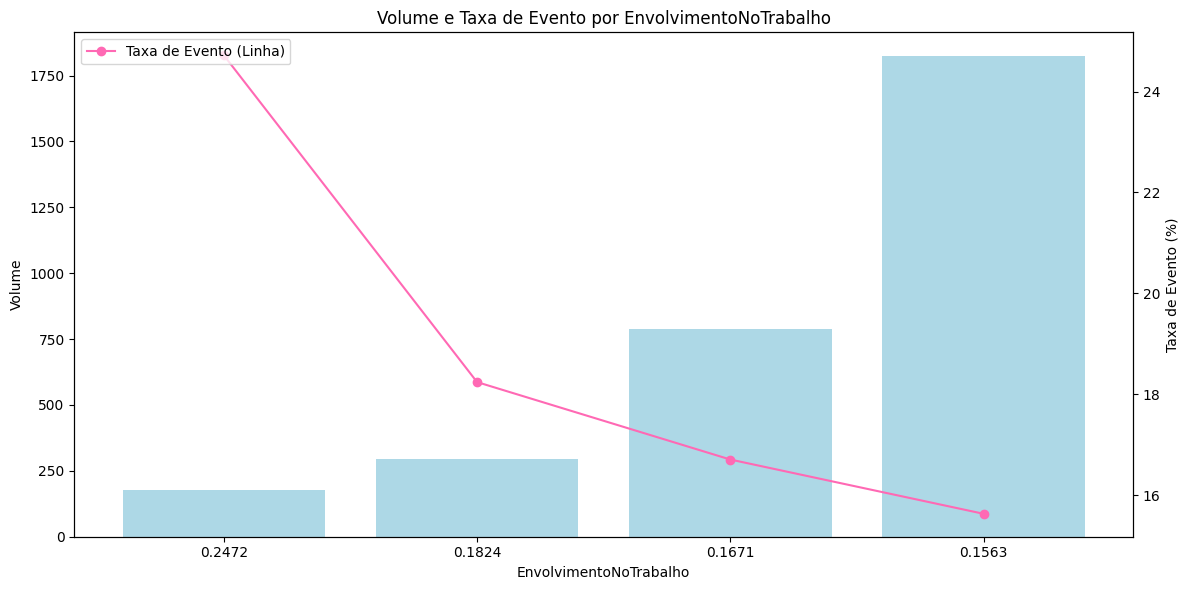

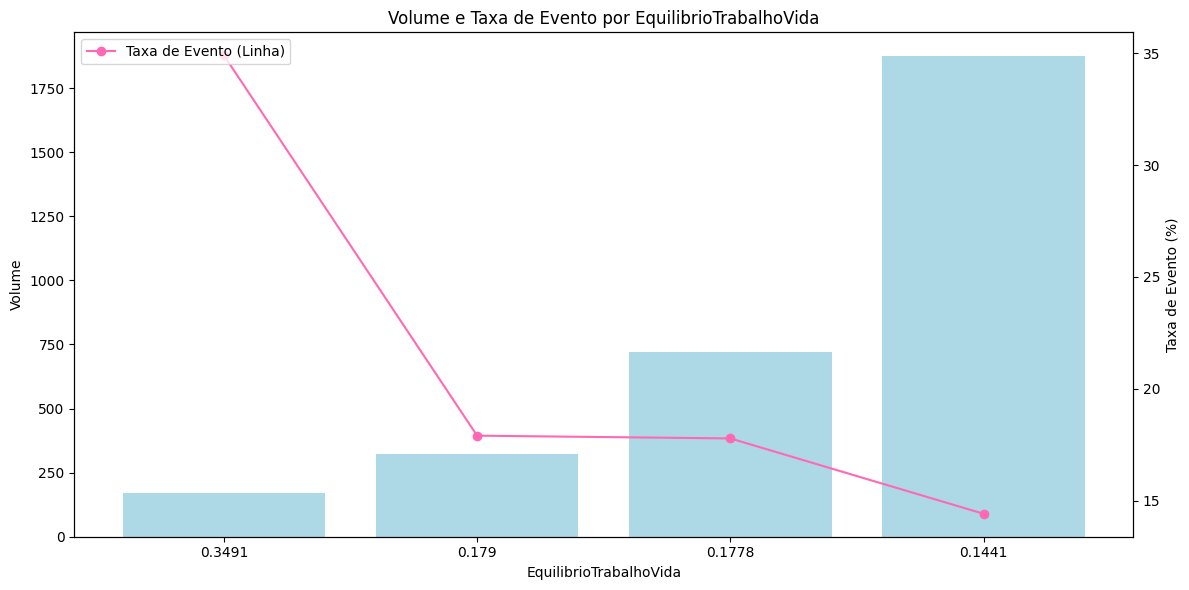

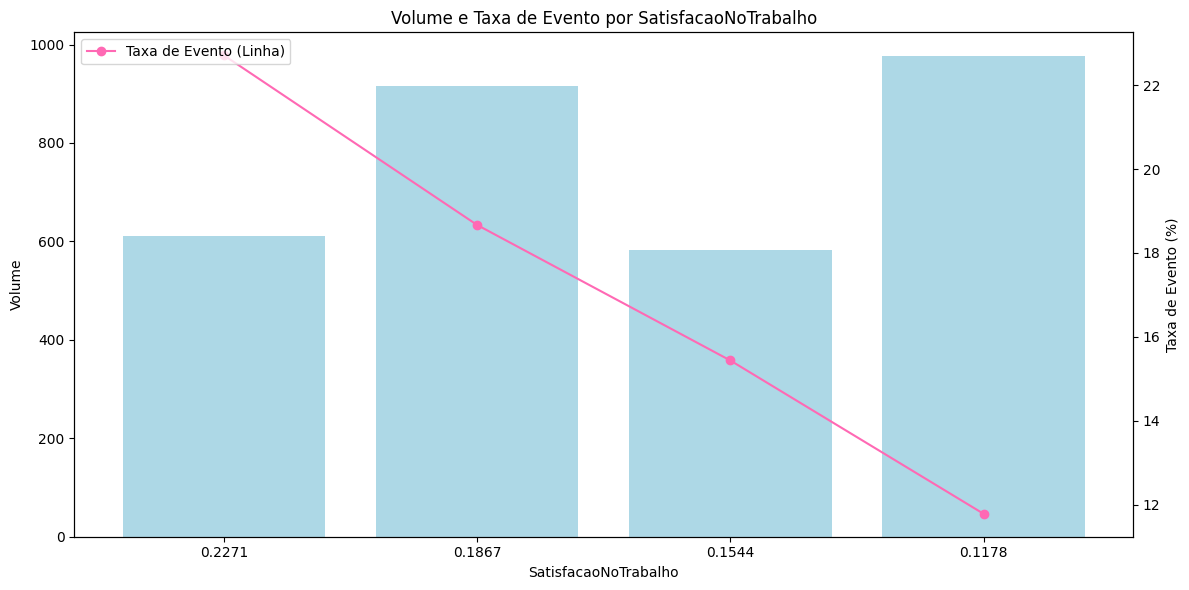

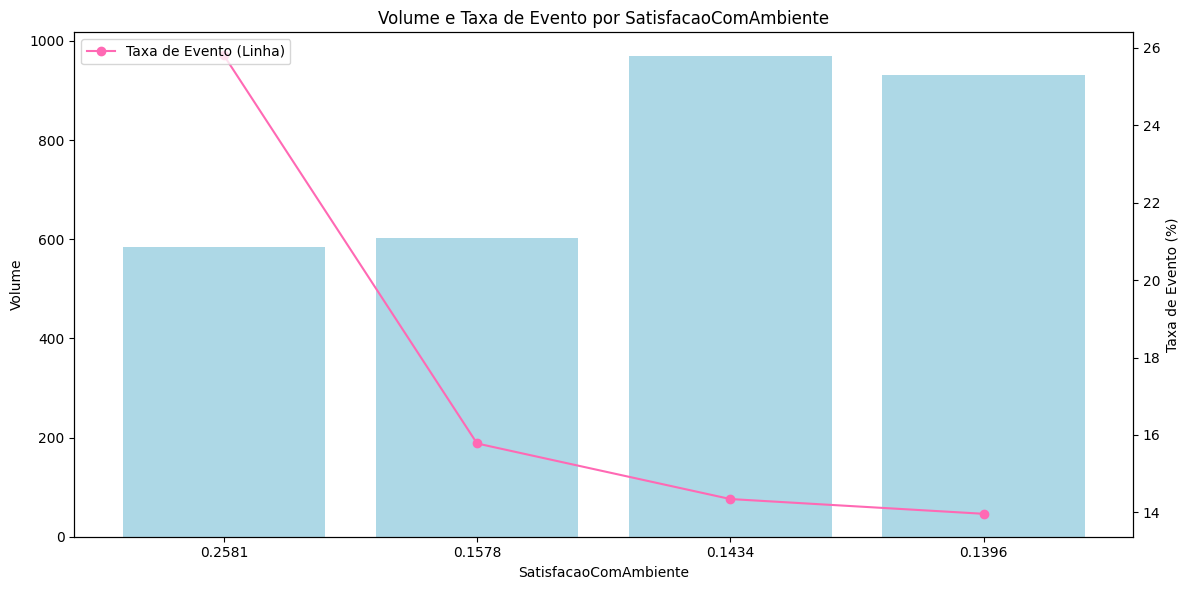

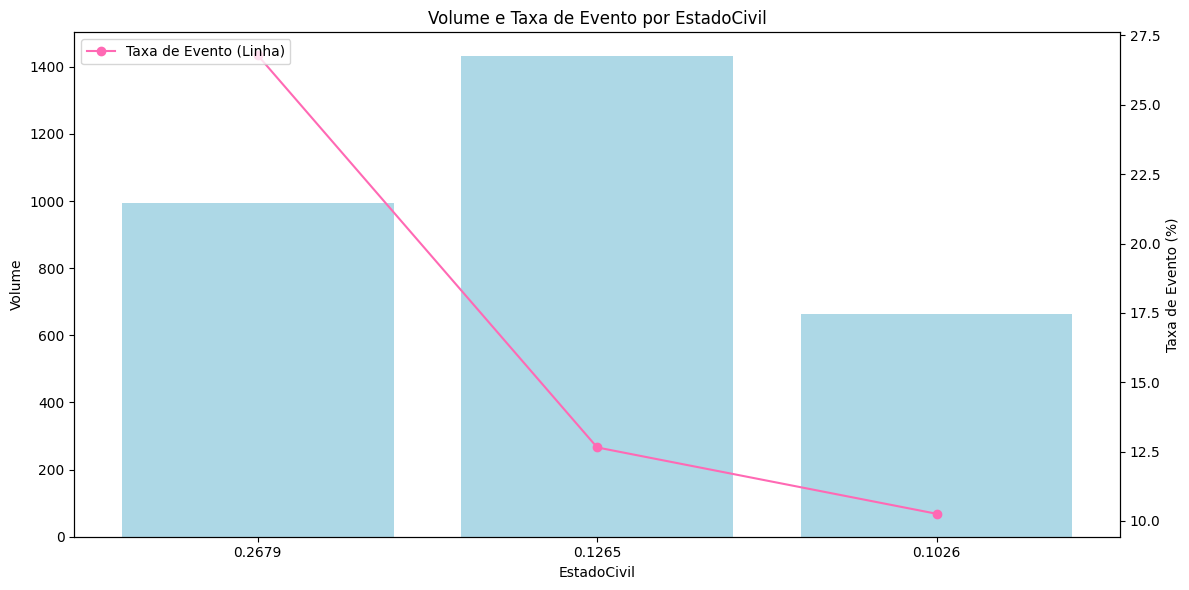

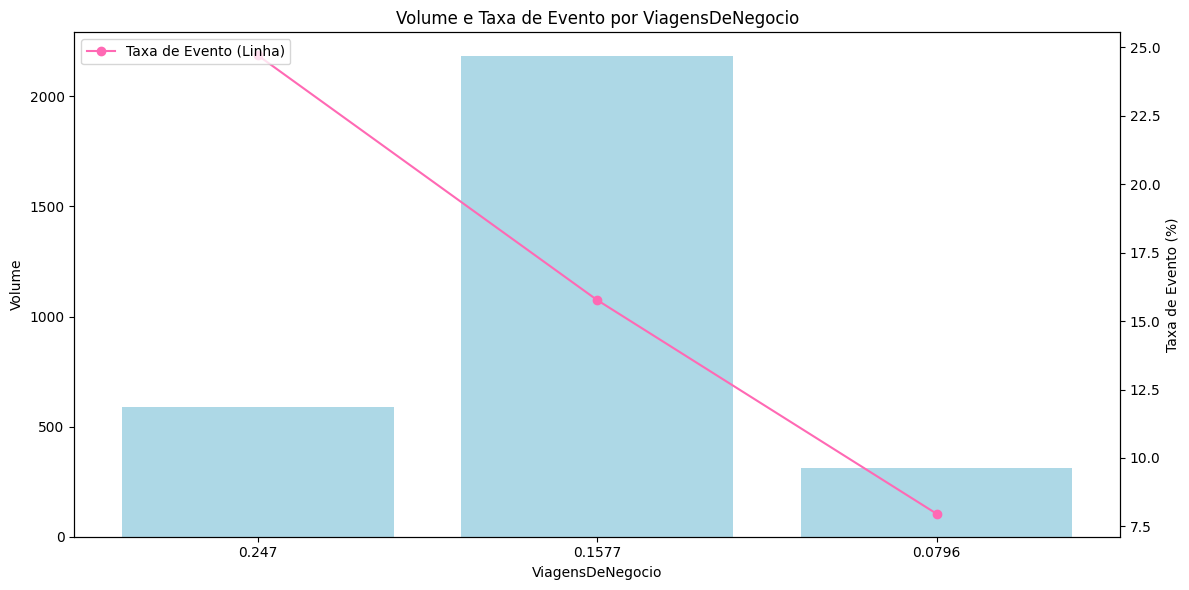

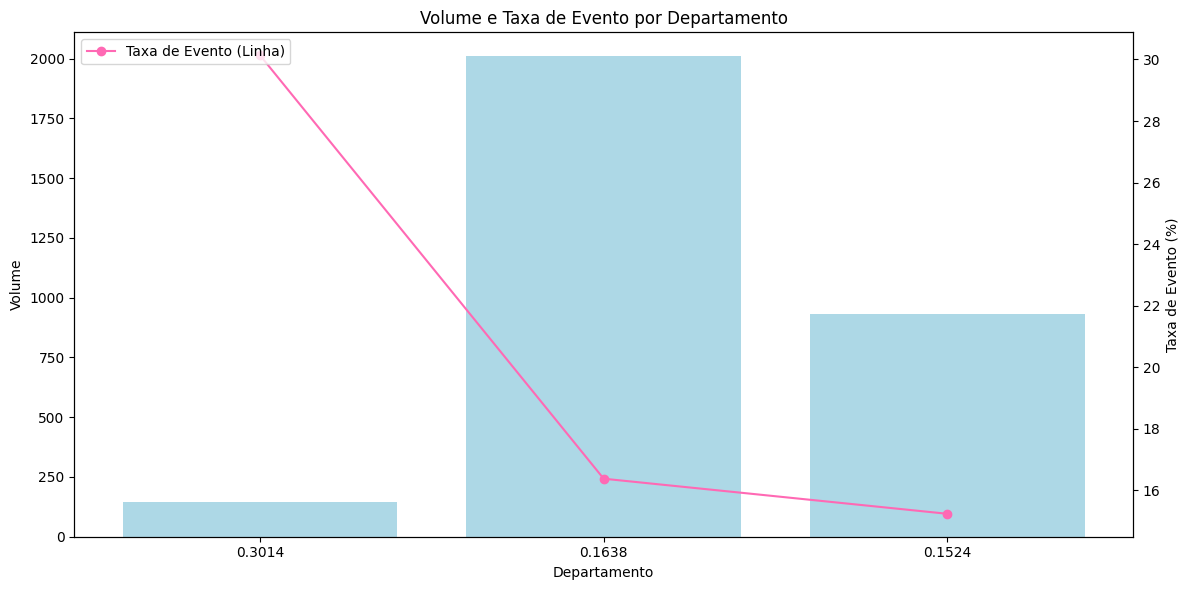

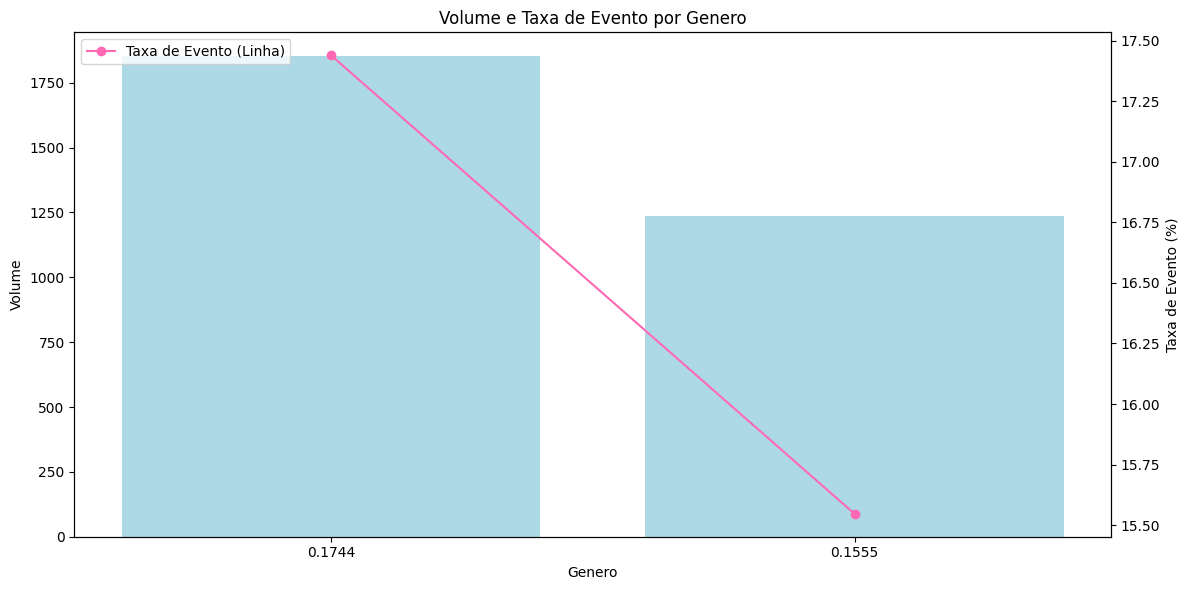

In [80]:
# analisando as variáveis que contém baixa cardinalidade (menor ou igual a 20) e verificando se há ordenação entre as categorias
ordinais = df_metadata[df_metadata.cardinalidade <= 20].nome_variavel.to_list()

for var in ordinais:
    result = analyze_variable(new_abt_treino_transform, var, "TARGET")

- Algumas categorias possuem muito pouco volume, então isso pode ser um problema.

### Categorizando as variáveis utilizando Decision Tree Classifier

In [81]:
variaveis_categorizar

['EstadoCivil',
 'ViagensDeNegocio',
 'TotalDeAnosTrabalhados',
 'AnosNaEmpresa',
 'SatisfacaoNoTrabalho',
 'NumeroDeEmpresas',
 'Idade',
 'SatisfacaoComAmbiente',
 'NivelDeOpcaoDeCompraDeAcoes',
 'DistanciaDeCasa',
 'TreinamentosNoUltimoAno',
 'Funcao',
 'AnosDesdeUltimaPromocao',
 'EquilibrioTrabalhoVida',
 'AnosComAtualGestor',
 'Departamento',
 'EnvolvimentoNoTrabalho',
 'Educacao',
 'RendaMensal',
 'Genero']

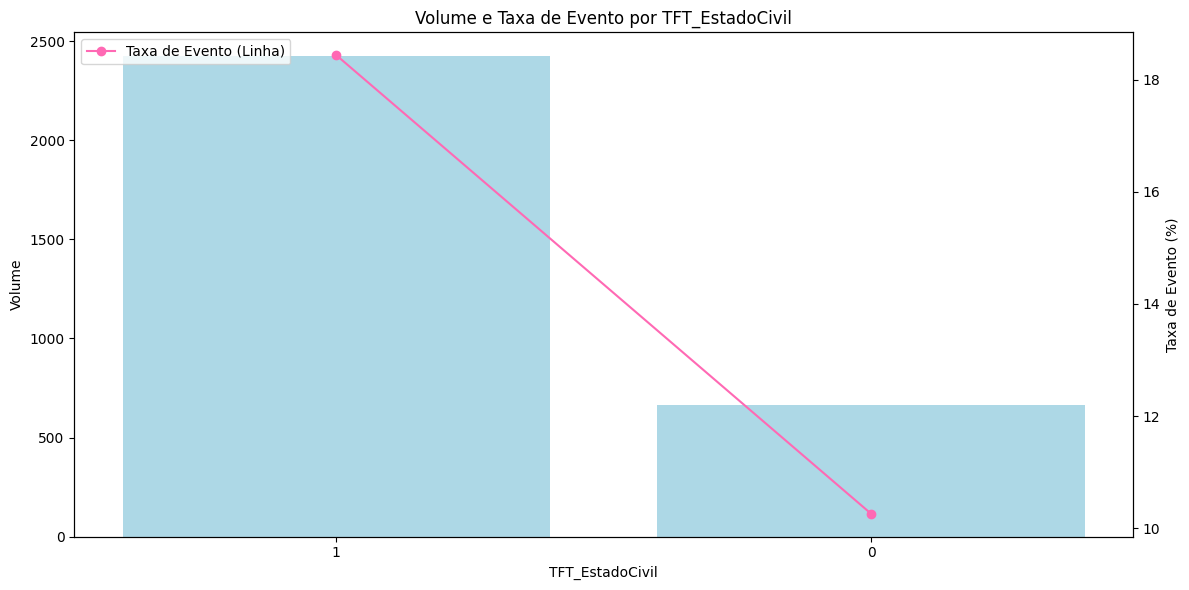

In [82]:
# avaliando a quantidade de categorias
var = variaveis_categorizar[0]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(new_abt_treino_transform, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(new_abt_treino_transform, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# aplicando a quantidade de categorias escolhida
df1_treino = apply_tree_bins(new_abt_treino_transform, result, numeric_var=var)
df1_teste = apply_tree_bins(new_abt_teste_transform, result, numeric_var=var)

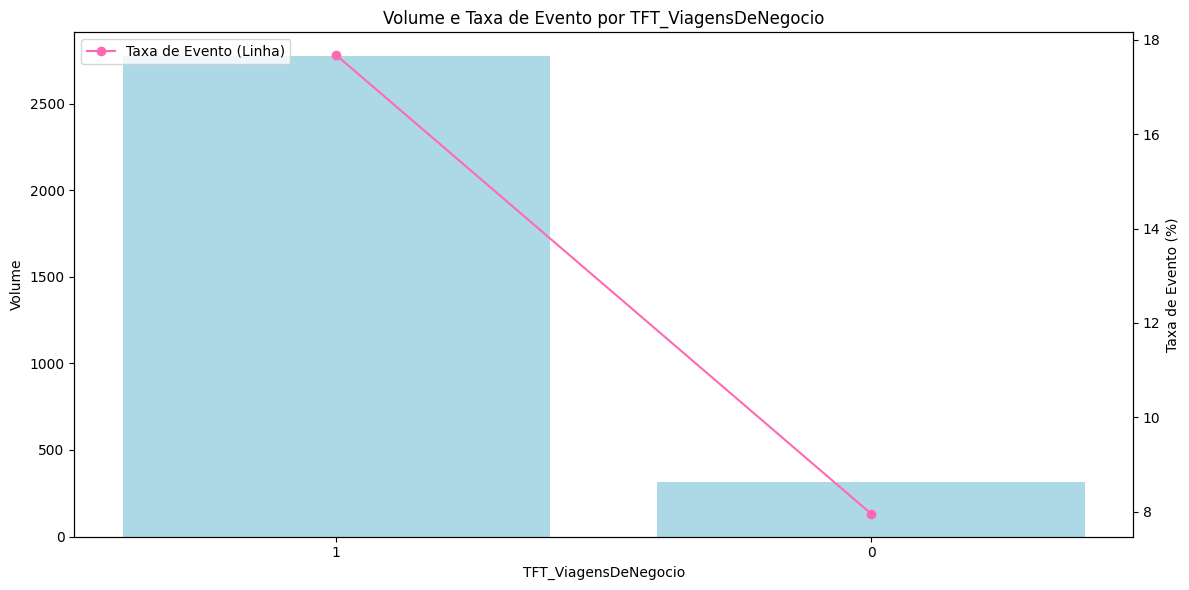

In [83]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[1]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

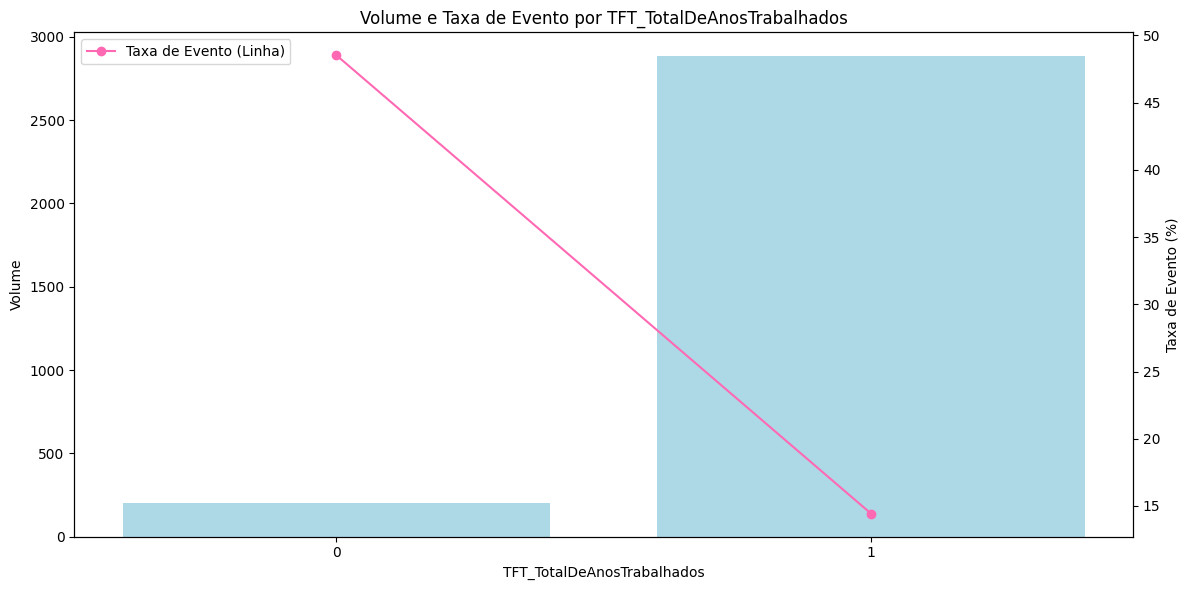

In [84]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[2]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

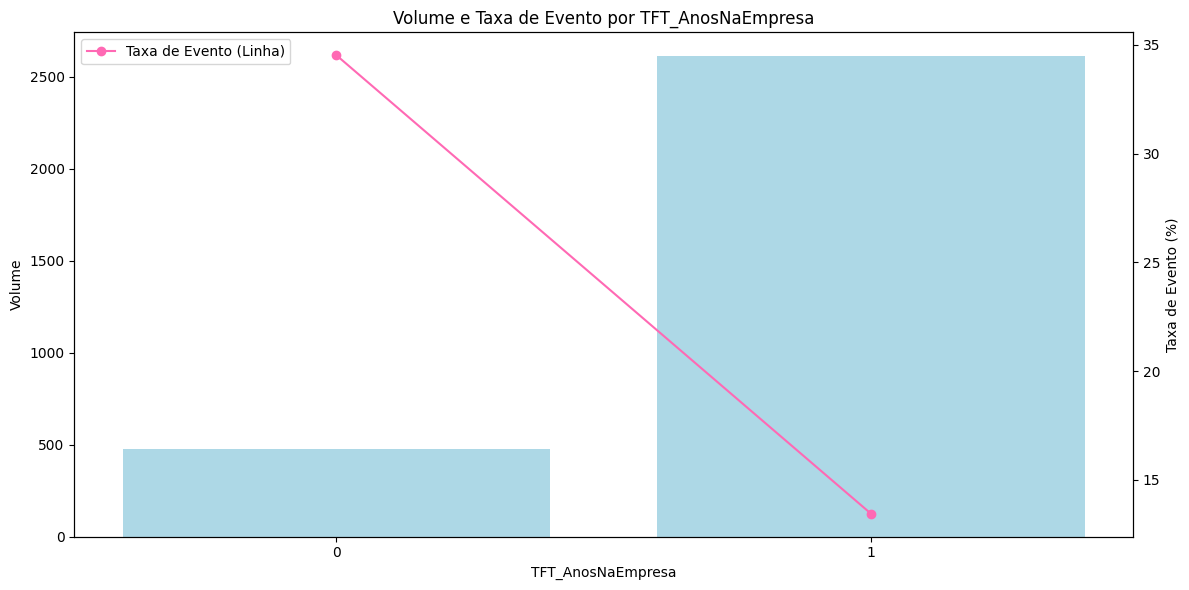

In [85]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[3]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

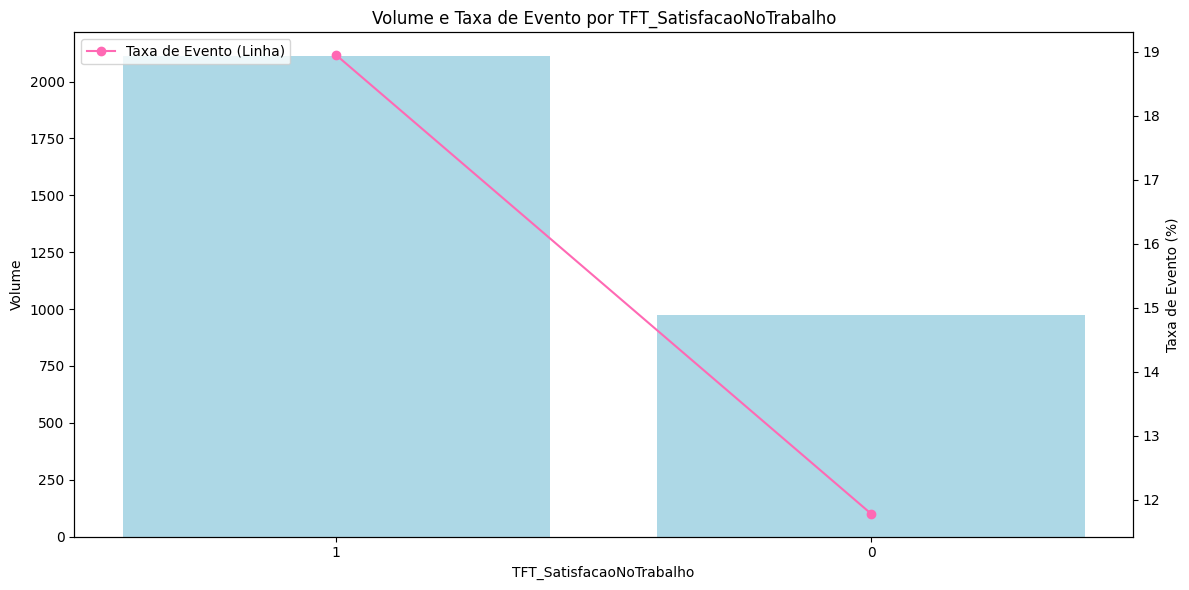

In [86]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[4]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

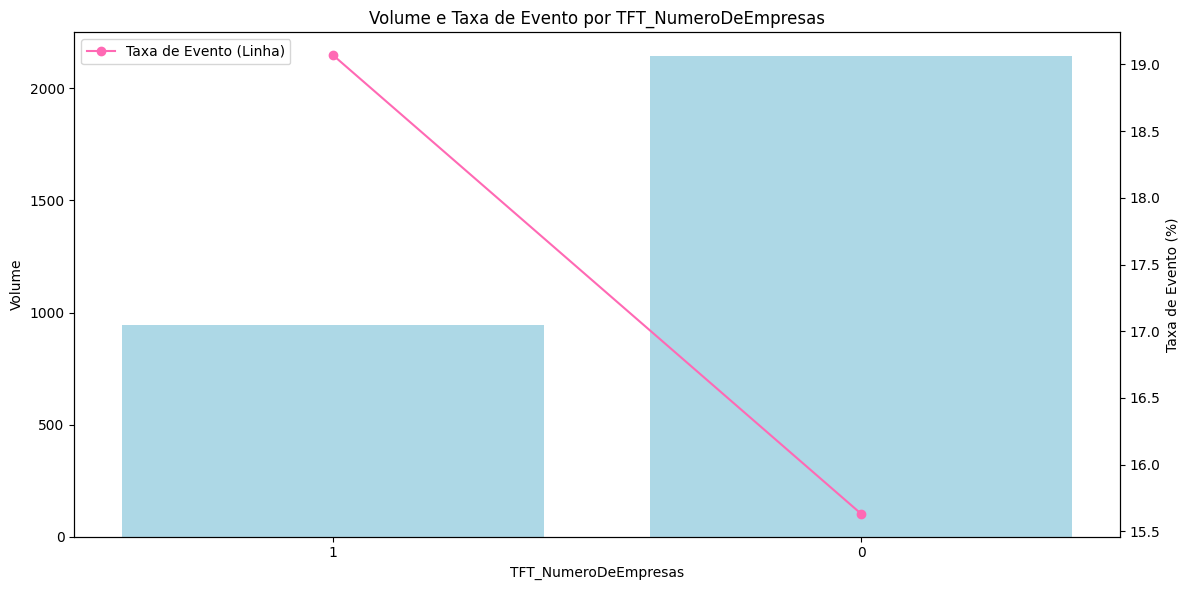

In [87]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[5]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

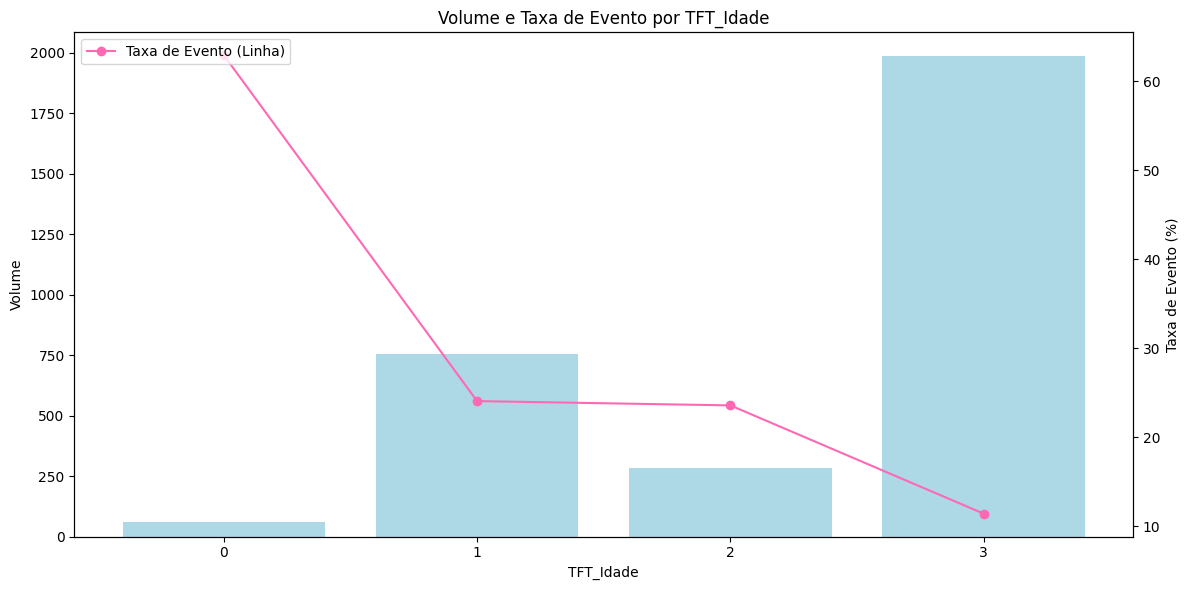

In [88]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[6]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=4, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

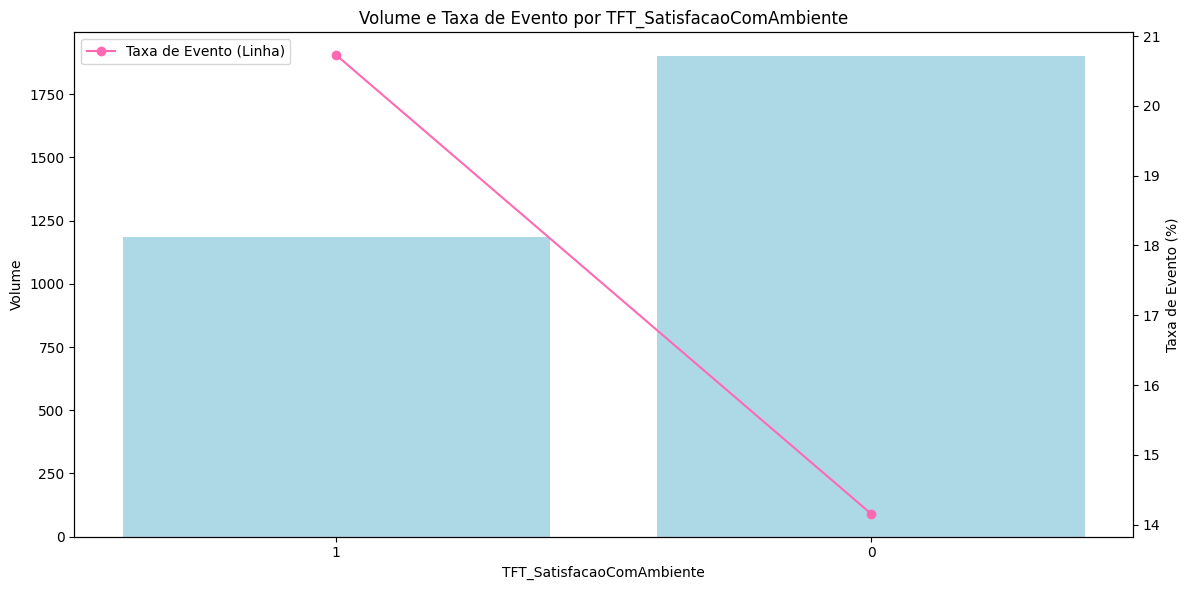

In [89]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[7]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

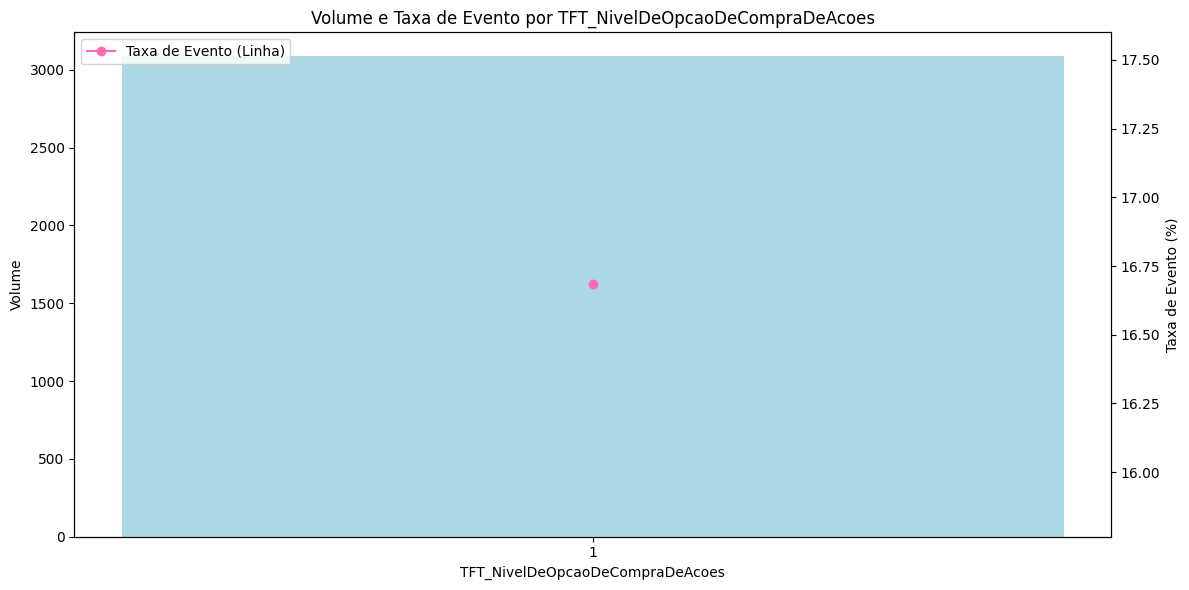

In [90]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[8]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

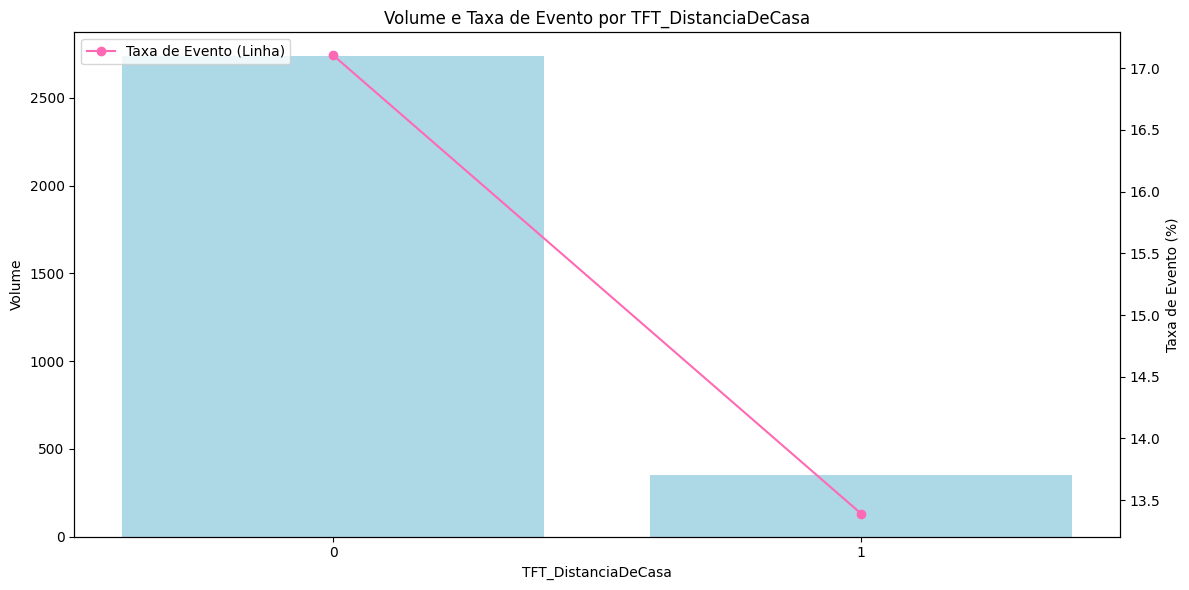

In [91]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[9]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

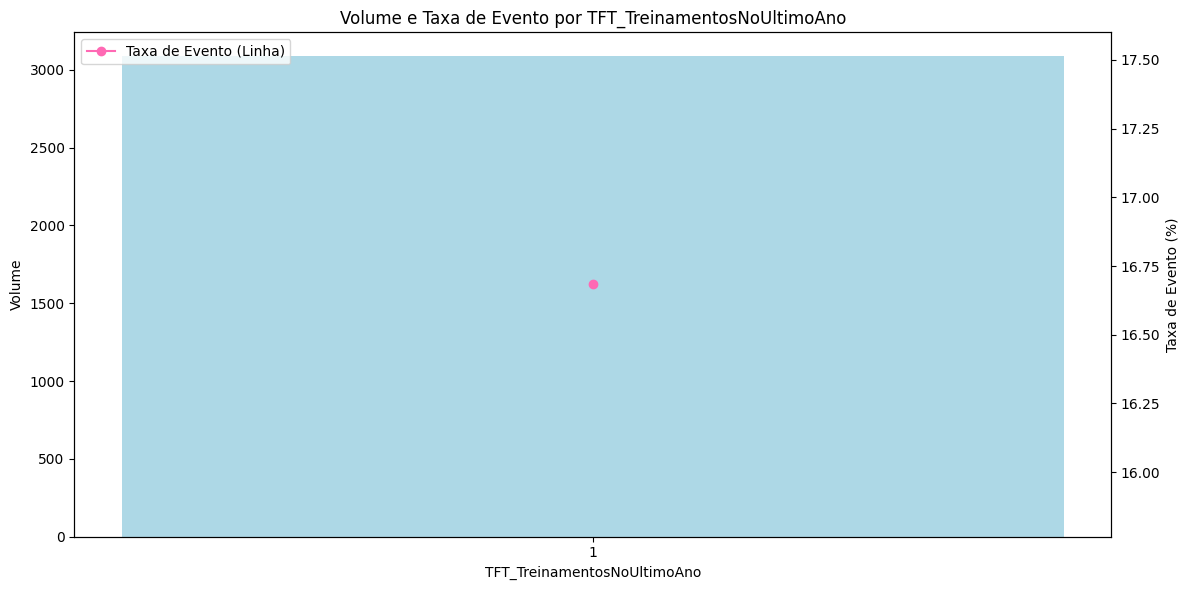

In [92]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[10]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

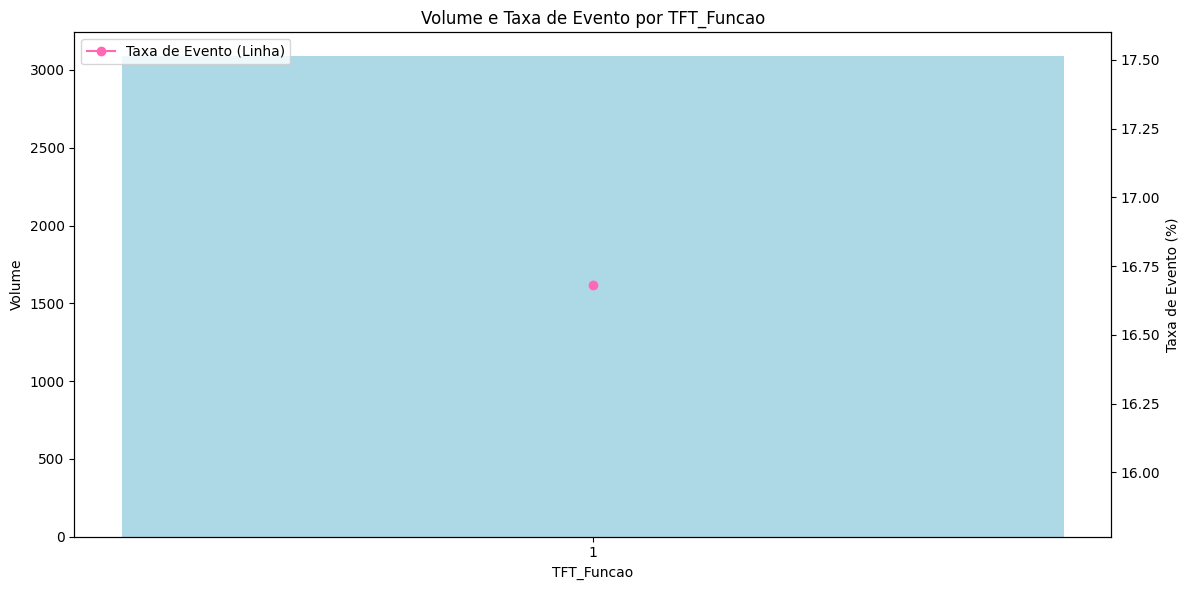

In [93]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[11]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

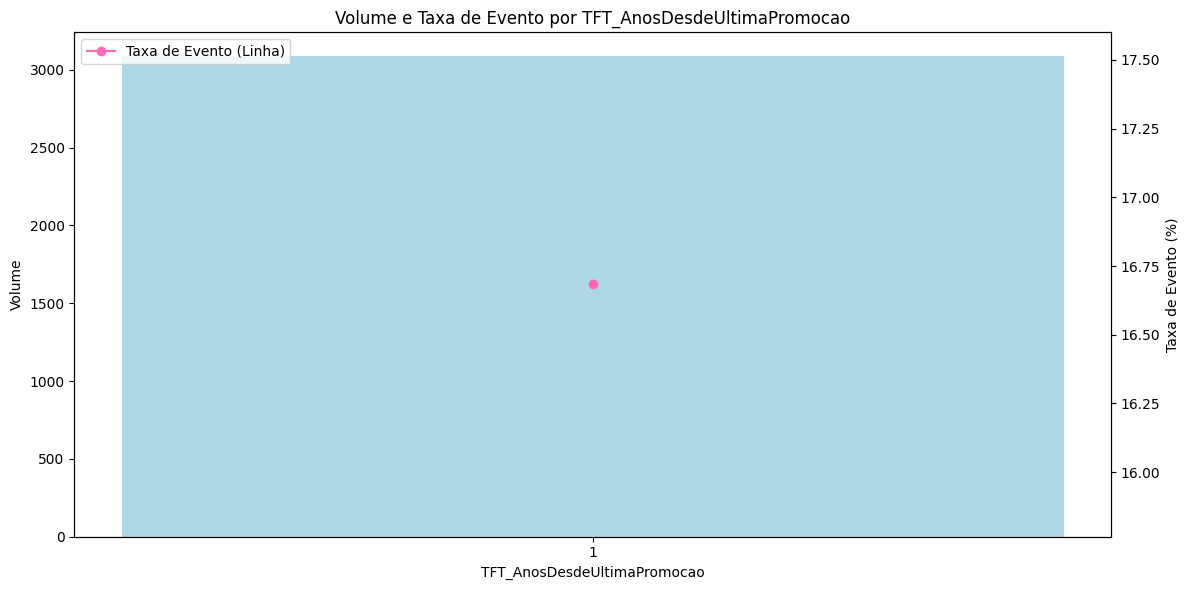

In [94]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[12]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

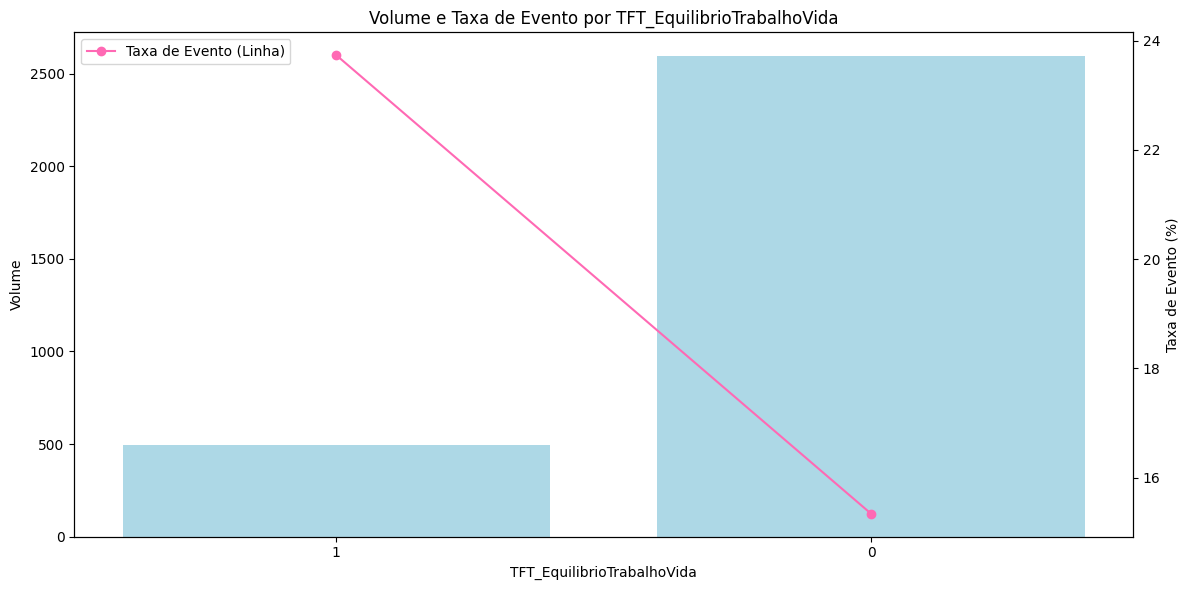

In [95]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[13]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

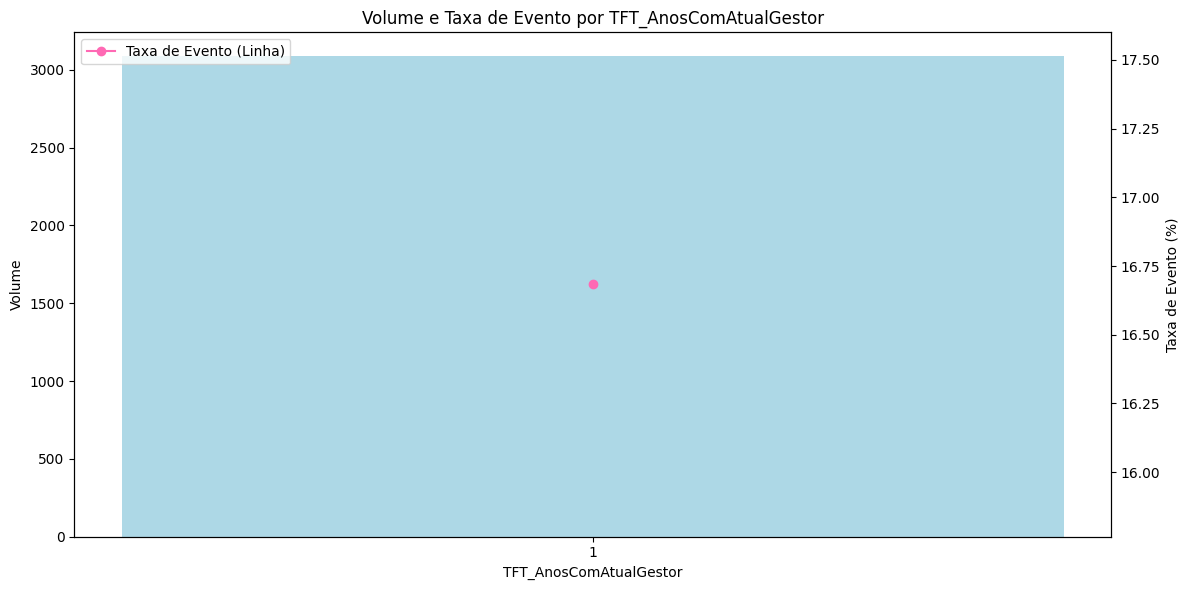

In [96]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[14]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

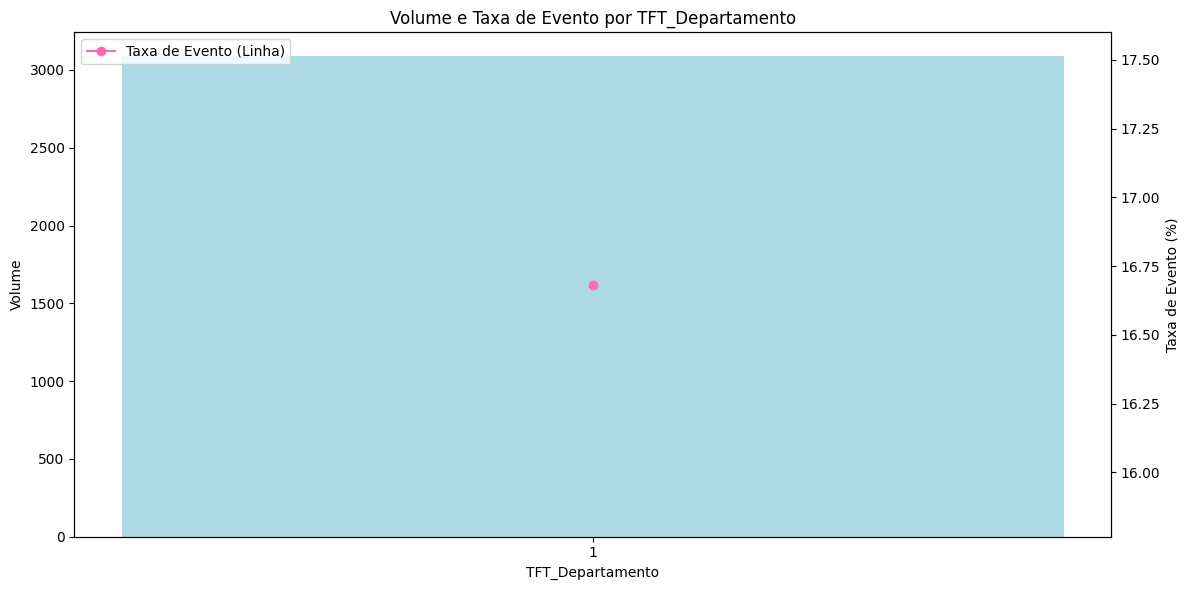

In [97]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[15]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

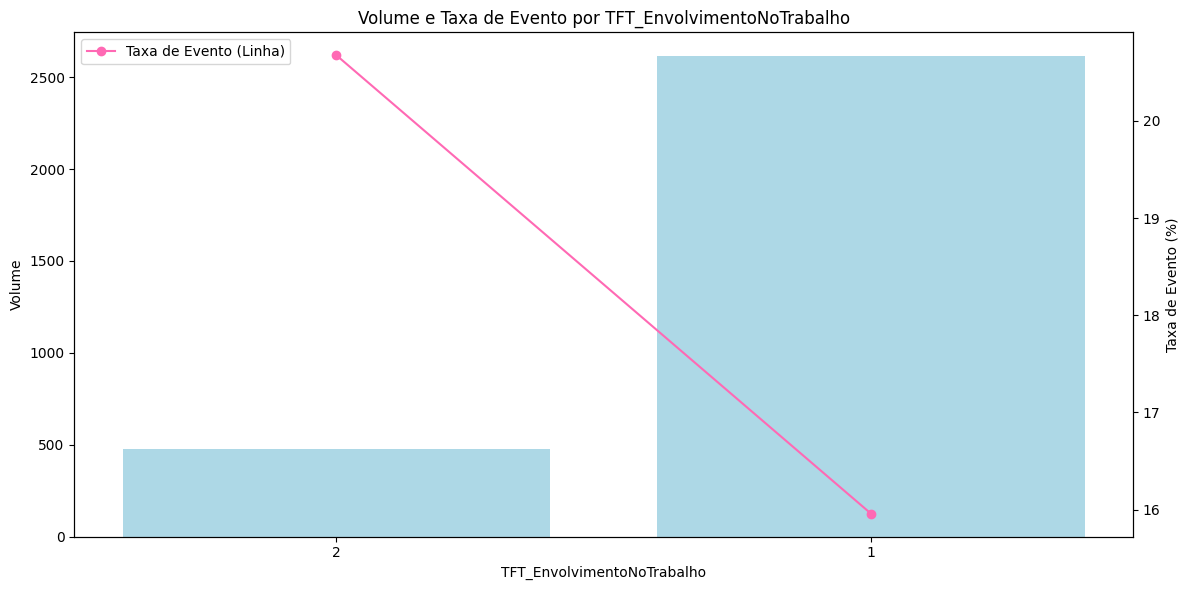

In [98]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[16]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=3, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

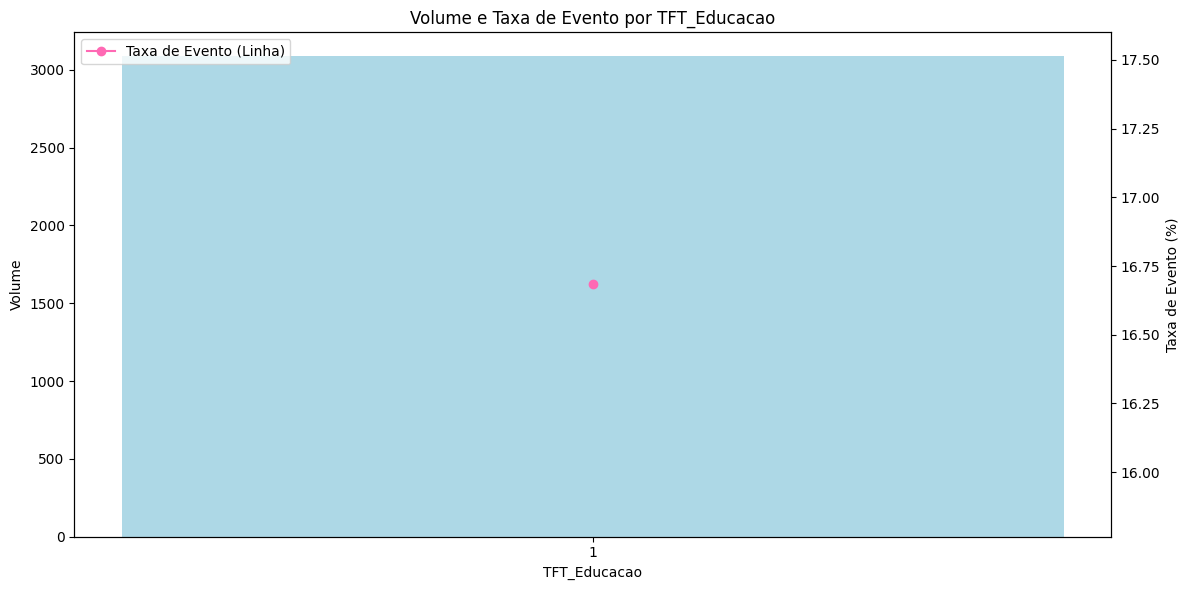

In [99]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[17]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

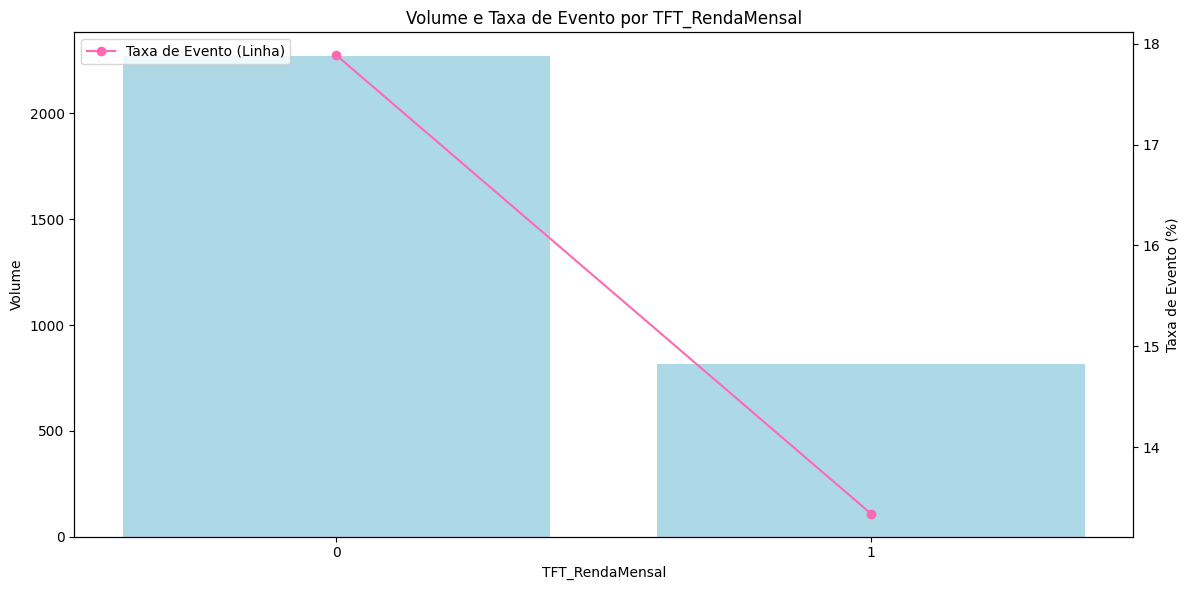

In [100]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[18]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

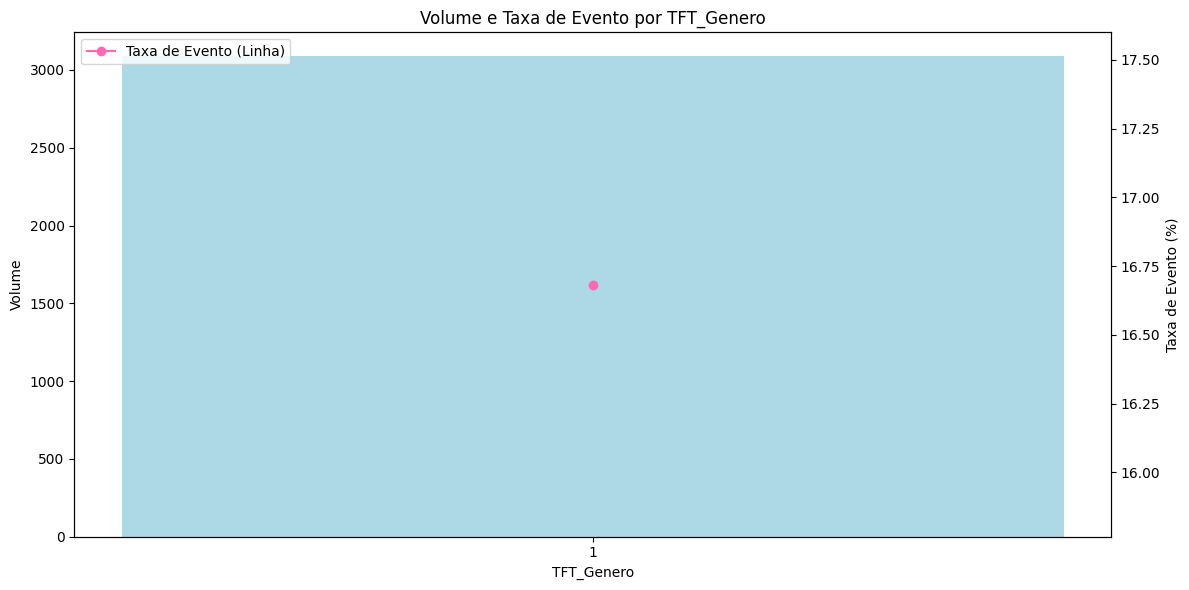

In [101]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[19]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='TARGET', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "TARGET")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

In [102]:
df1_teste.head()

TARGET  TFT_EstadoCivil  TFT_ViagensDeNegocio  \
1567       0                0                     0   
683        0                0                     0   
117        0                1                     0   
1581       0                1                     0   
3861       0                0                     0   

      TFT_TotalDeAnosTrabalhados  TFT_AnosNaEmpresa  TFT_SatisfacaoNoTrabalho  \
1567                           1                  1                         1   
683                            1                  1                         0   
117                            1                  1                         1   
1581                           1                  1                         0   
3861                           1                  1                         0   

      TFT_NumeroDeEmpresas  TFT_Idade  TFT_SatisfacaoComAmbiente  \
1567                     0          1                          0   
683                      0          1                          1   
117                      1          3                          1   
1581                     0          2                          0   
3861                     0          3                          0   

      TFT_NivelDeOpcaoDeCompraDeAcoes  ...  TFT_TreinamentosNoUltimoAno  \
1567                                1  ...                            1   
683                                 1  ...                            1   
117                                 1  ...                            1   
1581                                1  ...                            1   
3861                                1  ...                            1   

      TFT_Funcao  TFT_AnosDesdeUltimaPromocao  TFT_EquilibrioTrabalhoVida  \
1567           1                            1                           0   
683            1                            1                           0   
117            1                            1                           0   
1581           1                            1                           0   
3861           1                            1                           0   

      TFT_AnosComAtualGestor  TFT_Departamento  TFT_EnvolvimentoNoTrabalho  \
1567                       1                 1                           1   
683                        1                 1                           2   
117                        1                 1                           1   
1581                       1                 1                           1   
3861                       1                 1                           1   

      TFT_Educacao  TFT_RendaMensal  TFT_Genero  
1567             1                0           0  
683              1                0           1  
117              1                0           1  
1581             1                0           1  
3861             1                0           1  

[5 rows x 21 columns]

In [103]:
# Ajuste no tipo de variável
lista_onehot = ["TFT_" + variavel for variavel in variaveis_categorizar]
for var in lista_onehot:
  df1_treino[var] = df1_treino[var].astype(float)
  df1_teste[var] = df1_teste[var].astype(float)

import pickle
from sklearn.preprocessing import OneHotEncoder

X = df1_treino.drop(axis=1,columns=['TARGET'])

print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore',dtype=np.int32)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df1_treino[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df1_treino.index)

df_train_03 = pd.concat([df1_treino.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

Lista de vars para OneHot Encoding:  ['TFT_EstadoCivil', 'TFT_ViagensDeNegocio', 'TFT_TotalDeAnosTrabalhados', 'TFT_AnosNaEmpresa', 'TFT_SatisfacaoNoTrabalho', 'TFT_NumeroDeEmpresas', 'TFT_Idade', 'TFT_SatisfacaoComAmbiente', 'TFT_NivelDeOpcaoDeCompraDeAcoes', 'TFT_DistanciaDeCasa', 'TFT_TreinamentosNoUltimoAno', 'TFT_Funcao', 'TFT_AnosDesdeUltimaPromocao', 'TFT_EquilibrioTrabalhoVida', 'TFT_AnosComAtualGestor', 'TFT_Departamento', 'TFT_EnvolvimentoNoTrabalho', 'TFT_Educacao', 'TFT_RendaMensal', 'TFT_Genero']


In [104]:
# aplicando o encoder na base de teste
encoded_data_test = encoder.transform(df1_teste[lista_onehot])
encoded_cols_test = encoder.get_feature_names_out(lista_onehot)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df1_teste.index)

df1_teste = pd.concat([df1_teste.drop(lista_onehot, axis=1), encoded_df_test], axis=1)

X = df_train_03.drop(axis=1,columns=['TARGET'])

lista_features_rl = list(X.columns)

# 3- Modelagem

### Treinando o modelo de Regressão Logística do StatsModels

In [105]:
model, scorecard = logistic_regression_with_scorecard(df_train_03, 'TARGET', lista_features_rl)
scorecard

Optimization terminated successfully.
         Current function value: 0.388050
         Iterations 7


Beta Coefficient       P-Value  Wald Statistic
TFT_Idade_3.0                          -2.005269  1.675401e-09       36.318798
TFT_NumeroDeEmpresas_1.0                0.637996  7.698686e-08       28.880429
TFT_SatisfacaoComAmbiente_1.0           0.540114  3.165267e-07       26.146155
TFT_SatisfacaoNoTrabalho_1.0            0.618313  4.810175e-07       25.338476
TFT_ViagensDeNegocio_1.0                1.111004  2.652351e-06       22.052926
TFT_EquilibrioTrabalhoVida_1.0          0.597447  5.746821e-06       20.570726
TFT_AnosNaEmpresa_1.0                  -0.690039  3.129193e-05       17.337686
TFT_EstadoCivil_1.0                     0.591601  5.141503e-05       16.395209
TFT_TotalDeAnosTrabalhados_1.0         -0.814130  8.775571e-04       11.069577
const                                  -1.240071  1.484404e-03       10.097876
TFT_Idade_1.0                          -1.021300  1.685365e-03        9.864085
TFT_RendaMensal_1.0                    -0.372547  3.775288e-03        8.388854
TFT_Idade_2.0                          -0.971317  5.515390e-03        7.702189
TFT_EnvolvimentoNoTrabalho_2.0          0.338616  1.360604e-02        6.088555
TFT_DistanciaDeCasa_1.0                -0.198322  2.643619e-01        1.245770

### Pegando só as variáveis que tiveram o P-value <= 0.05 e treinando novamente o modelo com elas

In [106]:
lista = pd.DataFrame(scorecard[scorecard['P-Value'] <= 0.05].reset_index()).rename(columns={'index':'variable'}).variable.to_list()
try:
    lista.remove('const')
except:
    pass

abt_new = df_train_03[lista]
abt_new = pd.concat((abt_new,y_train),axis=1)
abt_test_new = df1_teste[lista]
abt_test_new = pd.concat((abt_test_new,y_test),axis=1)

model, scorecard = logistic_regression_with_scorecard(abt_new, 'TARGET', abt_new.drop(columns='TARGET').columns.to_list())
scorecard

Optimization terminated successfully.
         Current function value: 0.388258
         Iterations 7


Beta Coefficient       P-Value  Wald Statistic
TFT_Idade_3.0                          -2.007869  1.701656e-09       36.288493
TFT_NumeroDeEmpresas_1.0                0.636112  8.510817e-08       28.686197
TFT_SatisfacaoComAmbiente_1.0           0.542770  2.748808e-07       26.418599
TFT_SatisfacaoNoTrabalho_1.0            0.616371  5.079901e-07       25.233243
TFT_ViagensDeNegocio_1.0                1.108513  2.755251e-06       21.979870
TFT_EquilibrioTrabalhoVida_1.0          0.596190  5.988114e-06       20.491996
TFT_AnosNaEmpresa_1.0                  -0.693145  2.899919e-05       17.482320
TFT_EstadoCivil_1.0                     0.595151  4.556812e-05       16.624108
TFT_TotalDeAnosTrabalhados_1.0         -0.818268  8.317163e-04       11.169085
const                                  -1.251383  1.343713e-03       10.281491
TFT_Idade_1.0                          -1.021100  1.721421e-03        9.825145
TFT_RendaMensal_1.0                    -0.371541  3.865470e-03        8.345955
TFT_Idade_2.0                          -0.970789  5.608144e-03        7.672091
TFT_EnvolvimentoNoTrabalho_2.0          0.332285  1.536382e-02        5.874261

In [107]:
abt_train_t01 = abt_new.drop(columns='TARGET').copy()
abt_teste_t01 = abt_test_new.drop(columns='TARGET').copy()

abt_train_t01['const'] = 1.0
abt_teste_t01['const'] = 1.0

abt_train_t01['Score_1'] = model.predict(abt_train_t01).round(4)
abt_teste_t01['Score_1'] = model.predict(abt_teste_t01).round(4)

abt_train_t01['Score_0'] = 1 - abt_train_t01['Score_1']
abt_teste_t01['Score_0'] = 1 - abt_teste_t01['Score_1']

abt_train_t01 = pd.concat((abt_train_t01,y_train),axis=1)
abt_teste_t01 = pd.concat((abt_teste_t01,y_test),axis=1)

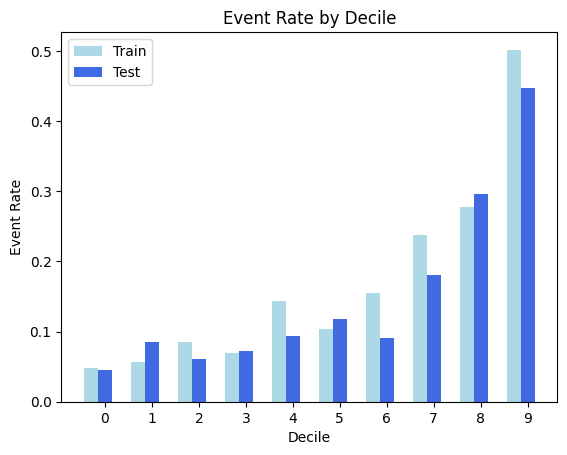

Metric  Train Value  Test Value
0     KS     0.376855    0.398181
1    AUC     0.743564    0.733560
2   Gini     0.487128    0.467120

In [108]:
metrics, ord_score_train, ord_score_test = calculate_metrics(abt_train_t01, abt_teste_t01, 'Score_1', 'TARGET',bins=10)
metrics

- Com 10 bins não ficou bom, pois existem inversões nos deciles, então vamos diminuir a quantidade de deciles.

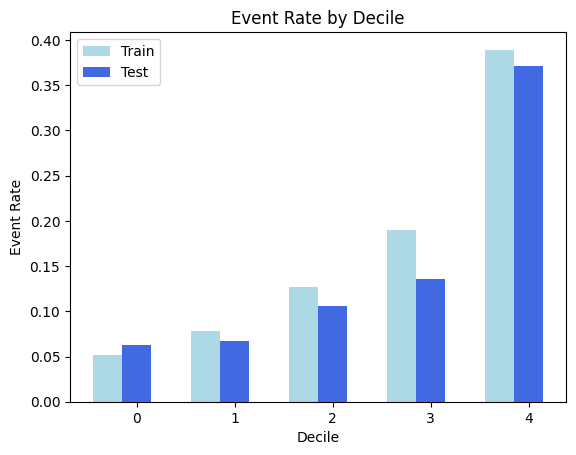

Metric  Train Value  Test Value
0     KS     0.376855    0.398181
1    AUC     0.743564    0.733560
2   Gini     0.487128    0.467120

In [113]:
metrics, ord_score_train, ord_score_test = calculate_metrics(abt_train_t01, abt_teste_t01, 'Score_1', 'TARGET',bins=5)
metrics

- Com 5 deciles agora ficou ordenado

In [114]:
# verificando os scores nos dados de treino
ord_score_train

decile  min_score  max_score  event_rate  volume
0       0     0.0058     0.0709    0.051530     621
1       1     0.0715     0.1010    0.078176     614
2       2     0.1011     0.1425    0.126418     617
3       3     0.1431     0.2362    0.190016     621
4       4     0.2379     0.8805    0.389251     614

In [115]:
# verificando os scores nos dados de teste
ord_score_test

decile  min_score  max_score  event_rate  volume
0       0     0.0058     0.0158    0.063158     285
1       1     0.0162     0.0277    0.067194     253
2       2     0.0282     0.0473    0.105469     256
3       3     0.0476     0.0871    0.135849     265
4       4     0.0876     0.8308    0.371212     264

## Salvando o modelo

In [116]:
# Salvando o modelo treinado
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 4- Conclusão, Impacto no Negócio e Recomendações

## Conclusão

O modelo de Regressão Logística construído demonstrou bom desempenho tanto no conjunto de treino quanto no conjunto de teste, com AUC de 0.74 (treino) e 0.73 (teste), o que indica boa capacidade discriminativa. Em outras palavras, o modelo consegue diferenciar corretamente funcionários com maior e menor probabilidade de deixar a empresa.

Além disso:
• O KS (Kolmogorov-Smirnov) acima de 0.39 em ambos os conjuntos sugere uma separação clara entre as distribuições das classes (sair vs. permanecer).
• O coeficiente de Gini em torno de 0.47 reforça a estabilidade e o poder preditivo do modelo.

O gráfico de decil mostra uma boa monotonicidade: à medida que os decis aumentam, a taxa de saída (“event rate”) também aumenta, tanto no treino quanto no teste. Isso indica que o modelo está bem calibrado e que os scores gerados refletem o risco real de saída de forma coerente.

## Impactos no negócio

- **Redução da rotatividade previsível** - O modelo permite antecipar quais funcionários têm maior chance de deixar a empresa, possibilitando ações preventivas como conversas de retenção, ajustes de clima ou benefícios direcionados.

- **Melhoria na alocação de recursos de RH** - A equipe de RH pode focar esforços nos grupos de maior risco, tornando as ações de engajamento mais eficazes.

- **Planejamento de sucessão mais estratégico** - Com a previsão de possíveis desligamentos, líderes podem se preparar com antecedência, organizando treinamentos internos ou abrindo vagas externas de forma planejada.

- **Redução de custos com contratação e onboarding** - Antecipar e mitigar saídas evita gastos com recrutamento, integração e queda de produtividade associada a perdas inesperadas.

- **Base para políticas de retenção orientadas por dados** - O modelo pode ser utilizado continuamente para avaliar a efetividade de iniciativas de retenção, ajustando políticas com base em evidências concretas.

## Recomendações

- **Desenvolver planos de retenção direcionados** - Crie ações específicas para os funcionários que o modelo identifica como de alto risco. Isso pode incluir bônus de retenção, planos de carreira acelerados, programas de reconhecimento e acompanhamento individual com líderes.

- **Revisar políticas internas com base em dados** - Use os insights do modelo para revisar políticas de carga horária, promoções, salários, clima e benefícios.

- **Atuar preventivamente nos grupos de risco** - Com base na pontuação do modelo, classifique os funcionários em faixas de risco e defina protocolos para cada grupo. Exemplo: acompanhamento trimestral para risco médio e ações imediatas para risco alto.

- **Melhorar a experiência de integração e acompanhamento** - Funcionários recém-contratados com alto risco previsto devem receber um onboarding reforçado e acompanhamento próximo nos primeiros meses.

- **Transformar a rotatividade em KPI gerencial** - Incorpore a probabilidade de saída como uma métrica acompanhada periodicamente pelas lideranças, associando metas de retenção aos objetivos dos gestores.